# Data 1030 Project

## Name: Jimmy Lin

## Link to your project github repo: (https://github.com/sirjimmylin/DATA-1030-Project.git)

## How long did you work on this project? 26 hours

Make sure you are in the DATA1030 environment.

## Conda Environment Setup

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.5"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.5"):
    print(FAIL, "Python version 3.12.5 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.26.4", 'matplotlib': "3.9.2",'sklearn': "1.5.1", 
                'pandas': "2.2.2",'xgboost': "2.1.1", 'shap': "0.45.1", 
                'plotly': "5.23.0"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.7

[ OK ] numpy version 1.26.4 is installed.
[ OK ] matplotlib version 3.9.2 is installed.
[ OK ] sklearn version 1.5.1 is installed.
[ OK ] pandas version 2.2.2 is installed.
[ OK ] xgboost version 2.1.1 is installed.
[ OK ] shap version 0.45.1 is installed.
[ OK ] plotly version 5.23.0 is installed.


## Step 1: EDA

### Read in Data

In [2]:
import pandas as pd
import numpy as np

#read in txt file using pandas read_csv function with a tab delimiter
df = pd.read_csv('hcvdat0.csv')

#display the first few rows of the table
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [3]:
import pandas as pd

# Load your dataset
df = pd.read_csv('hcvdat0.csv')

# Define a mapping for the Category column
label_mapping = {
    '0=Blood Donor': '0=Blood Donor',
    '0s=suspect Blood Donor': '1=suspect Blood Donor',
    '1=Hepatitis': '2=Hepatitis',
    '2=Fibrosis': '3=Fibrosis',
    '3=Cirrhosis': '4=Cirrhosis'
}

# Apply the mapping to the Category column
df['Category'] = df['Category'].map(label_mapping)

# Verify the transformation
print(df['Category'].unique())

# # Proceed with splitting and preprocessing
# from sklearn.model_selection import train_test_split

# X = df.drop(columns=['Category'])  # Features
# y = df['Category']  # Target labels

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


['0=Blood Donor' '1=suspect Blood Donor' '2=Hepatitis' '3=Fibrosis'
 '4=Cirrhosis']


In [4]:
#Number of rows and columns in the dataset (rows,columns)
print(df.shape)

# Print the data types
print(df.dtypes.to_string())

print(df['Category'].value_counts())
print('This column is ordinal.')

(615, 14)
Unnamed: 0      int64
Category       object
Age             int64
Sex            object
ALB           float64
ALP           float64
ALT           float64
AST           float64
BIL           float64
CHE           float64
CHOL          float64
CREA          float64
GGT           float64
PROT          float64
Category
0=Blood Donor            533
4=Cirrhosis               30
2=Hepatitis               24
3=Fibrosis                21
1=suspect Blood Donor      7
Name: count, dtype: int64
This column is ordinal.


### Visualize Target Variable

In [5]:
correct_order = ['0=Blood Donor', '1=suspect Blood Donor', '2=Hepatitis', '3=Fibrosis', '4=Cirrhosis']

df['Category'].value_counts().reindex(correct_order)

Category
0=Blood Donor            533
1=suspect Blood Donor      7
2=Hepatitis               24
3=Fibrosis                21
4=Cirrhosis               30
Name: count, dtype: int64

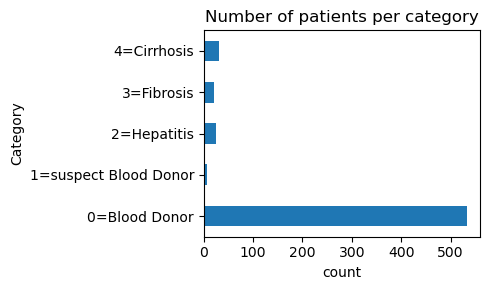

In [6]:
# import pandas as pd
# import numpy as np
# import matplotlib
from matplotlib import pylab as plt

plt.figure(figsize=(5,3))

df['Category'].value_counts().reindex(correct_order).plot.barh()
plt.xlabel('count')
plt.ylabel('Category')
plt.title('Number of patients per category')
plt.tight_layout()
plt.show()

### Column Pair Plots with Target Variable (Category)

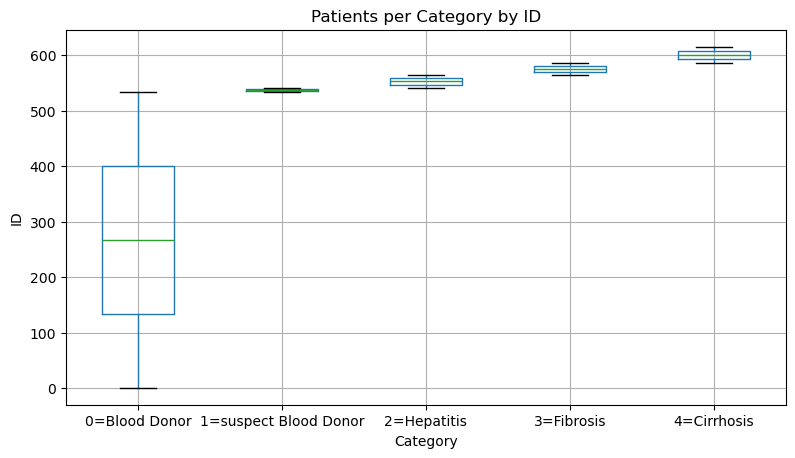

This box plot groups the ID by category.


In [7]:
df[['Category','Unnamed: 0']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by ID')
plt.xlabel('Category')
plt.ylabel('ID')
plt.show()
print('This box plot groups the ID by category.')

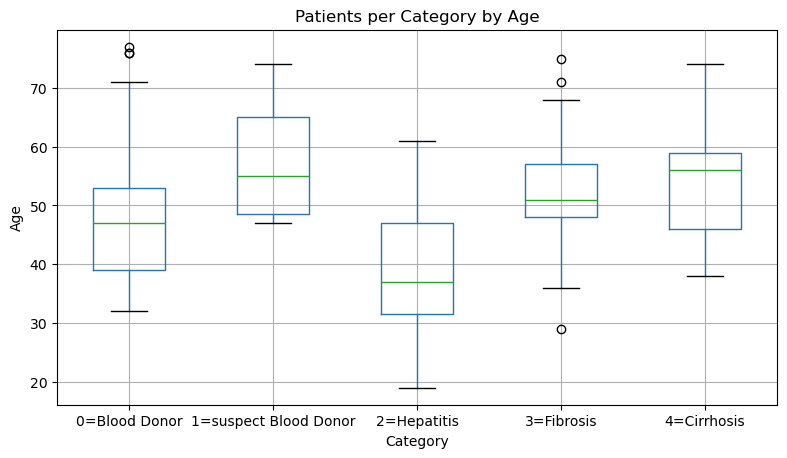

This box plot groups the age by category.


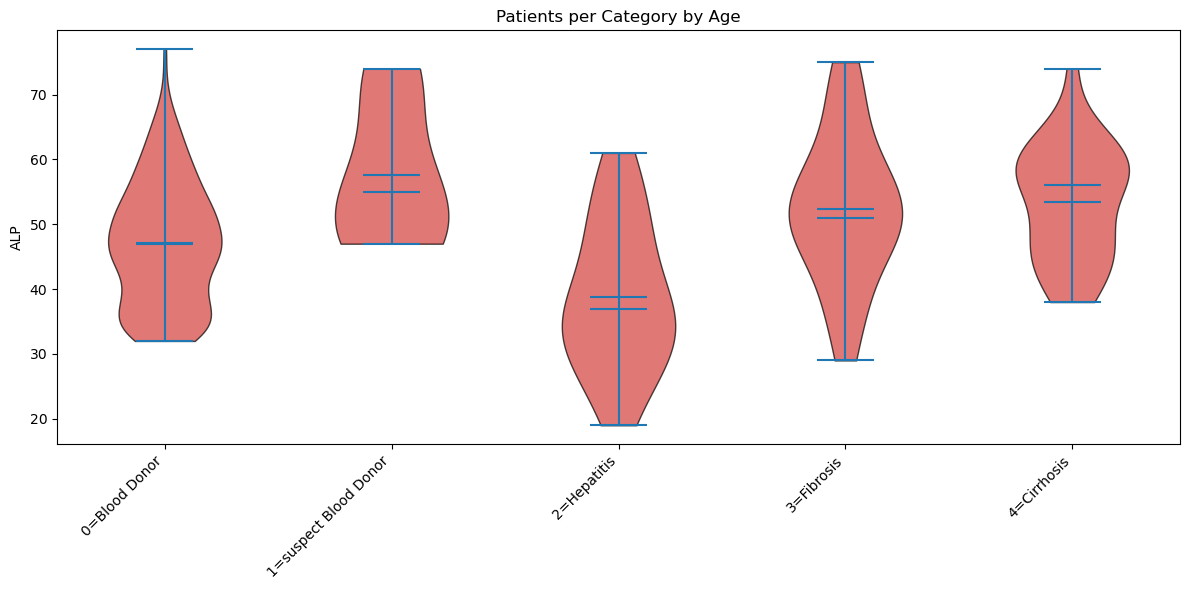

This violin plot groups the age by category.


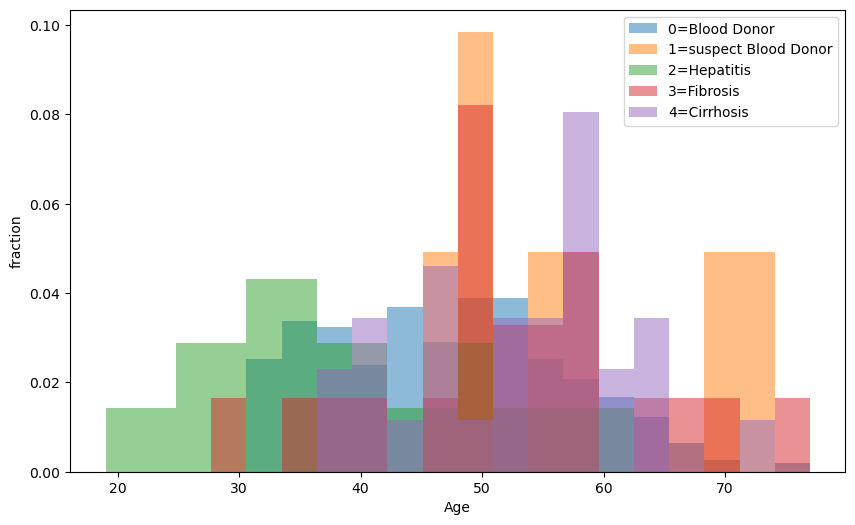

This category-specific histogram groups the age by category.


In [8]:
df[['Category','Age']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Age')
plt.xlabel('Category')
plt.ylabel('Age')
plt.show()
print('This box plot groups the age by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['Age'].dropna().values,
    df[df['Category'] == '1=suspect Blood Donor']['Age'].dropna().values,
    df[df['Category'] == '2=Hepatitis']['Age'].dropna().values,
    df[df['Category'] == '3=Fibrosis']['Age'].dropna().values,
    df[df['Category'] == '4=Cirrhosis']['Age'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '1=suspect Blood Donor', '2=Hepatitis', '3=Fibrosis', '4=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('ALP')
plt.title('Patients per Category by Age')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the age by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['Age'].min(),df['Age'].max())

plt.figure(figsize=(10,6))

for c in categories:
    plt.hist(df[df['Category']==c]['Age'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('Age')
plt.show()
print('This category-specific histogram groups the age by category.')

In [9]:
count_matrix = df.groupby(['Category', 'Sex']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

Sex                      f    m
Category                       
0=Blood Donor          215  318
1=suspect Blood Donor    1    6
2=Hepatitis              4   20
3=Fibrosis               8   13
4=Cirrhosis             10   20
Sex                           f         m
Category                                 
0=Blood Donor          0.403377  0.596623
1=suspect Blood Donor  0.142857  0.857143
2=Hepatitis            0.166667  0.833333
3=Fibrosis             0.380952  0.619048
4=Cirrhosis            0.333333  0.666667


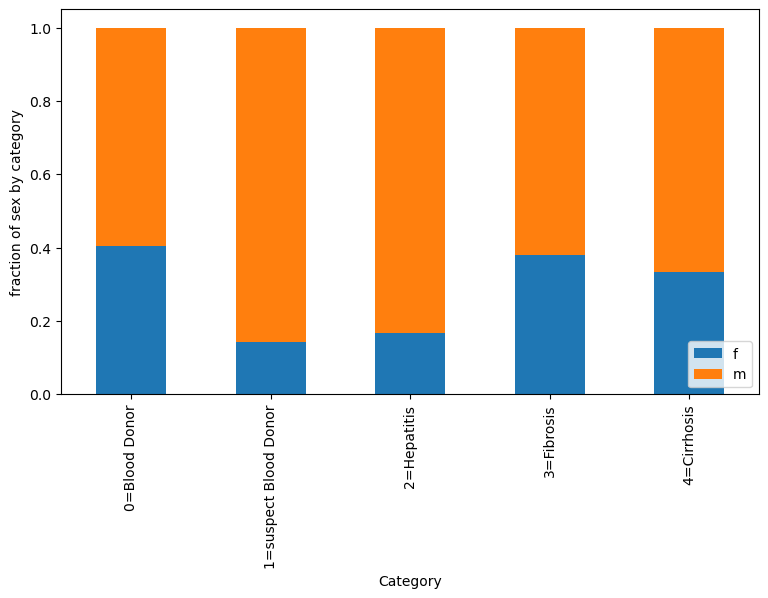

In [10]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(9,5))
plt.ylabel('fraction of sex by category')
plt.legend(loc=4)
plt.show()

In [11]:
count_matrix = df.groupby(['Sex', 'Category']).size().unstack()
print(count_matrix)

count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
print(count_matrix_norm)

Category  0=Blood Donor  1=suspect Blood Donor  2=Hepatitis  3=Fibrosis  \
Sex                                                                       
f                   215                      1            4           8   
m                   318                      6           20          13   

Category  4=Cirrhosis  
Sex                    
f                  10  
m                  20  
Category  0=Blood Donor  1=suspect Blood Donor  2=Hepatitis  3=Fibrosis  \
Sex                                                                       
f              0.903361               0.004202     0.016807    0.033613   
m              0.843501               0.015915     0.053050    0.034483   

Category  4=Cirrhosis  
Sex                    
f            0.042017  
m            0.053050  


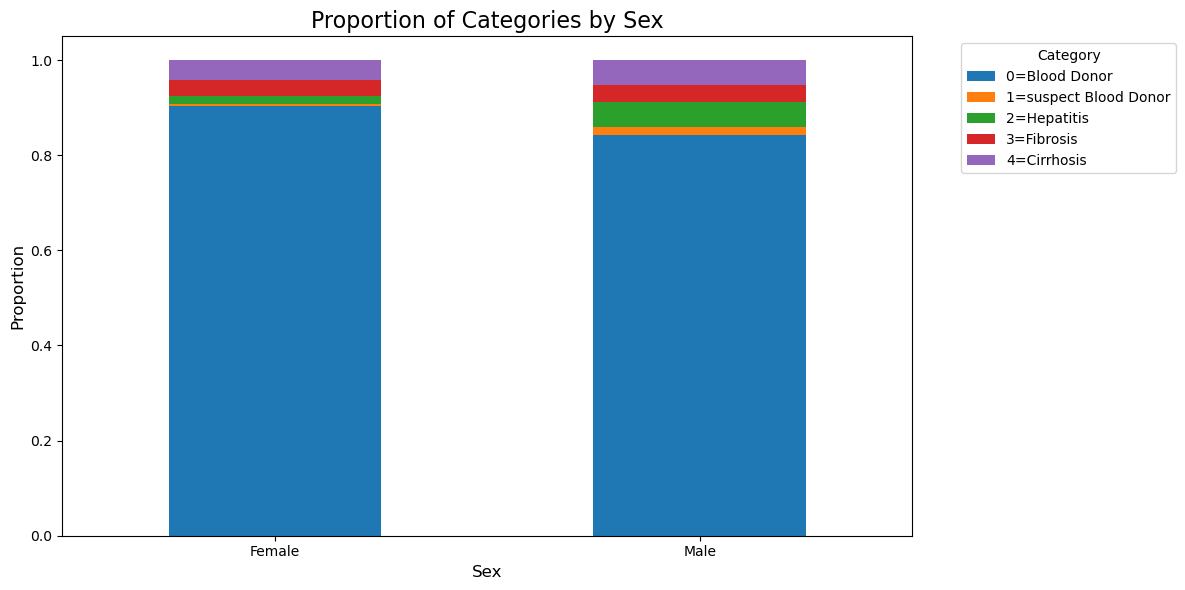

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Map 'm' and 'f' to 'male' and 'female'
df['Sex'] = df['Sex'].map({'m': 'Male', 'f': 'Female'})

# Create a cross-tabulation of Category by Sex, normalized by columns
count_matrix_norm = pd.crosstab(df['Sex'], df['Category'], normalize='index')

# Plot the stacked bar plot
ax = count_matrix_norm.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

plt.title('Proportion of Categories by Sex', fontsize=16)
plt.xlabel('Sex', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


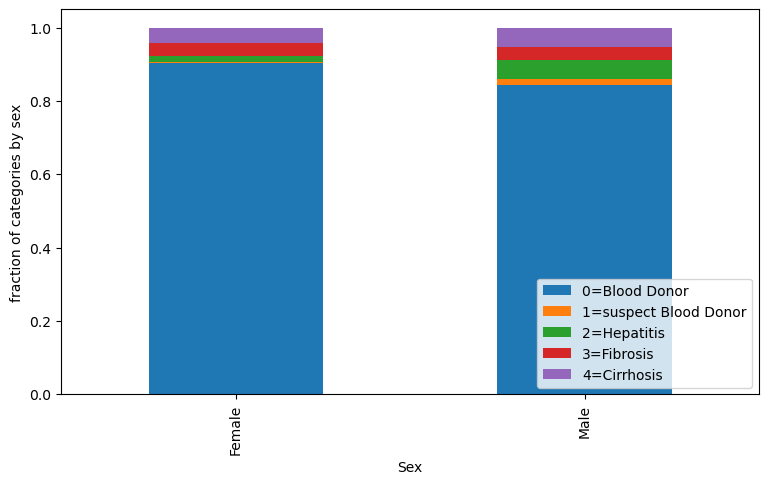

In [13]:
count_matrix_norm.plot(kind='bar', stacked=True,figsize=(9,5))
plt.ylabel('fraction of categories by sex')
plt.legend(loc=4)
plt.show()

In [14]:
# Map 'm' and 'f' to 'male' and 'female'
df['Sex'] = df['Sex'].map({'Male': 'm', 'Female': 'f'})

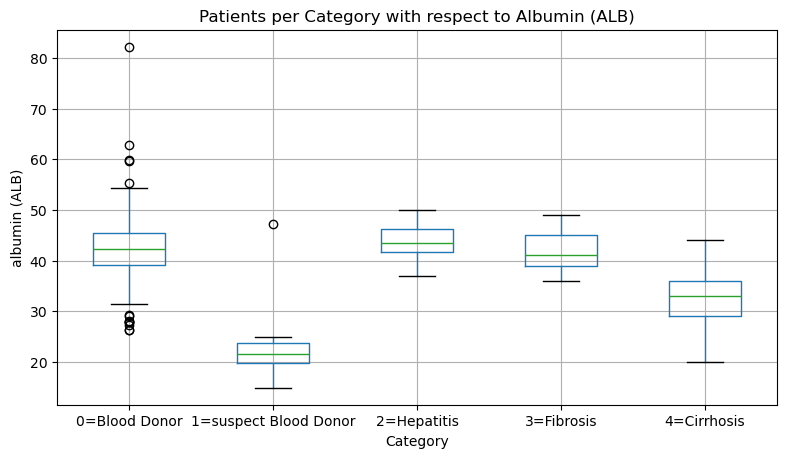

This box plot groups the albumin (ALB) by category.


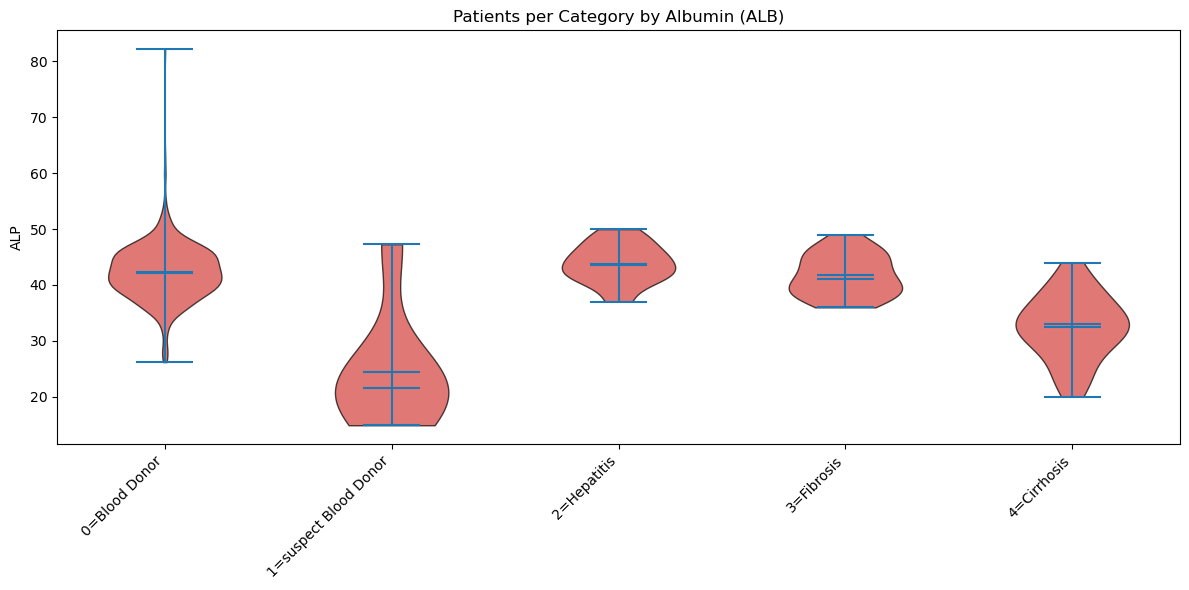

This violin plot groups the ALB by category.


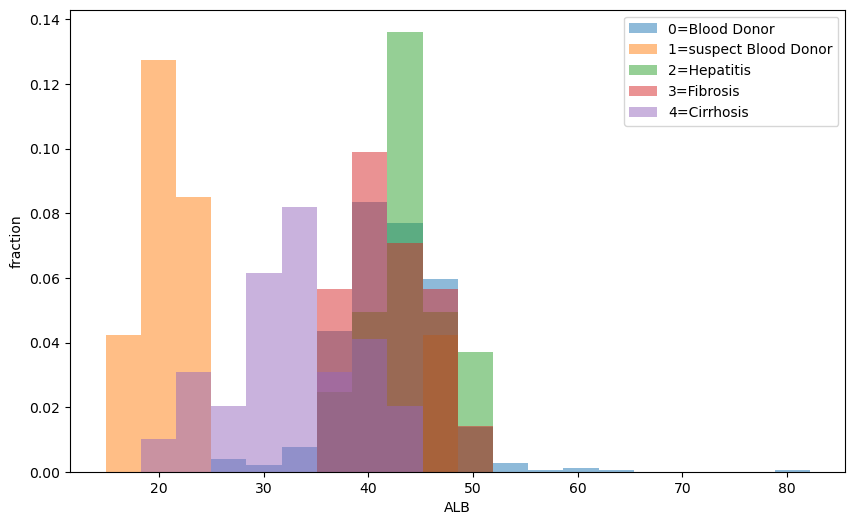

This category-specific histogram groups the ALB by category.


In [15]:
df[['Category','ALB']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category with respect to Albumin (ALB)')
plt.xlabel('Category')
plt.ylabel('albumin (ALB)')
plt.show()
print('This box plot groups the albumin (ALB) by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['ALB'].dropna().values,
    df[df['Category'] == '1=suspect Blood Donor']['ALB'].dropna().values,
    df[df['Category'] == '2=Hepatitis']['ALB'].dropna().values,
    df[df['Category'] == '3=Fibrosis']['ALB'].dropna().values,
    df[df['Category'] == '4=Cirrhosis']['ALB'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '1=suspect Blood Donor', '2=Hepatitis', '3=Fibrosis', '4=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('ALP')
plt.title('Patients per Category by Albumin (ALB)')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the ALB by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['ALB'].min(),df['ALB'].max())

plt.figure(figsize=(10,6))

for c in categories:
    plt.hist(df[df['Category']==c]['ALB'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('ALB')
plt.show()
print('This category-specific histogram groups the ALB by category.')

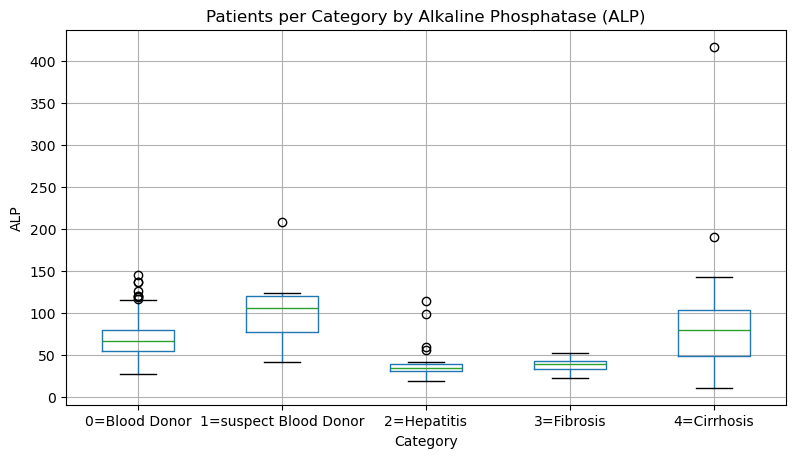

This box plot groups the ALP by category.


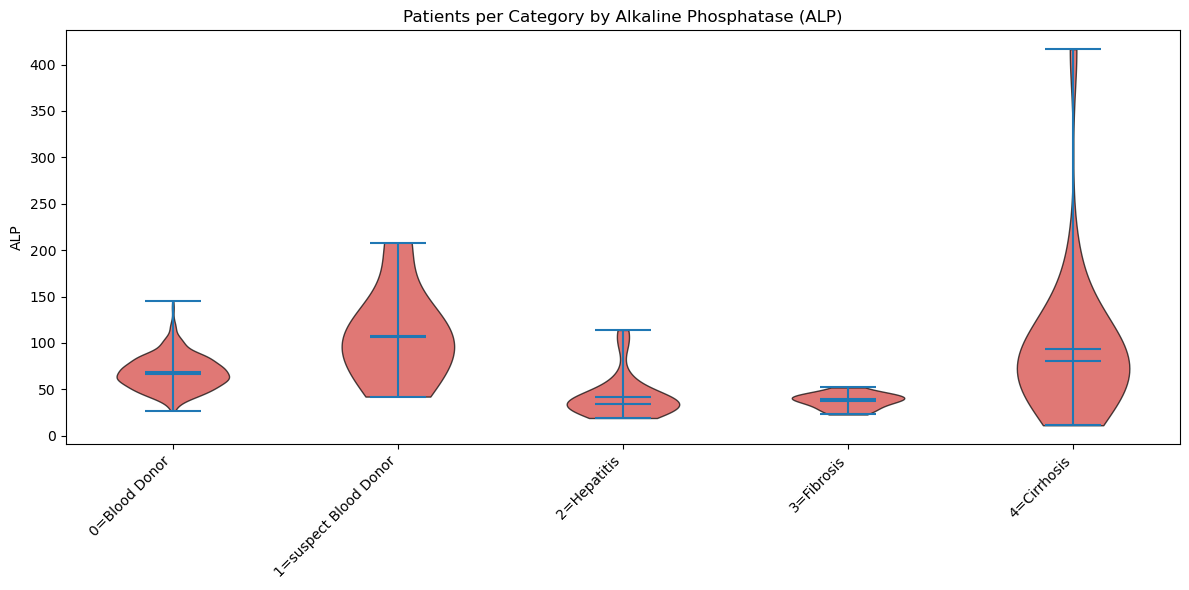

This violin plot groups the ALP by category.


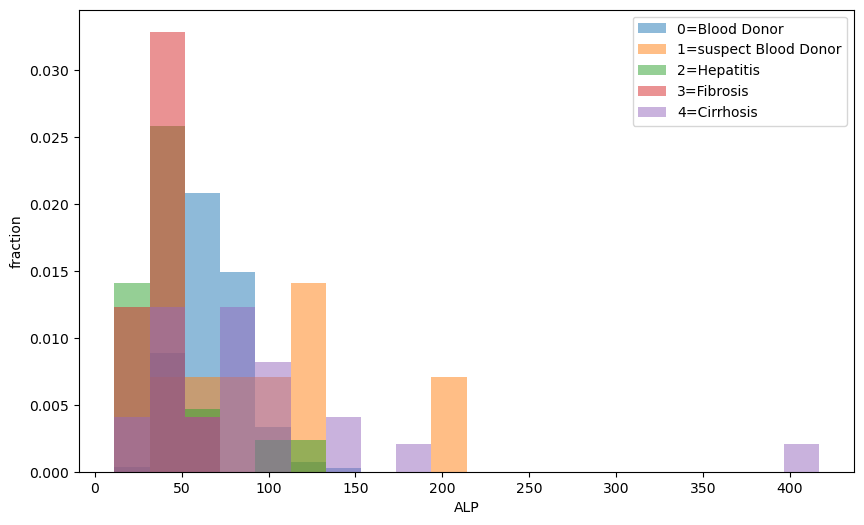

This category-specific histogram groups the ALP by category.


In [16]:
df[['Category','ALP']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Alkaline Phosphatase (ALP)')
plt.xlabel('Category')
plt.ylabel('ALP')
plt.show()
print('This box plot groups the ALP by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['ALP'].dropna().values,
    df[df['Category'] == '1=suspect Blood Donor']['ALP'].dropna().values,
    df[df['Category'] == '2=Hepatitis']['ALP'].dropna().values,
    df[df['Category'] == '3=Fibrosis']['ALP'].dropna().values,
    df[df['Category'] == '4=Cirrhosis']['ALP'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '1=suspect Blood Donor', '2=Hepatitis', '3=Fibrosis', '4=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('ALP')
plt.title('Patients per Category by Alkaline Phosphatase (ALP)')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the ALP by category.')


# dataset = [df[df['Category']=='0=Blood Donor']['ALP'].values,
#            df[df['Category']=='0s=suspect Blood Donor']['ALP'].values,
#            df[df['Category']=='1=Hepatitis']['ALP'].values,
#            df[df['Category']=='2=Fibrosis']['ALP'].values,
#            df[df['Category']=='3=Cirrhosis']['ALP'].values]

# plt.figure(figsize=(10,6))

# plt.violinplot(dataset = dataset, showmeans=True, showmedians=True)
# plt.xticks([1,2,3,4,5],['0=Blood Donor','0s=suspect Blood Donor','1=Hepatitis',' 2=Fibrosis',' 3=Cirrhosis'])
# plt.ylabel('ALP')
# plt.title('Patients per Category by Alkaline Phosphatase (ALP)')
# plt.show()
# print('This violin plot groups the ALP by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['ALP'].min(),df['ALP'].max())

plt.figure(figsize=(10,6))

for c in categories:
    plt.hist(df[df['Category']==c]['ALP'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('ALP')
plt.show()
print('This category-specific histogram groups the ALP by category.')

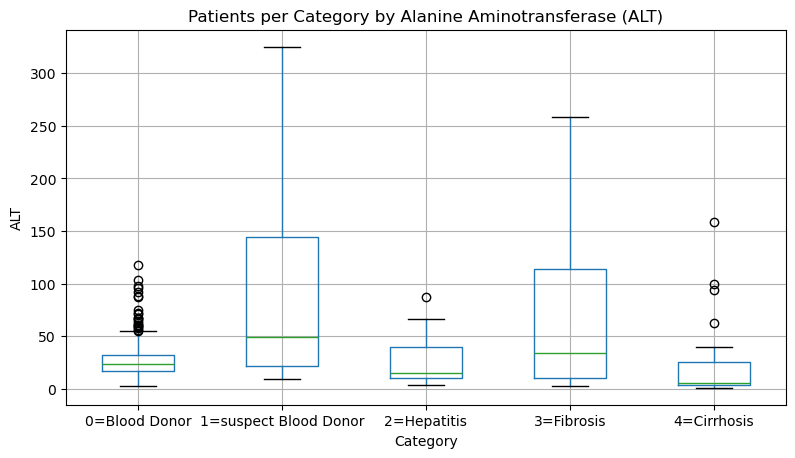

This box plot groups the ALT by category.


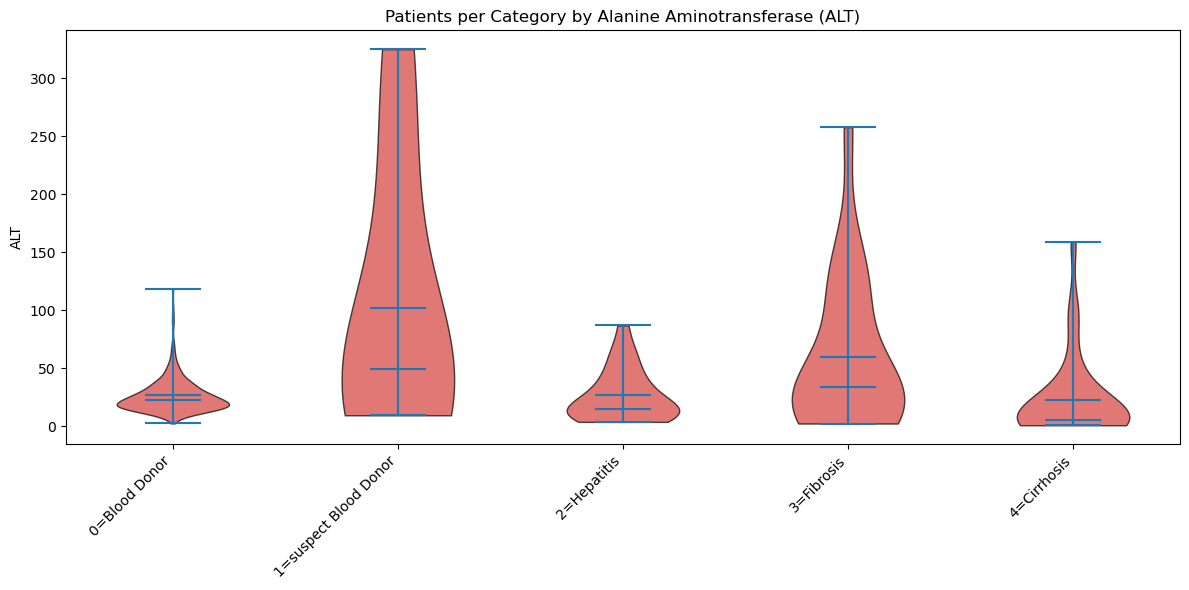

This violin plot groups the ALT by category.


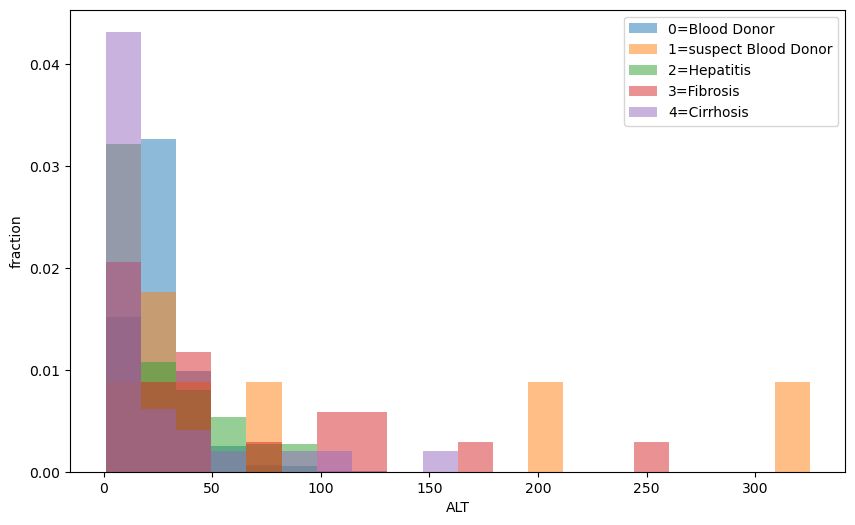

This category-specific histogram groups the ALT by category.


In [17]:
df[['Category','ALT']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Alanine Aminotransferase (ALT)')
plt.xlabel('Category')
plt.ylabel('ALT')
plt.show()
print('This box plot groups the ALT by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['ALT'].dropna().values,
    df[df['Category'] == '1=suspect Blood Donor']['ALT'].dropna().values,
    df[df['Category'] == '2=Hepatitis']['ALT'].dropna().values,
    df[df['Category'] == '3=Fibrosis']['ALT'].dropna().values,
    df[df['Category'] == '4=Cirrhosis']['ALT'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '1=suspect Blood Donor', '2=Hepatitis', '3=Fibrosis', '4=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('ALT')
plt.title('Patients per Category by Alanine Aminotransferase (ALT)')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the ALT by category.')


# dataset = [df[df['Category']=='0=Blood Donor']['ALT'].values,
#            df[df['Category']=='0s=suspect Blood Donor']['ALT'].values,
#            df[df['Category']=='1=Hepatitis']['ALT'].values,
#            df[df['Category']=='2=Fibrosis']['ALT'].values,
#            df[df['Category']=='3=Cirrhosis']['ALT'].values]

# plt.figure(figsize=(10,6))

# plt.violinplot(dataset = dataset, showmeans=True, showmedians=True)
# plt.xticks([1,2,3,4,5],['0=Blood Donor','0s=suspect Blood Donor','1=Hepatitis',' 2=Fibrosis',' 3=Cirrhosis'])
# plt.ylabel('ALT')
# plt.title('Patients per Category by Alanine Aminotransferase (ALT)')
# plt.show()
# print('This violin plot groups the ALT by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['ALT'].min(),df['ALT'].max())

plt.figure(figsize=(10,6))

for c in categories:
    plt.hist(df[df['Category']==c]['ALT'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('ALT')
plt.show()
print('This category-specific histogram groups the ALT by category.')

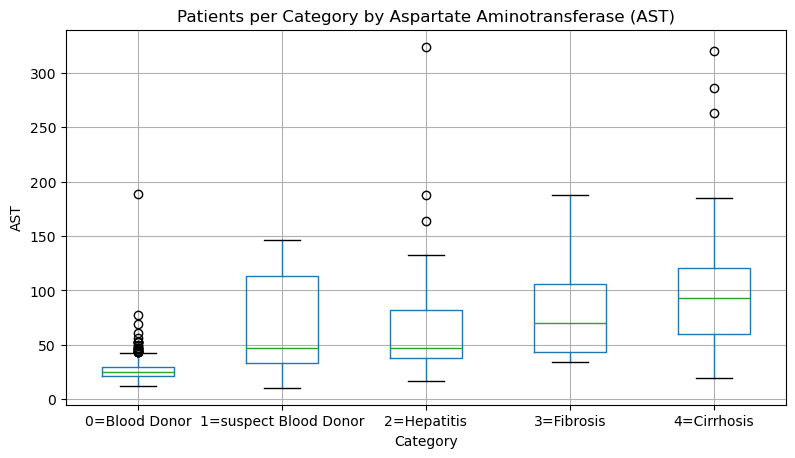

This box plot groups the AST by category.


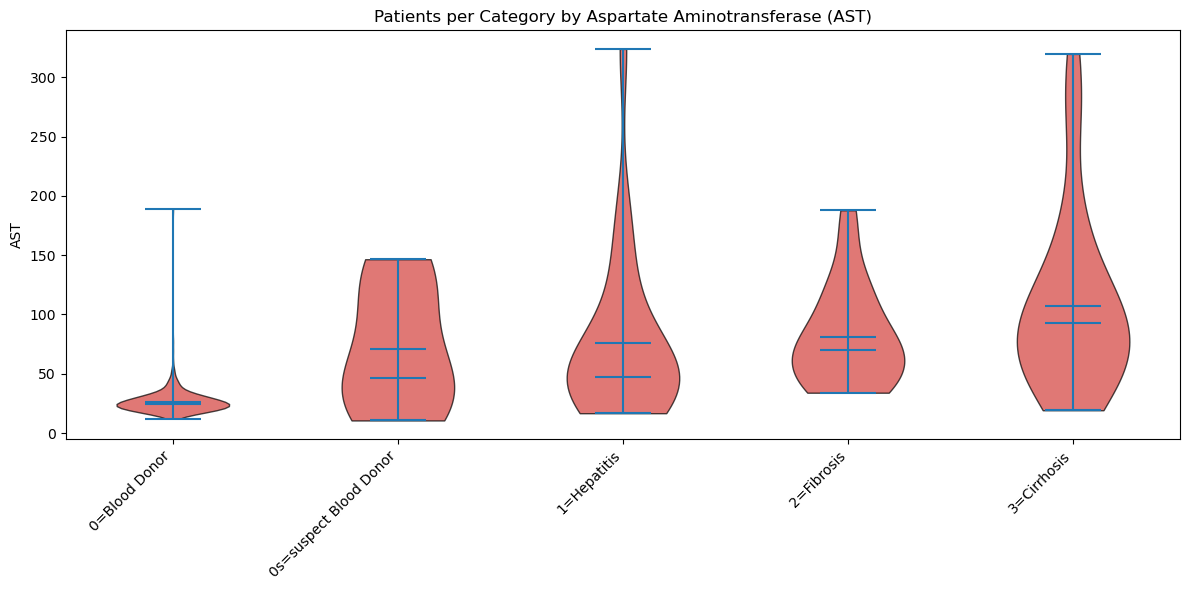

This violin plot groups the AST by category.


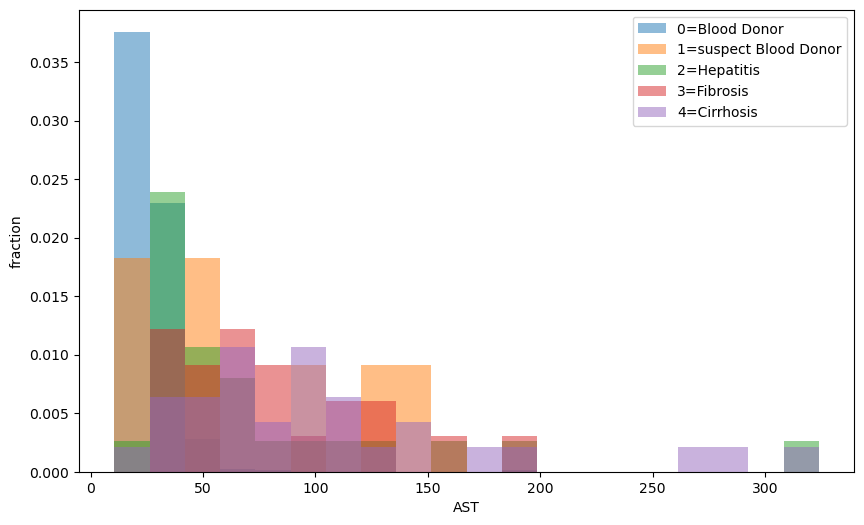

This category-specific histogram groups the AST by category.


In [18]:
df[['Category','AST']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Aspartate Aminotransferase (AST)')
plt.xlabel('Category')
plt.ylabel('AST')
plt.show()
print('This box plot groups the AST by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['AST'].dropna().values,
    df[df['Category'] == '1=suspect Blood Donor']['AST'].dropna().values,
    df[df['Category'] == '2=Hepatitis']['AST'].dropna().values,
    df[df['Category'] == '3=Fibrosis']['AST'].dropna().values,
    df[df['Category'] == '4=Cirrhosis']['AST'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('AST')
plt.title('Patients per Category by Aspartate Aminotransferase (AST)')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the AST by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['AST'].min(),df['AST'].max())

plt.figure(figsize=(10,6))

for c in categories:
    plt.hist(df[df['Category']==c]['AST'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('AST')
plt.show()
print('This category-specific histogram groups the AST by category.')

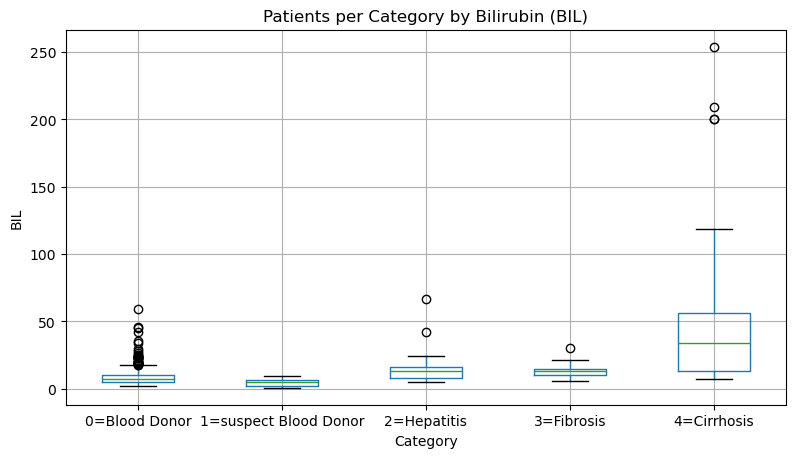

This box plot groups the BIL by category.


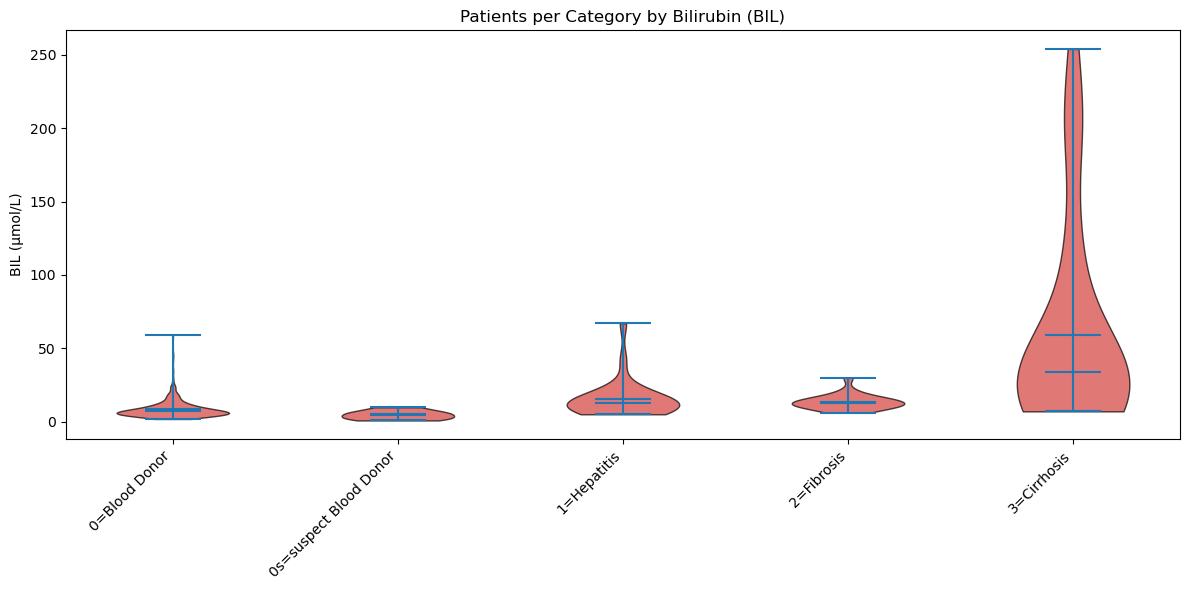

This violin plot groups the BIL by category.


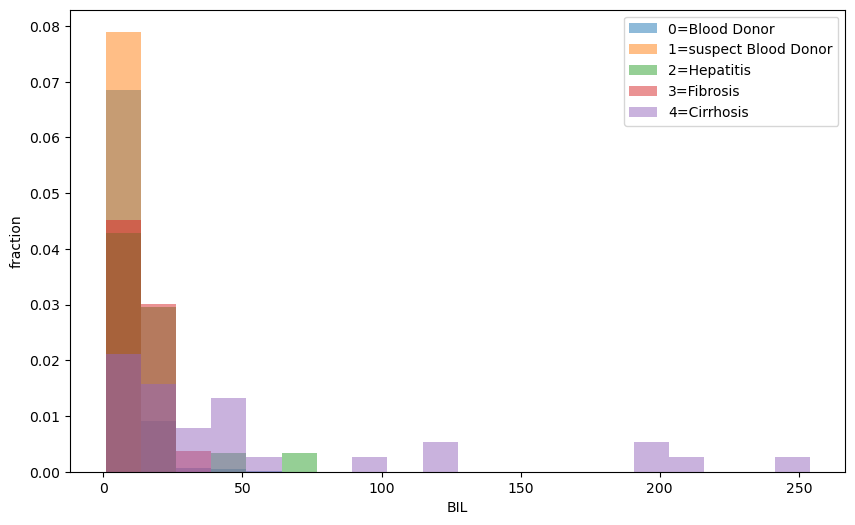

This category-specific histogram groups the BIL by category.


In [19]:
df[['Category','BIL']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Bilirubin (BIL)')
plt.xlabel('Category')
plt.ylabel('BIL')
plt.show()
print('This box plot groups the BIL by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['BIL'].dropna().values,
    df[df['Category'] == '1=suspect Blood Donor']['BIL'].dropna().values,
    df[df['Category'] == '2=Hepatitis']['BIL'].dropna().values,
    df[df['Category'] == '3=Fibrosis']['BIL'].dropna().values,
    df[df['Category'] == '4=Cirrhosis']['BIL'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('BIL (μmol/L)')
plt.title('Patients per Category by Bilirubin (BIL)')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the BIL by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['BIL'].min(),df['BIL'].max())

plt.figure(figsize=(10,6))

for c in categories:
    plt.hist(df[df['Category']==c]['BIL'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('BIL')
plt.show()
print('This category-specific histogram groups the BIL by category.')

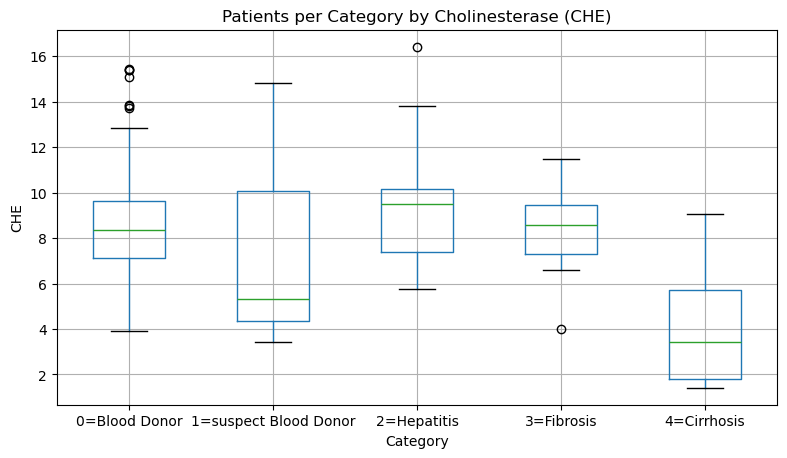

This box plot groups the CHE by category.


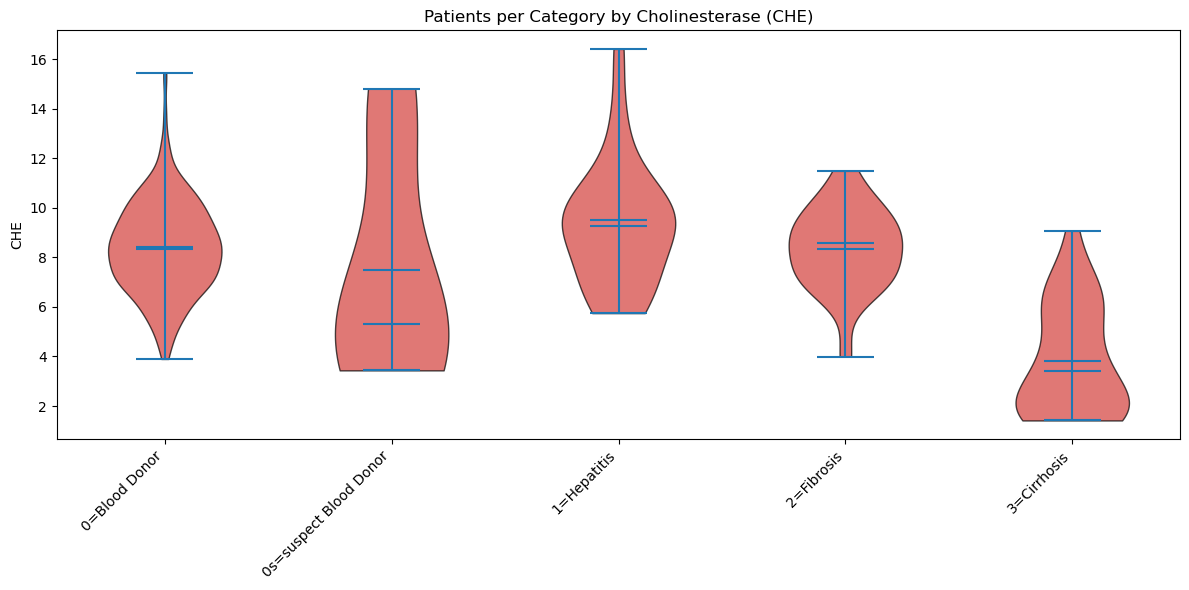

This violin plot groups the CHE by category.


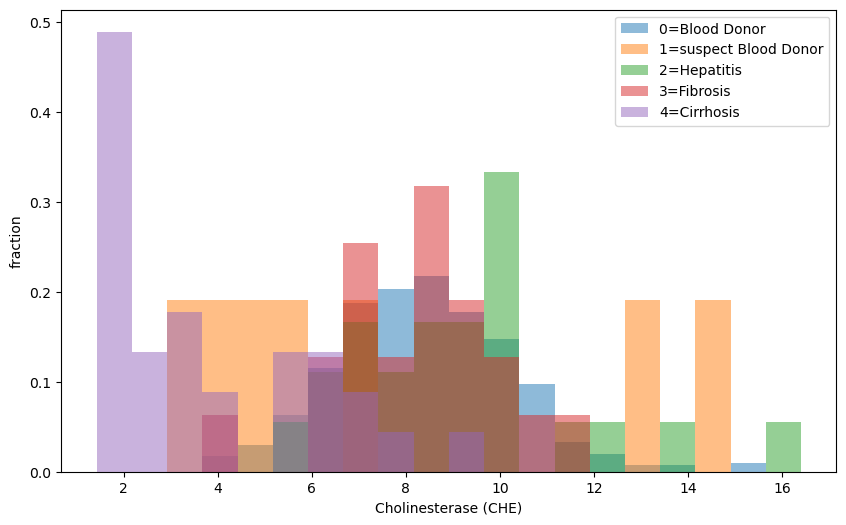

This stacked bar chart groups the CHE by category.


In [20]:
df[['Category','CHE']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Cholinesterase (CHE)')
plt.xlabel('Category')
plt.ylabel('CHE')
plt.show()
print('This box plot groups the CHE by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['CHE'].dropna().values,
    df[df['Category'] == '1=suspect Blood Donor']['CHE'].dropna().values,
    df[df['Category'] == '2=Hepatitis']['CHE'].dropna().values,
    df[df['Category'] == '3=Fibrosis']['CHE'].dropna().values,
    df[df['Category'] == '4=Cirrhosis']['CHE'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('CHE')
plt.title('Patients per Category by Cholinesterase (CHE)')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the CHE by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['CHE'].min(),df['CHE'].max())

plt.figure(figsize=(10,6))

for c in categories:
    plt.hist(df[df['Category']==c]['CHE'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('Cholinesterase (CHE)')
plt.show()
print('This stacked bar chart groups the CHE by category.')

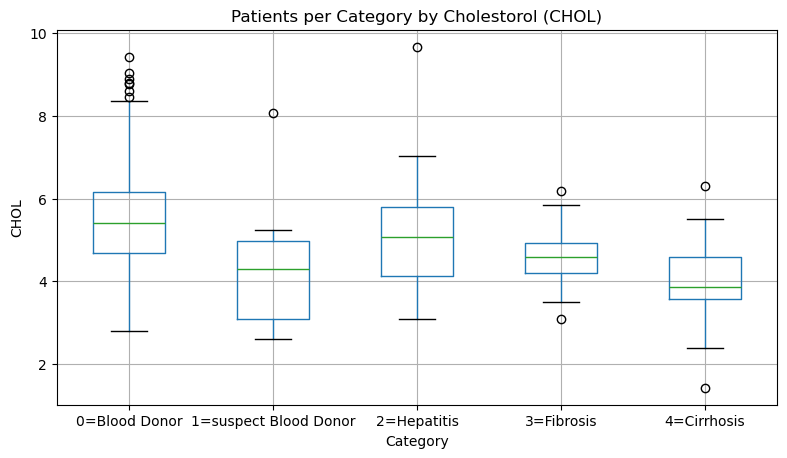

This box plot groups the CHOL by category.


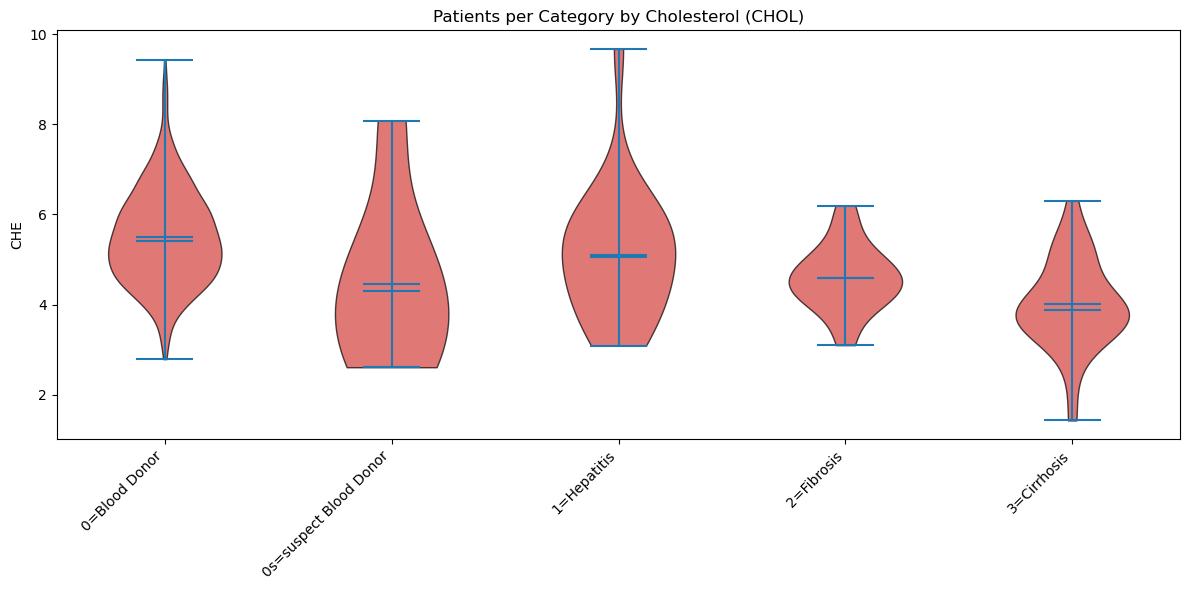

This violin plot groups the CHOL by category.


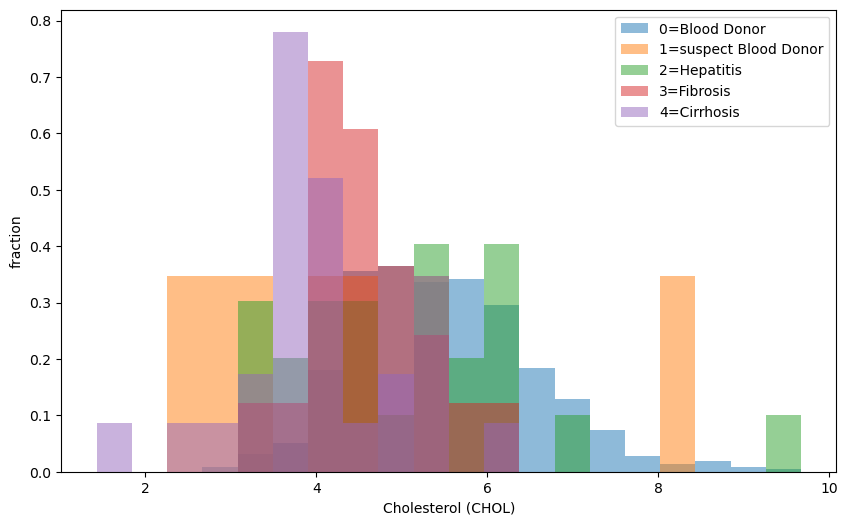

This stacked bar chart groups the CHOL by category.


In [21]:
df[['Category','CHOL']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Cholestorol (CHOL)')
plt.xlabel('Category')
plt.ylabel('CHOL')
plt.show()
print('This box plot groups the CHOL by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['CHOL'].dropna().values,
    df[df['Category'] == '1=suspect Blood Donor']['CHOL'].dropna().values,
    df[df['Category'] == '2=Hepatitis']['CHOL'].dropna().values,
    df[df['Category'] == '3=Fibrosis']['CHOL'].dropna().values,
    df[df['Category'] == '4=Cirrhosis']['CHOL'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('CHE')
plt.title('Patients per Category by Cholesterol (CHOL)')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the CHOL by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['CHOL'].min(),df['CHOL'].max())

plt.figure(figsize=(10,6))

for c in categories:
    plt.hist(df[df['Category']==c]['CHOL'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('Cholesterol (CHOL)')
plt.show()
print('This stacked bar chart groups the CHOL by category.')

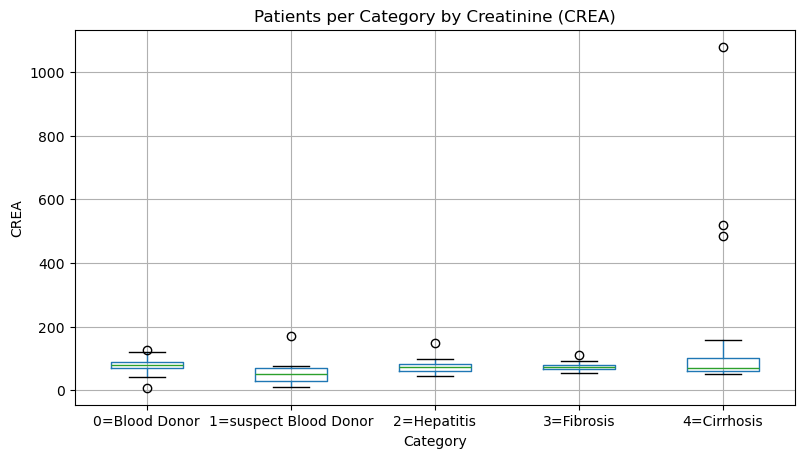

This box plot groups the CREA by category.


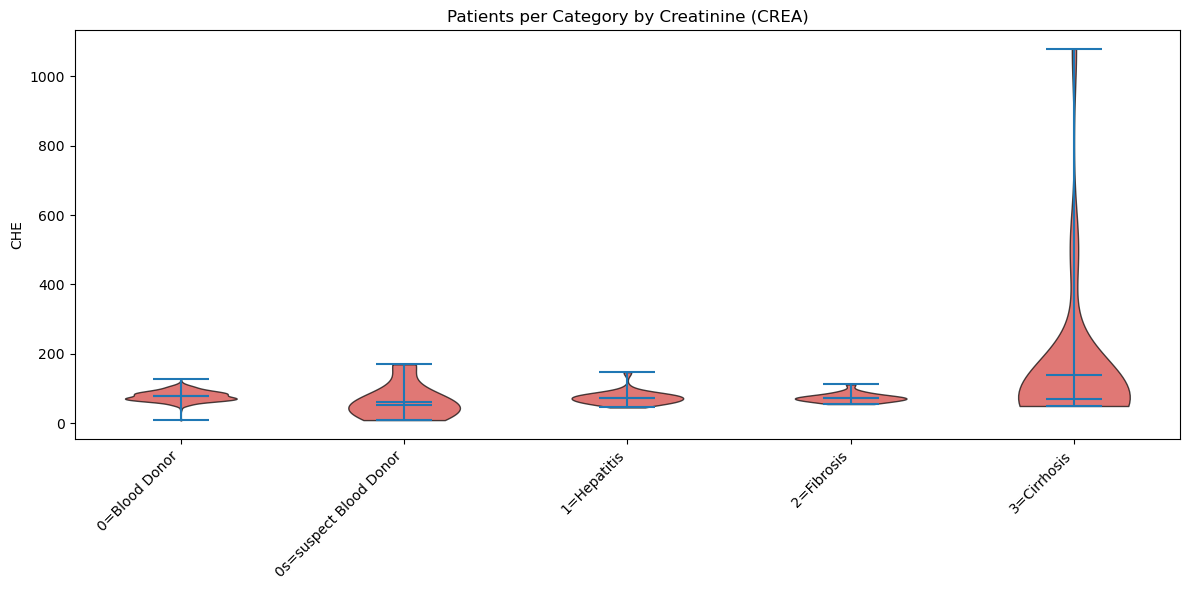

This violin plot groups the CREA by category.


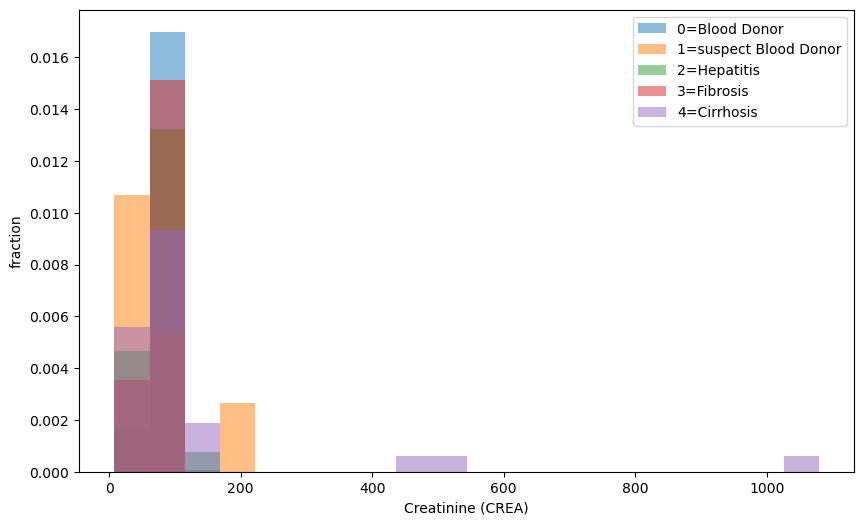

This stacked bar chart groups the CREA by category.


In [22]:
df[['Category','CREA']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Creatinine (CREA)')
plt.xlabel('Category')
plt.ylabel('CREA')
plt.show()
print('This box plot groups the CREA by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['CREA'].dropna().values,
    df[df['Category'] == '1=suspect Blood Donor']['CREA'].dropna().values,
    df[df['Category'] == '2=Hepatitis']['CREA'].dropna().values,
    df[df['Category'] == '3=Fibrosis']['CREA'].dropna().values,
    df[df['Category'] == '4=Cirrhosis']['CREA'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('CHE')
plt.title('Patients per Category by Creatinine (CREA)')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the CREA by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['CREA'].min(),df['CREA'].max())

plt.figure(figsize=(10,6))

for c in categories:
    plt.hist(df[df['Category']==c]['CREA'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('Creatinine (CREA)')
plt.show()
print('This stacked bar chart groups the CREA by category.')

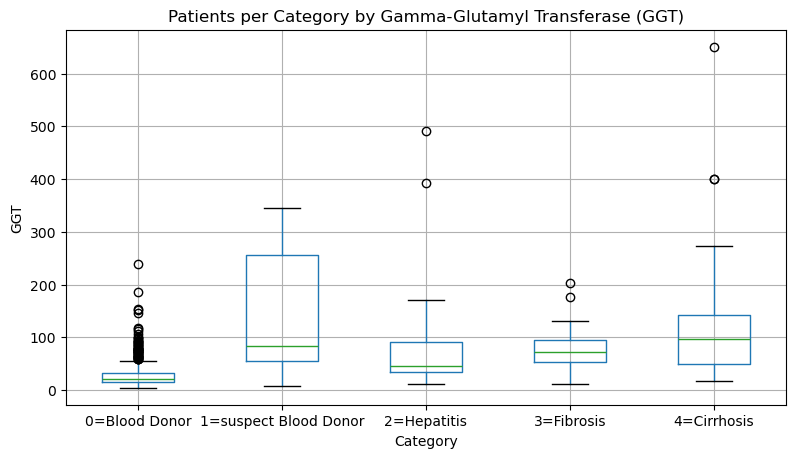

This box plot groups the GGT by category.


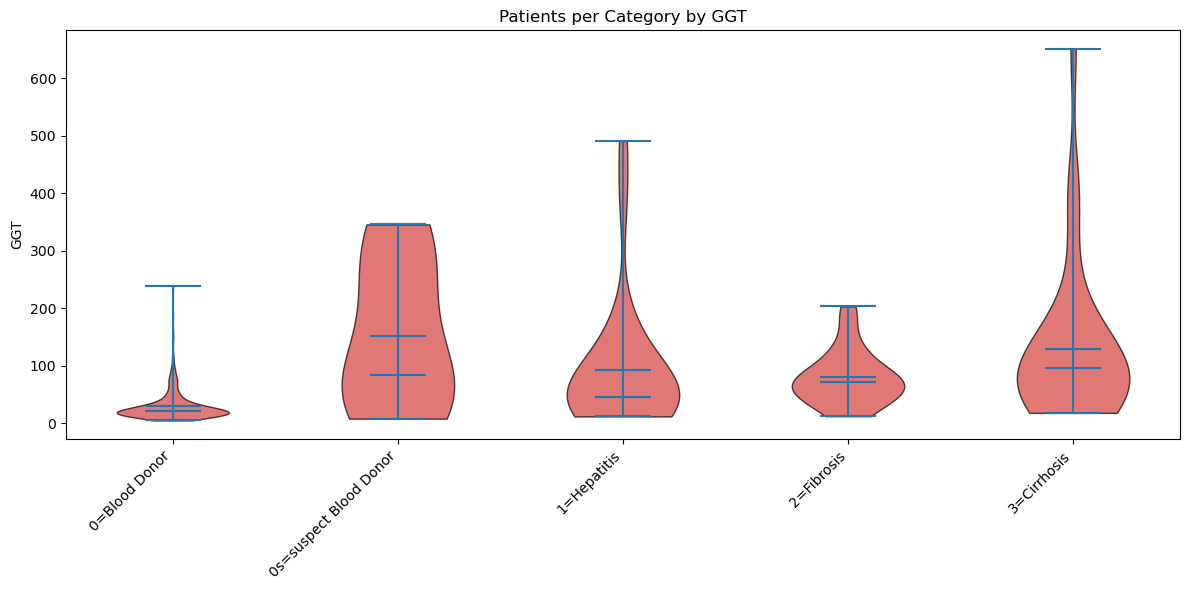

This violin plot groups the GGT by category.


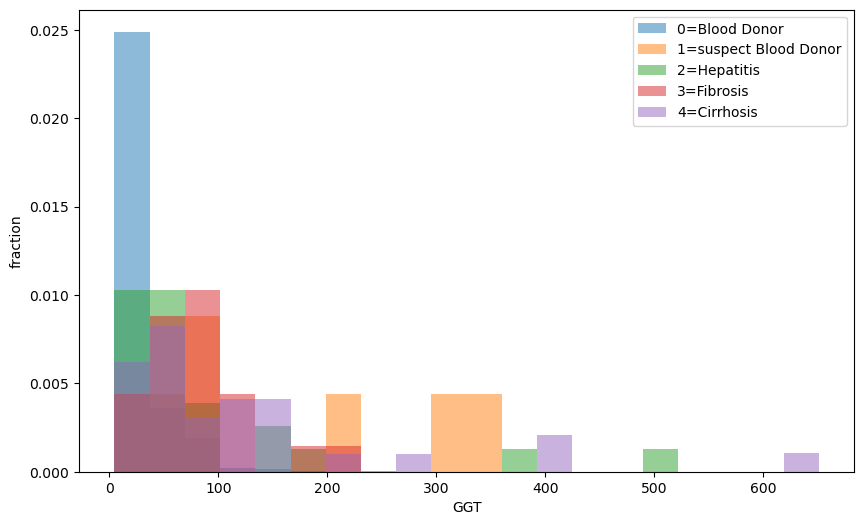

This stacked bar chart groups the GGT by category.


In [23]:
df[['Category','GGT']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Gamma-Glutamyl Transferase (GGT)')
plt.xlabel('Category')
plt.ylabel('GGT')
plt.show()
print('This box plot groups the GGT by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['GGT'].dropna().values,
    df[df['Category'] == '1=suspect Blood Donor']['GGT'].dropna().values,
    df[df['Category'] == '2=Hepatitis']['GGT'].dropna().values,
    df[df['Category'] == '3=Fibrosis']['GGT'].dropna().values,
    df[df['Category'] == '4=Cirrhosis']['GGT'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('GGT')
plt.title('Patients per Category by GGT')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the GGT by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['GGT'].min(),df['GGT'].max())

plt.figure(figsize=(10,6))

for c in categories:
    plt.hist(df[df['Category']==c]['GGT'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('GGT')
plt.show()
print('This stacked bar chart groups the GGT by category.')

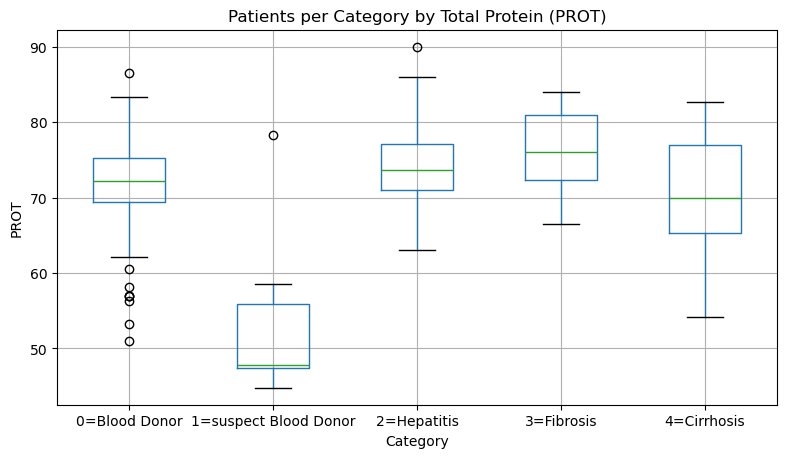

This box plot groups the PROT by category.


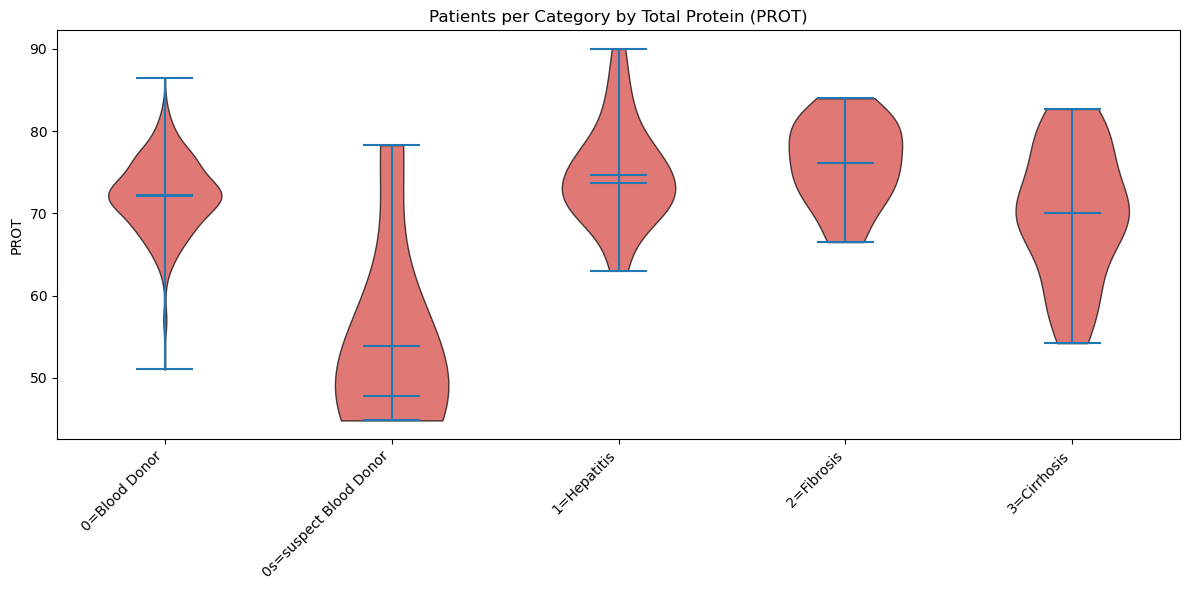

This violin plot groups the PROT by category.


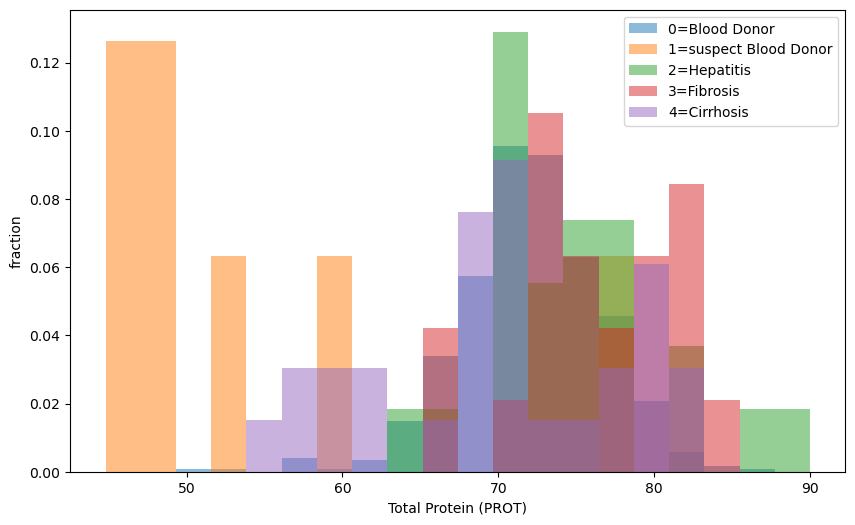

This stacked bar chart groups the PROT by category.


In [24]:
df[['Category','PROT']].boxplot(by='Category',figsize=(9,5))
plt.suptitle("")
plt.title('Patients per Category by Total Protein (PROT)')
plt.xlabel('Category')
plt.ylabel('PROT')
plt.show()
print('This box plot groups the PROT by category.')

import matplotlib.pyplot as plt
import numpy as np

# Filter out NaN values and create datasets
dataset = [
    df[df['Category'] == '0=Blood Donor']['PROT'].dropna().values,
    df[df['Category'] == '1=suspect Blood Donor']['PROT'].dropna().values,
    df[df['Category'] == '2=Hepatitis']['PROT'].dropna().values,
    df[df['Category'] == '3=Fibrosis']['PROT'].dropna().values,
    df[df['Category'] == '4=Cirrhosis']['PROT'].dropna().values
]

# Remove empty datasets
dataset = [d for d in dataset if len(d) > 0]

plt.figure(figsize=(12, 6))

# Create violin plot
vp = plt.violinplot(dataset=dataset, showmeans=True, showmedians=True)

# Customize violin plot colors
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

# Set x-axis labels
categories = ['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis']
plt.xticks(range(1, len(dataset) + 1), categories, rotation=45, ha='right')

plt.ylabel('PROT')
plt.title('Patients per Category by Total Protein (PROT)')

# Adjust layout to prevent cut-off labels
plt.tight_layout()

plt.show()

print('This violin plot groups the PROT by category.')

import matplotlib
from matplotlib import pylab as plt

categories = df['Category'].unique()
bin_range = (df['PROT'].min(),df['PROT'].max())

plt.figure(figsize=(10,6))

for c in categories:
    plt.hist(df[df['Category']==c]['PROT'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.ylabel('fraction')
plt.xlabel('Total Protein (PROT)')
plt.show()
print('This stacked bar chart groups the PROT by category.')

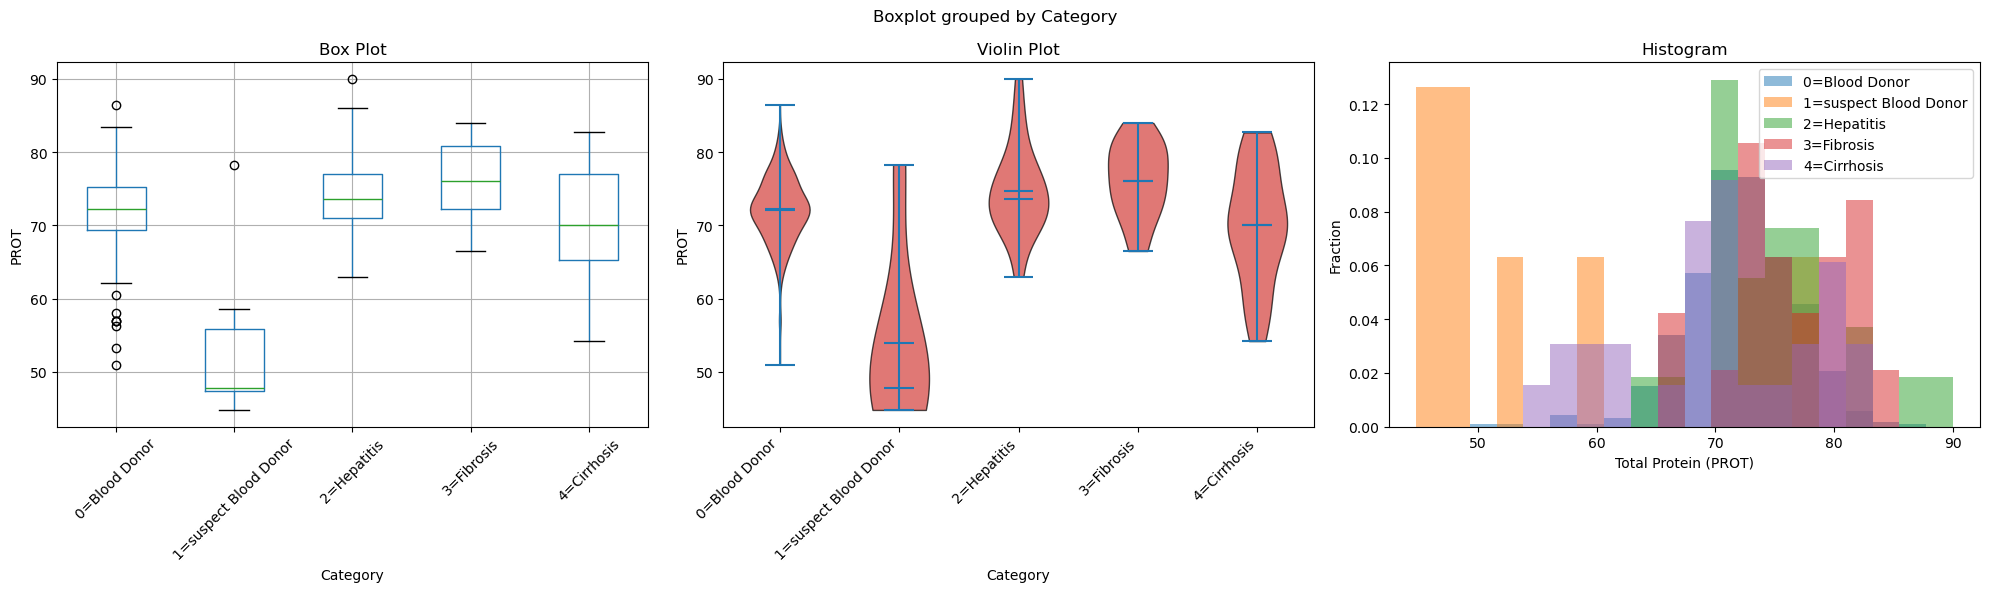

These plots group the PROT by category.


In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Set up the figure and axes
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Patients per Category by Total Protein (PROT)', fontsize=16)

# Box Plot
df.boxplot(column='PROT', by='Category', ax=ax1)
ax1.set_title('Box Plot')
ax1.set_xlabel('Category')
ax1.set_ylabel('PROT')
ax1.tick_params(axis='x', rotation=45)

# Violin Plot
categories = ['0=Blood Donor', '1=suspect Blood Donor', '2=Hepatitis', '3=Fibrosis', '4=Cirrhosis']
dataset = [df[df['Category'] == cat]['PROT'].dropna().values for cat in categories]
dataset = [d for d in dataset if len(d) > 0]

vp = ax2.violinplot(dataset=dataset, showmeans=True, showmedians=True)
for pc in vp['bodies']:
    pc.set_facecolor('#D43F3A')
    pc.set_edgecolor('black')
    pc.set_alpha(0.7)

ax2.set_xticks(range(1, len(dataset) + 1))
ax2.set_xticklabels(categories, rotation=45, ha='right')
ax2.set_title('Violin Plot')
ax2.set_xlabel('Category')
ax2.set_ylabel('PROT')

# Histogram
bin_range = (df['PROT'].min(), df['PROT'].max())
for c in categories:
    ax3.hist(df[df['Category']==c]['PROT'], alpha=0.5, label=c, range=bin_range, bins=20, density=True)
ax3.legend()
ax3.set_title('Histogram')
ax3.set_xlabel('Total Protein (PROT)')
ax3.set_ylabel('Fraction')

# Adjust layout and display
plt.tight_layout()
plt.show()

print('These plots group the PROT by category.')


### Column Pair Plots Between Features

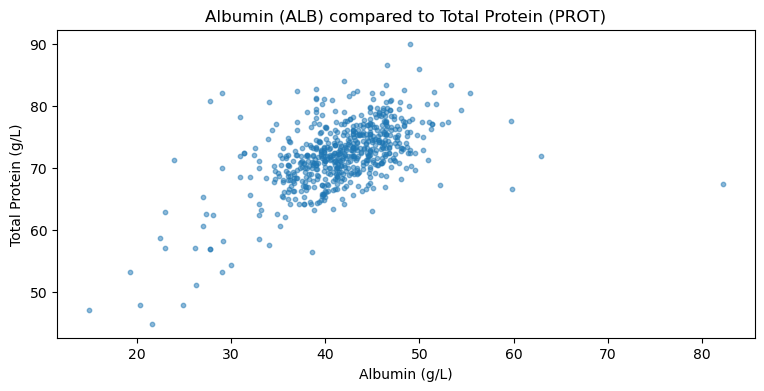

This scatter plot shows the relationship between albumin and total protein. Albumin and total protein in blood are positively correlated.


In [26]:
df.plot.scatter('ALB','PROT',figsize=(9,4),alpha=0.5,s=10) 

plt.title('Albumin (ALB) compared to Total Protein (PROT)')
plt.xlabel('Albumin (g/L)')
plt.ylabel('Total Protein (g/L)')
plt.show()
print('This scatter plot shows the relationship between albumin and total protein. Albumin and total protein in blood are positively correlated.')

In [27]:
df_cleaned = df.dropna()

nbins = 40

heatmap, xedges, yedges = np.histogram2d(df_cleaned['ALB'], df_cleaned['PROT'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

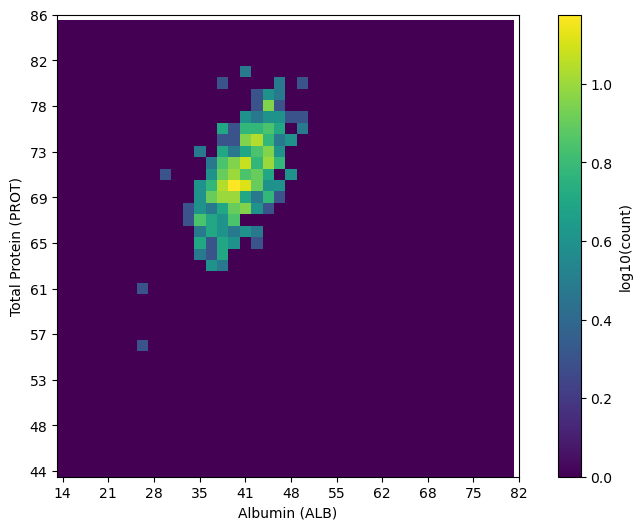

In [28]:
heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined
plt.figure(figsize=(10,6))

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
#plt.imshow(heatmap.T, origin='lower',vmin=0) # use log count
plt.xlabel('Albumin (ALB)')
plt.ylabel('Total Protein (PROT)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)',cmap='coolwarm')
plt.show()

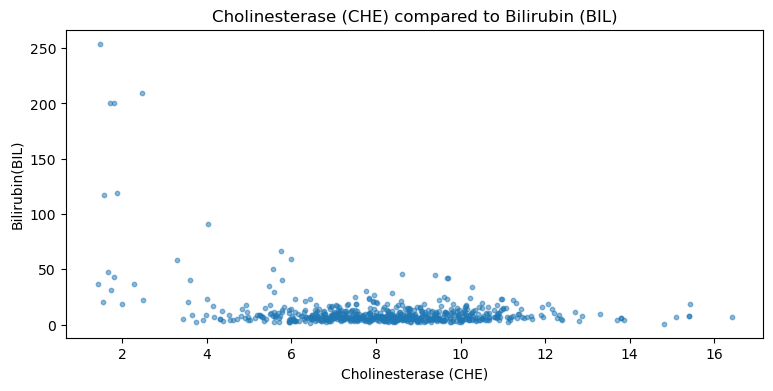

This scatter plot shows the relationship between cholinesterase and bilirubin. Cholinesterase and bilirubin in blood are weakly negatively correlated.


In [29]:
df.plot.scatter('CHE','BIL',figsize=(9,4),alpha=0.5,s=10) 

plt.title('Cholinesterase (CHE) compared to Bilirubin (BIL)')
plt.xlabel('Cholinesterase (CHE)')
plt.ylabel('Bilirubin(BIL)')
plt.show()
print('This scatter plot shows the relationship between cholinesterase and bilirubin. Cholinesterase and bilirubin in blood are weakly negatively correlated.')

In [30]:
df_cleaned = df.dropna()

nbins = 40

heatmap, xedges, yedges = np.histogram2d(df_cleaned['CHE'], df_cleaned['BIL'], bins=nbins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

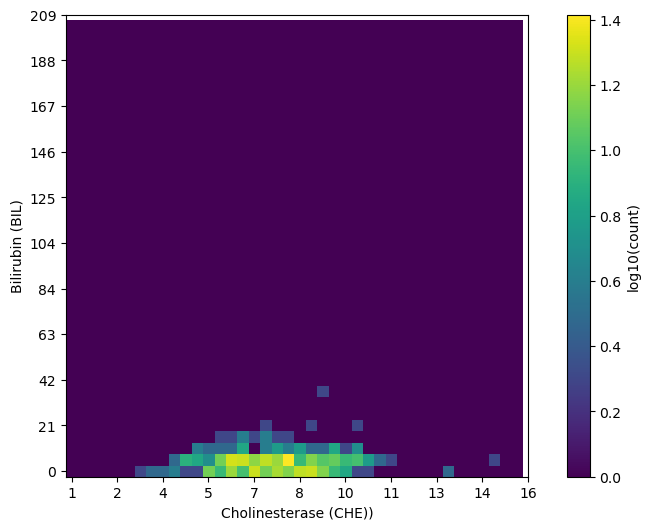

In [31]:
heatmap[heatmap == 0] = 0.1 # we will use log and log(0) is undefined
plt.figure(figsize=(10,6))

plt.imshow(np.log10(heatmap).T, origin='lower',vmin=0) # use log count
#plt.imshow(heatmap.T, origin='lower',vmin=0) # use log count
plt.xlabel('Cholinesterase (CHE))')
plt.ylabel('Bilirubin (BIL)')
plt.xticks(np.arange(nbins+1)[::4],xedges[::4].astype(int))
plt.yticks(np.arange(nbins+1)[::4],yedges[::4].astype(int))
plt.colorbar(label='log10(count)',cmap='coolwarm')
plt.show()

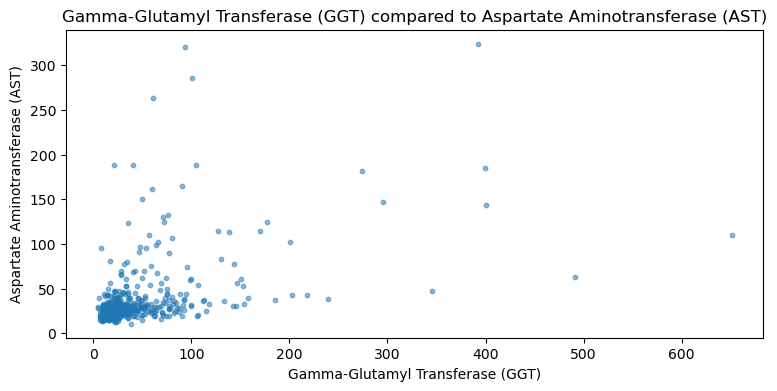

This scatter plot shows the relationship between Gamma-Glutamyl Transferase and Aspartate Aminotransferase. Gamma-Glutamyl Transferase and Aspartate Aminotransferase in blood are positively correlated.


In [32]:
df.plot.scatter('GGT','AST',figsize=(9,4),alpha=0.5,s=10) 

plt.title('Gamma-Glutamyl Transferase (GGT) compared to Aspartate Aminotransferase (AST)')
plt.xlabel('Gamma-Glutamyl Transferase (GGT)')
plt.ylabel('Aspartate Aminotransferase (AST)')
plt.show()
print('This scatter plot shows the relationship between Gamma-Glutamyl Transferase and Aspartate Aminotransferase. Gamma-Glutamyl Transferase and Aspartate Aminotransferase in blood are positively correlated.')

### Correlation Matrix

In [33]:
df_numeric = df.drop(columns=['Category', 'Unnamed: 0'])
df_numeric.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [34]:
import pandas as pd

# Converting 'Sex' to numeric values
df_numeric['Sex'] = df_numeric['Sex'].map({'m': 1, 'f': 2})


In [35]:
corr_matrix = df_numeric.corr(method='pearson', min_periods=1, numeric_only=False)
corr_matrix

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Age,1.000000,0.024544,-0.197498,0.173340,-0.006021,0.088666,0.032492,-0.075093,0.125641,-0.022296,0.153087,-0.153668
Sex,0.024544,1.000000,-0.146140,0.019825,-0.161868,-0.130891,-0.111177,-0.169111,0.030208,-0.159589,-0.133276,-0.051277
ALB,-0.197498,-0.146140,1.000000,-0.141584,0.001606,-0.193450,-0.221651,0.375878,0.208248,-0.001573,-0.155749,0.557197
ALP,0.173340,0.019825,-0.141584,1.000000,0.214480,0.063948,0.056078,0.033753,0.125429,0.149832,0.454630,-0.055109
ALT,-0.006021,-0.161868,0.001606,0.214480,1.000000,0.273326,-0.038469,0.147000,0.068947,-0.043025,0.248114,0.094730
AST,0.088666,-0.130891,-0.193450,0.063948,0.273326,1.000000,0.312231,-0.208536,-0.209970,-0.021387,0.491263,0.040071
BIL,0.032492,-0.111177,-0.221651,0.056078,-0.038469,0.312231,1.000000,-0.333172,-0.180370,0.031224,0.217024,-0.047638
CHE,-0.075093,-0.169111,0.375878,0.033753,0.147000,-0.208536,-0.333172,1.000000,0.425456,-0.011157,-0.110345,0.295427
CHOL,0.125641,0.030208,0.208248,0.125429,0.068947,-0.209970,-0.180370,0.425456,1.000000,-0.047744,-0.006895,0.207071
CREA,-0.022296,-0.159589,-0.001573,0.149832,-0.043025,-0.021387,0.031224,-0.011157,-0.047744,1.000000,0.121003,-0.031704


/var/folders/5f/vr6wj5x522d5sydssspp10r80000gn/T/ipykernel_19191/2612980567.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 1600x1400 with 0 Axes>

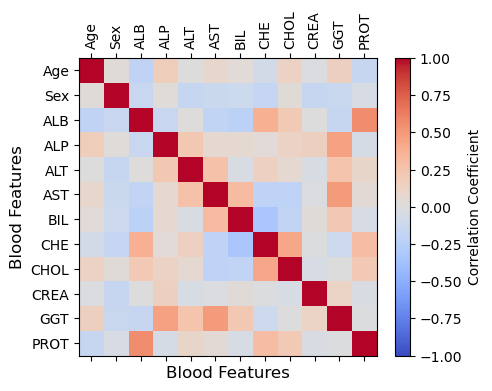

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a larger figure
plt.figure(figsize=(16, 14))

# Create the heatmap
plt.matshow(corr_matrix, fignum=None, vmin=-1, vmax=1, cmap='coolwarm')

# Adjust font size for readability
plt.xticks(range(df_numeric.shape[1]), df_numeric.columns, rotation=90, fontsize=10)
plt.yticks(range(df_numeric.shape[1]), df_numeric.columns, fontsize=10)

plt.xlabel('Blood Features', fontsize=12)
plt.ylabel('Blood Features', fontsize=12)
plt.colorbar(label='Correlation Coefficient', shrink=0.8)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.show()


## Step 2: Splitting the Data

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

X = df.drop(columns=['Category','Unnamed: 0'])
y = df['Category']

# from sklearn.preprocessing import LabelEncoder
# # Create a LabelEncoder object
# le = LabelEncoder()

# # Fit the encoder on the target variable and transform it
# y_encoded = le.fit_transform(y)

def StratifiedSplit(X, y, random_state, test_size, n_splits):
    # stratified train-test split
    X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=random_state)

    # do StratifiedKFold split on other
    kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)
    for train_index, val_index in kf.split(X_other, y_other):
        X_train = X_other.iloc[train_index]
        y_train = y_other.iloc[train_index]
        X_val = X_other.iloc[val_index]
        y_val = y_other.iloc[val_index]
        
        print("Train set:")
        print(X_train)
        print(y_train)
        print("\nValidation set:")
        print(X_val)
        print(y_val)
        print("\nTest set:")
        print(X_test)
        print(y_test)
        print("--------------------")
    
    return X_train, y_train, X_val, y_val, X_test, y_test

# Call the function
X_train, y_train, X_val, y_val, X_test, y_test = StratifiedSplit(X, y, random_state=42, test_size=0.2, n_splits=4)

# # Now you can print X_train and y_train separately
# print("Final X_train:")
# print(X_train)
# print("\nFinal y_train:")
# print(y_train)


Train set:
     Age Sex   ALB   ALP   ALT    AST    BIL   CHE  CHOL  CREA    GGT  PROT
441   49   f  39.3  59.4  18.3   15.0    4.8  8.03  4.58  83.0   12.5  74.3
216   52   m  82.2  82.2  37.0   23.7    7.8  8.90  6.09  77.0   87.8  67.4
605   42   f  33.0  79.0   3.7   55.7  200.0  1.72  5.16  89.1  146.3  69.9
341   34   f  39.7  39.3  11.2   16.4    8.4  5.27  4.68  61.0   24.3  71.5
595   56   m  27.0  81.1  17.0  319.8   37.0  1.42  3.54  66.9   93.7  65.3
..   ...  ..   ...   ...   ...    ...    ...   ...   ...   ...    ...   ...
432   48   f  43.7  50.1  17.3   26.3    8.1  8.15  5.38  64.0   13.4  73.1
27    34   m  29.0  41.6  29.1   16.1    4.8  6.82  4.03  62.0   14.5  53.2
561   41   f  37.0  31.2   8.2   38.3    7.0  7.08  5.30  60.8   24.7  82.4
63    37   m  50.4  48.5  19.4   27.5   11.6  5.78  4.93  90.0   27.8  75.0
347   35   f  42.0  69.0  19.9   16.6   10.8  7.85  4.43  67.0   15.1  64.1

[369 rows x 12 columns]
441    0=Blood Donor
216    0=Blood Donor
605      4

In [38]:
print(y_test.shape)

(123,)


In [39]:
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import StratifiedKFold

# X = df.drop(columns=['Category','Unnamed: 0'])
# y = df['Category']

# def StratifiedSplit(X,y,random_state,test_size,n_splits):
#     # stratified train-test split
#     X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = test_size,stratify=y,random_state=random_state)

#     # do StratifiedKFold split on other
#     kf = StratifiedKFold(n_splits=n_splits,shuffle=True,random_state=random_state)
#     for train_index, val_index in kf.split(X_other,y_other):
#         X_train = X_other.iloc[train_index]
#         y_train = y_other.iloc[train_index]
#         X_val = X_other.iloc[val_index]
#         y_val = y_other.iloc[val_index]
#         print(f"Train set:\n{X_train,y_train}\n")
#         print(f"Validation set:\n{X_val,y_val}\n")
#         print(f"Test set:\n{X_test,y_test}\n")
#         print("--------------------")
    

# StratifiedSplit(X,y,42,0.2,4)


## Step 3: Preprocessing the Data

### Fit and Transform the Data

In [40]:
# # Malignant to 1, benign to 0
# df.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)
# ValueError: Invalid classes inferred from unique values of `y`. Expected: [0 1 2 3 4], got ['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis' '3=Cirrhosis']

# df.head()

In [41]:
# # Assuming df is your DataFrame and 'Category' is your target variable

# # Step 1: Replace string labels with numeric values
# df['Category'] = df['Category'].replace({
#     '0=Blood Donor': 0,
#     '0s=suspect Blood Donor': 1,
#     '1=Hepatitis': 2,
#     '2=Fibrosis': 3,
#     '3=Cirrhosis': 4
# })

# # Step 2: Prepare features (X) and target (y)
# X = df.drop(columns=['Category'])  # Features (all columns except target)
# y = df['Category']  # Target variable (now numeric)

# # Step 3: Split the data into training and testing sets
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 4: Train XGBoost model
# import xgboost as xgb
# xgb_model = xgb.XGBClassifier(random_state=42)
# xgb_model.fit(X_train, y_train)

# # Step 5: Make predictions and evaluate the model
# y_pred = xgb_model.predict(X_test)

# # Print classification report or other evaluation metrics as needed
# from sklearn.metrics import classification_report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))


In [42]:
# import pandas as pd
# import numpy as np

# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
# from sklearn.model_selection import train_test_split

# #np.random.seed(0)

# df = pd.read_csv('hcvdat0.csv')

# # let's separate the feature matrix X, and target variable y
# y = df['Category'] # remember, we want to predict who earns more than 50k or less than 50k
# X = df.loc[:, df.columns != 'Category'] # all other columns are features

# random_state = 42

# # first split to separate out the training set
# X_train, X_other, y_train, y_other = train_test_split(X,y,train_size = 0.6,random_state=random_state)

# # second split to separate out the validation and test sets
# X_val, X_test, y_val, y_test = train_test_split(X_other,y_other,train_size = 0.5,random_state=random_state)

# print(X_train)
# print(y_train)

In [43]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# import pandas as pd
# import numpy as np

# # # Assuming df is your DataFrame
# # # Separate features and target
# # X = df.drop('Category', axis=1)
# # y = df['Category']

# # Encode the target variable
# le = LabelEncoder()
# y = le.fit_transform(y)
# print(y)

# # Identify numeric and categorical columns
# numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
# categorical_features = ['Sex']

# # Create preprocessor
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', 'passthrough', numeric_features),
#         ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
#     ])

# # Fit and transform the features
# X_encoded = preprocessor.fit_transform(X)


# # Create feature names for the encoded dataset
# onehot_encoder = preprocessor.named_transformers_['cat']
# cat_feature_names = onehot_encoder.get_feature_names_out(['Sex'])
# feature_names = list(numeric_features) + list(cat_feature_names)

# # Convert to DataFrame
# X_encoded_df = pd.DataFrame(X_encoded, columns=feature_names)

# # # Now you can create the DMatrix
# # dtrain = xgb.DMatrix(X_encoded_df, label=y)


In [44]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder
# from sklearn.pipeline import Pipeline

# # Define which features need encoding/scaling
# ordinal_ftrs = [] 
# ordinal_cats = []
# onehot_ftrs = ['Sex']  # One-hot encode 'Sex'
# minmax_ftrs = ['Age']
# std_ftrs = ['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']

# # Create the preprocessor pipeline
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('ord', OrdinalEncoder(categories=ordinal_cats), ordinal_ftrs),
#         ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first'), onehot_ftrs),
#         ('minmax', MinMaxScaler(), minmax_ftrs),
#         ('std', StandardScaler(), std_ftrs)
#     ])

# # Add preprocessor to a full pipeline (you can add a classifier later)
# clf = Pipeline(steps=[('preprocessor', preprocessor)])

# # Transform the training, validation, and test sets
# X_train_prep = clf.fit_transform(X_train)
# X_val_prep = clf.transform(X_val)
# X_test_prep = clf.transform(X_test)

# print(X_train_prep.shape)
# print(X_train_prep)  # Check if 'Sex' is encoded correctly (as 0/1)


In [45]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


# # Assuming df is your DataFrame
# # Separate features and target
# X = df.drop('Category', axis=1)
# y = df['Category']

# Encode the target variable
# le = LabelEncoder()
# y = le.fit_transform(y)
# print(y)
# collect which encoder to use on each feature
# needs to be done manually
ordinal_ftrs = [] 
ordinal_cats = []
onehot_ftrs = ['Sex']
minmax_ftrs = ['Age']
std_ftrs = ['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)
print(X_val_prep)
print(X_test_prep)
# print(y_test.shape)

(369, 12)
(369, 13)
[[ 0.          1.          0.17241379 ... -0.06599065 -0.05450203
   3.2602577 ]
 [ 1.          0.          0.24137931 ... -0.25717529 -0.37425025
  -0.07508084]
 [ 0.          1.          0.56896552 ... -0.09785476  0.87368137
  -0.79235794]
 ...
 [ 0.          1.          0.25862069 ... -0.33683556 -0.46560688
  -3.33869166]
 [ 1.          0.          0.37931034 ... -0.35595402 -0.27923935
   1.8974312 ]
 [ 0.          1.          0.31034483 ...  0.10926194 -0.22259824
   0.57046856]]
[[ 1.          0.          0.51724138 ... -0.00226244 -0.50214954
   0.44494507]
 [ 1.          0.          0.25862069 ... -0.35276761 -0.28654788
  -0.05714891]
 [ 0.          1.          0.62068966 ... -0.0500586  -0.17874705
   0.06837459]
 ...
 [ 0.          1.          0.27586207 ... -0.27310734 -0.21711684
   0.39114928]
 [ 0.          1.          0.62068966 ...  0.17299015  0.0532988
  -0.30819589]
 [ 1.          0.          0.27586207 ... -0.25717529 -0.45464409
  -1.38411155

### Missing Values

['0=Blood Donor' '1=suspect Blood Donor' '2=Hepatitis' '3=Fibrosis'
 '4=Cirrhosis']
   Unnamed: 0       Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  \
0           1  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93   
1           2  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17   
2           3  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84   
3           4  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33   
4           5  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15   

   CHOL   CREA   GGT  PROT  
0  3.23  106.0  12.1  69.0  
1  4.80   74.0  15.6  76.5  
2  5.20   86.0  33.2  79.3  
3  4.74   80.0  33.8  75.7  
4  4.32   76.0  29.9  68.7  
Occurrences of 'NA':
Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64
Occurrences of 

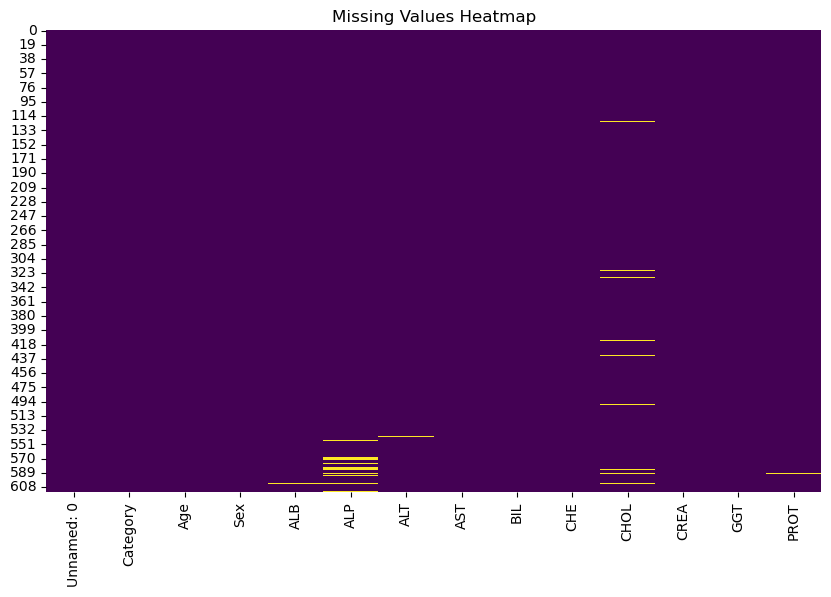

In [65]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('hcvdat0.csv')

# Define a mapping for the Category column
label_mapping = {
    '0=Blood Donor': '0=Blood Donor',
    '0s=suspect Blood Donor': '1=suspect Blood Donor',
    '1=Hepatitis': '2=Hepatitis',
    '2=Fibrosis': '3=Fibrosis',
    '3=Cirrhosis': '4=Cirrhosis'
}

# Apply the mapping to the Category column
df['Category'] = df['Category'].map(label_mapping)

# Verify the transformation
print(df['Category'].unique())

#display the first few rows of the table
print(df.head())

# Check for non-standard missing value representations ('NA', '?')
print("Occurrences of 'NA':")
print((df == 'NA').sum())

print("Occurrences of '?':")
print((df == '?').sum())

# Replace non-standard representations with NaN
df.replace(['NA', '?'], np.nan, inplace=True)

# Count missing values per column
missing_values_count = df.isnull().sum()
print("Missing values per column:")
print(missing_values_count)

# Visualize missing data
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [47]:
# read the data
import pandas as pd
import numpy  as np
from sklearn.model_selection import train_test_split

# drop the ID
df.drop(columns=['Unnamed: 0'],inplace=True)

# the target variable
y = df['Category']
# df.drop(columns=['Category'],inplace=True)
# the unprocessed feature matrix
X = df
print(X.shape)
# the feature names
ftrs = df.columns
print(df.head())

(615, 13)
        Category  Age Sex   ALB   ALP   ALT   AST   BIL    CHE  CHOL   CREA  \
0  0=Blood Donor   32   m  38.5  52.5   7.7  22.1   7.5   6.93  3.23  106.0   
1  0=Blood Donor   32   m  38.5  70.3  18.0  24.7   3.9  11.17  4.80   74.0   
2  0=Blood Donor   32   m  46.9  74.7  36.2  52.6   6.1   8.84  5.20   86.0   
3  0=Blood Donor   32   m  43.2  52.0  30.6  22.6  18.9   7.33  4.74   80.0   
4  0=Blood Donor   32   m  39.2  74.1  32.6  24.8   9.6   9.15  4.32   76.0   

    GGT  PROT  
0  12.1  69.0  
1  15.6  76.5  
2  33.2  79.3  
3  33.8  75.7  
4  29.9  68.7  


In [66]:
print(df['Category'].unique())

['0=Blood Donor' '1=suspect Blood Donor' '2=Hepatitis' '3=Fibrosis'
 '4=Cirrhosis']


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('hcvdat0.csv')

# Define a mapping for the Category column
label_mapping = {
    '0=Blood Donor': '0=Blood Donor',
    '0s=suspect Blood Donor': '1=suspect Blood Donor',
    '1=Hepatitis': '2=Hepatitis',
    '2=Fibrosis': '3=Fibrosis',
    '3=Cirrhosis': '4=Cirrhosis'
}

# Apply the mapping to the Category column
df['Category'] = df['Category'].map(label_mapping)

# Verify the transformation
print(df['Category'].unique())

# # Proceed with splitting and preprocessing
# from sklearn.model_selection import train_test_split

# X = df.drop(columns=['Category'])  # Features
# y = df['Category']  # Target labels

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


['0=Blood Donor' '1=suspect Blood Donor' '2=Hepatitis' '3=Fibrosis'
 '4=Cirrhosis']


In [48]:
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (615, 13)
fraction of missing values in features:
ALB     0.001626
ALP     0.029268
ALT     0.001626
CHOL    0.016260
PROT    0.001626
dtype: float64
data types of the features with missing values:
ALB     float64
ALP     float64
ALT     float64
CHOL    float64
PROT    float64
dtype: object
fraction of points with missing values: 0.04227642276422764


In [49]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(X_train_prep.shape)
print(X_val_prep.shape)
print(X_test_prep.shape)
# print(y_test.shape)

(369, 12)
(123, 12)
(123, 12)
(369, 13)
(123, 13)
(123, 13)


In [50]:
# collect the various features
cat_ftrs = ['Sex']
ordinal_ftrs = []
ordinal_cats = []
num_ftrs = ['Age','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']

In [51]:
# preprocess with pipeline and columntransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

random_state = 42

# one-hot encoder
# We need to replace the NaN with a string first!
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

# ordinal encoder
# We need to replace the NaN with a string first!
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='constant',fill_value='NA')),
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

# standard scaler
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_ftrs),
        ('cat', categorical_transformer, cat_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

In [52]:
# fit_transform the training set
X_prep = preprocessor.fit_transform(X_train)
# the feature names after fit
feature_names = preprocessor.get_feature_names_out()

# you can convert the numpy array back to a data frame with the feature names if you want
df_train = pd.DataFrame(data=X_prep,columns=feature_names)
print(df_train.shape)

# transform the CV
df_val = preprocessor.transform(X_val)
df_val = pd.DataFrame(data=df_val,columns = feature_names)
print(df_val.shape)

# transform the test
df_test = preprocessor.transform(X_test)
df_test = pd.DataFrame(data=df_test,columns = feature_names)
print(df_test.shape)
print(feature_names)

(369, 13)
(123, 13)
(123, 13)
['num__Age' 'num__ALB' 'num__ALP' 'num__ALT' 'num__AST' 'num__BIL'
 'num__CHE' 'num__CHOL' 'num__CREA' 'num__GGT' 'num__PROT' 'cat__Sex_f'
 'cat__Sex_m']


In [53]:
print('data dimensions:',df_train.shape)
perc_missing_per_ftr = df_train.isnull().sum(axis=0)/df_train.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df_train[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df_train.isnull().sum(axis=1)!=0)/df_train.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (369, 13)
fraction of missing values in features:
num__ALP     0.02981
num__ALT     0.00271
num__CHOL    0.01355
dtype: float64
data types of the features with missing values:
num__ALP     float64
num__ALT     float64
num__CHOL    float64
dtype: object
fraction of points with missing values: 0.04336043360433604


In [54]:
# from sklearn.preprocessing import LabelEncoder
# import xgboost as xgb
# from sklearn.metrics import classification_report, fbeta_score, confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# # Assuming df is your DataFrame and 'Category' is your target variable

# # Step 1: Label encode the target variable (y)
# label_encoder = LabelEncoder()
# df['Category_encoded'] = label_encoder.fit_transform(df['Category'])

# # Now df['Category_encoded'] will contain numeric values like [0, 1, 2, 3, 4] instead of strings

# # Step 2: Split features (X) and target (y)
# X = df.drop(columns=['Category', 'Category_encoded'])  # Features (all columns except target)
# y = df['Category_encoded']  # Target variable (encoded as numbers)

# # Step 3: Split the data into training and testing sets
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Step 4: Train an XGBoost model
# xgb_model = xgb.XGBClassifier(random_state=42)
# xgb_model.fit(X_train, y_train)

# # Step 5: Make predictions and evaluate the model
# y_pred = xgb_model.predict(X_test)

# # Print classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Calculate F2 score (for each class and overall)
# f2_score_macro = fbeta_score(y_test, y_pred, beta=2, average='macro')  
# f2_score_weighted = fbeta_score(y_test, y_pred, beta=2, average='weighted')
# f2_score_micro = fbeta_score(y_test,y_pred,beta=2,average = 'micro')

# print(f"F2 Score (Macro Average): {f2_score_macro}")
# print(f"F2 Score (Weighted Average): {f2_score_weighted}")
# print(f"F2 Score (Micro Average): {f2_score_micro}")

# # Step 6: Generate and plot confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
# disp.plot(cmap=plt.cm.Blues)
# plt.title('Confusion Matrix for XGBoost Classifier')
# plt.show()


In [55]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


# # Assuming df is your DataFrame
# # Separate features and target
# X = df.drop('Category', axis=1)
# y = df['Category']

# Encode the target variable
le = LabelEncoder()
y = le.fit_transform(y)
# print(y.shape)
print(y)
y_test = le.transform(y_test)
# collect which encoder to use on each feature
# needs to be done manually
ordinal_ftrs = [] 
ordinal_cats = []
onehot_ftrs = ['Sex']
minmax_ftrs = ['Age']
std_ftrs = ['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']

# collect all the encoders
preprocessor = ColumnTransformer(
    transformers=[
        ('ord', OrdinalEncoder(categories = ordinal_cats), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs),
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('std', StandardScaler(), std_ftrs)])

clf = Pipeline(steps=[('preprocessor', preprocessor)]) # for now we only preprocess 
                                                       # later on we will add other steps here

X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

print(X_train.shape)
print(X_train_prep.shape)
print(X_train_prep)
print(X_val_prep)
print(X_test_prep)
# print(y_test.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

### Attempt at Linear and Nonlinear Regression

In [56]:
# # your code here
# from sklearn.datasets import make_regression
# from sklearn.feature_selection import SelectKBest,f_regression

# feature_names = preprocessor.get_feature_names_out()
# X_train_prep_df = pd.DataFrame(
#     data = X_train_prep,
#     columns = feature_names
# )

# # X_train_prep
# f_statistic, p_values = f_regression(X_train_prep, y_train)
# # np.argsort(X_train_prep)
# # np.argsort(y_train)
# feature_importance = pd.DataFrame({
#     'Feature': feature_names,
#     'Importance': f_statistic
# })
# print(feature_names)
# top5features = feature_importance.nlargest(5, 'Importance'
# )

# sorted_indices = np.argsort(f_statistic)[::-1]
# sorted_top5 = sorted_indices[0:5]
# print(sorted_indices)
# print(sorted_top5)

# f_corr = f_statistic[sorted_indices[0:5]], feature_names[sorted_indices[0:5]]
# print(f_corr)

# # print(selected_feature_names)
# print(f_statistic)
# print(p_values)
# print(feature_names)

### Drop Missing Values Rows and Columns

**1. Drop the columns with missing values:**

In [57]:
# import pandas as pd
# import numpy as np

# #read in txt file using pandas read_csv function with a tab delimiter

# #print the shape of the original dataset
# print(df.shape)

# #replace the ? with NaN so that dropna() method can locate nulls
# # df = df.replace('?',np.NaN)
# # drop features with missing values
# df_c = df.dropna(axis=1)
# print(df_c.shape)
# df_c.head()

**2. Drop the rows with missing values:**

In [58]:
# #print the shape of the original dataset
# print(df.shape)
# # by default, rows/points are dropped
# df_r = df.dropna()
# print(df_r.shape)
# df_r.head()

## Step 4: Choose an Evaluation Metric

For this model, I have chosen to optimize for false negatives, since I have decided that missing a diagnosis for a patient that has hepatitis is greater than the cost associated with running extra tests and procedures. However, I do not want to completely ignore the costs associated with false positives, so I have decided that opting for an $f_2$ score serves as a way to weight recall more heavily, while not entirely discarding precision in my analysis. The dataset is also imbalanced, so a metric like accuracy does not make much sense.

In [59]:
# print(y)
print(y_test)
print(y_test.shape)
# y.value_counts()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0
 0 4 0 0 0 0 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 3 0 0 0
 0 0 0 0 3 0 0 0 0 0 0 3 4 0 0 0 3 0 0 0 0 0 0 0 0 0 4 2 0 4 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0]
(123,)


In [60]:
from sklearn.metrics import fbeta_score
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Sample target data (replace with your actual data)
# y_test = np.array(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '3=Cirrhosis', '2=Fibrosis'])
# y_test = y

# # Encode target variable
# label_encoder = LabelEncoder()
# y_test_encoded = label_encoder.fit_transform(y_test)
# print(y_test_encoded)

# Find the majority class
majority_class = np.argmax(np.bincount(y_test))
baseline_predictions = np.full_like(y_test, fill_value=majority_class)

from sklearn.metrics import fbeta_score

# Calculate F2 score for baseline using macro averaging
f2_baseline_macro = fbeta_score(y_test, baseline_predictions, beta=2, average='macro')
print(f"Baseline F2 Score (Macro): {f2_baseline_macro}")

# Calculate F2 score for baseline using micro averaging
f2_baseline_micro = fbeta_score(y_test, baseline_predictions, beta=2, average='micro')
print(f"Baseline F2 Score (Micro): {f2_baseline_micro}")

# Calculate F2 score for baseline using weighted averaging
f2_baseline_weighted = fbeta_score(y_test, baseline_predictions, beta=2, average='weighted')
print(f"Baseline F2 Score (Weighted): {f2_baseline_weighted}")

Baseline F2 Score (Macro): 0.19419237749546278
Baseline F2 Score (Micro): 0.8699186991869918
Baseline F2 Score (Weighted): 0.8446579021144113


## Step 5: Choose one or more ML Techniques

In [61]:
print(df.columns)


Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')


### Random Forest Classifier

In [62]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, fbeta_score

# # Assuming X_train_prep, X_test_prep, y_train, y_test are already prepared

# # Train a RandomForestClassifier using preprocessed data
# model = RandomForestClassifier(random_state=42)

# # Fit the model on preprocessed training data
# model.fit(X_train_prep, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test_prep)

# # Evaluate the model using classification report (which includes F1-score)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Calculate F2 score (for each class and overall)
# f2_score_macro = fbeta_score(y_test, y_pred, beta=2, average='macro')  # Macro-average across all classes
# f2_score_weighted = fbeta_score(y_test, y_pred, beta=2, average='weighted')  # Weighted-average based on class support
# f2_score_micro = fbeta_score(y_test,y_pred,beta=2,average = 'micro' ) # Micro-average

# print(f"F2 Score (Macro Average): {f2_score_macro}")
# print(f"F2 Score (Weighted Average): {f2_score_weighted}")
# print(f"F2 Score (Micro Average): {f2_score_micro}")





In [63]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, fbeta_score, confusion_matrix, ConfusionMatrixDisplay
# from sklearn.preprocessing import LabelEncoder
# import matplotlib.pyplot as plt

# # Assuming X_train_prep, X_test_prep, y_train, y_test are already prepared

# # Encode target variable
# label_encoder = LabelEncoder()
# y_train_encoded = label_encoder.fit_transform(y_train)
# y_test_encoded = label_encoder.transform(y_test)

# # Train a RandomForestClassifier using preprocessed data
# model = RandomForestClassifier(random_state=42)

# # Fit the model on preprocessed training data
# model.fit(X_train_prep, y_train_encoded)

# # Make predictions on the test set
# y_pred_encoded = model.predict(X_test_prep)

# # Decode predictions back to original labels
# y_pred = label_encoder.inverse_transform(y_pred_encoded)

# # Evaluate the model using classification report (which includes F1-score)
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Calculate F2 score (for each class and overall)
# f2_score_macro = fbeta_score(y_test_encoded, y_pred_encoded, beta=2, average='macro')
# f2_score_weighted = fbeta_score(y_test_encoded, y_pred_encoded, beta=2, average='weighted')
# f2_score_micro = fbeta_score(y_test_encoded, y_pred_encoded, beta=2, average='micro')

# print(f"F2 Score (Macro Average): {f2_score_macro}")
# print(f"F2 Score (Weighted Average): {f2_score_weighted}")
# print(f"F2 Score (Micro Average): {f2_score_micro}")

# # Generate the confusion matrix
# cm = confusion_matrix(y_test_encoded, y_pred_encoded)

# # Plot the confusion matrix
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
# disp.plot(cmap=plt.cm.Blues)

# # Display the plot
# plt.title('Confusion Matrix for Random Forest Classifier')
# plt.xticks(rotation=45, ha='right')
# plt.show()


In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, fbeta_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming X_train_prep, X_test_prep, y_train, y_test are already prepared

# Train a RandomForestClassifier using preprocessed data
model = RandomForestClassifier(random_state=42)

# Fit the model on preprocessed training data
model.fit(X_train_prep, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_prep)

# Decode predictions back to original labels
y_pred = le.inverse_transform(y_pred)

# Evaluate the model using classification report (which includes F1-score)
print("Classification Report:")
print(y_test.shape, y_pred.shape)
print(classification_report(y_test, y_pred))

# Calculate F2 score (for each class and overall)
f2_score_macro = fbeta_score(y_test, y_pred, beta=2, average='macro')  # Macro-average across all classes
f2_score_weighted = fbeta_score(y_test, y_pred, beta=2, average='weighted')  # Weighted-average based on class support
f2_score_micro = fbeta_score(y_test,y_pred,beta=2,average = 'micro' ) # Micro-average

print(f"F2 Score (Macro Average): {f2_score_macro}")
print(f"F2 Score (Weighted Average): {f2_score_weighted}")
print(f"F2 Score (Micro Average): {f2_score_micro}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)

# Display the plot
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xticks(rotation=45, ha='right')
plt.show()


ValueError: y contains previously unseen labels: ['0=Blood Donor' '2=Hepatitis' '3=Fibrosis' '4=Cirrhosis']

### XGBoost

#### Missing Columns

In [ ]:
print(df.columns)


Index(['Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE',
       'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')


In [ ]:
import pandas as pd

# Check for missing values in the dataset
print(df.isnull())


     Category    Age    Sex    ALB    ALP    ALT    AST    BIL    CHE   CHOL  \
0       False  False  False  False  False  False  False  False  False  False   
1       False  False  False  False  False  False  False  False  False  False   
2       False  False  False  False  False  False  False  False  False  False   
3       False  False  False  False  False  False  False  False  False  False   
4       False  False  False  False  False  False  False  False  False  False   
..        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
610     False  False  False  False  False  False  False  False  False  False   
611     False  False  False  False  False  False  False  False  False  False   
612     False  False  False  False  False  False  False  False  False  False   
613     False  False  False  False   True  False  False  False  False  False   
614     False  False  False  False   True  False  False  False  False  False   

      CREA    GGT   PROT  
0    False  

In [ ]:
# Count missing values in each column
missing_values_count = df.isnull().sum()
print(missing_values_count)


Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64


In [ ]:
# Check unique values for each column
for col in df.columns:
    print(f"Unique values in {col}: {df[col].unique()}")


Unique values in Category: ['0=Blood Donor' '0s=suspect Blood Donor' '1=Hepatitis' '2=Fibrosis'
 '3=Cirrhosis']
Unique values in Age: [32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55
 56 57 58 59 60 61 62 63 64 65 66 67 68 70 71 76 77 74 19 23 25 27 29 30
 75]
Unique values in Sex: ['m' 'f']
Unique values in ALB: [38.5 46.9 43.2 39.2 41.6 46.3 42.2 50.9 42.4 44.3 46.4 36.3 39.  38.7
 41.8 40.9 45.2 36.6 42.  46.7 42.7 43.4 40.5 44.8 42.6 29.  44.6 46.8
 46.1 43.6 37.5 42.1 44.7 41.5 48.7 47.3 44.5 47.4 51.  27.8 45.5 41.7
 45.9 53.  47.8 48.9 31.4 42.9 44.  47.9 38.6 51.2 41.9 50.4 33.9 40.8
 48.1 39.9 41.2 48.4 38.3 45.1 38.8 47.  43.9 36.  45.7 45.8 41.4 45.
 39.1 45.4 42.3 40.2 53.3 37.4 45.3 44.1 37.8 38.1 46.2 37.  39.7 54.4
 48.6 39.4 42.8 44.4 38.4 35.5 46.5 36.2 40.3 35.7 37.9 47.7 49.1 43.
 49.7 37.3 51.8 49.5 48.  48.3 36.7 55.4 42.5 38.2 43.1 46.  40.  46.6
 43.5 43.8 38.  36.8 47.2 50.8 82.2 39.3 37.2 40.7 41.  49.  49.2 47.6
 28.1 59.7 43.3 41.3 39.

In [ ]:
# Check for 'NA' or '?' in the dataset
print((df == 'NA').sum())  # Count occurrences of 'NA'
print((df == '?').sum())   # Count occurrences of '?'


Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64
Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64


In [ ]:
import pandas as pd
import numpy as np

# Replace 'NA' with np.nan in the entire DataFrame
df.replace('NA', np.nan, inplace=True)

# Alternatively, if specific columns have 'NA' as missing values:
# df['ColumnName'] = df['ColumnName'].replace('NA', np.nan)


In [ ]:
print(df.isnull().sum())  # Check the number of missing values in each column


Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64


In [ ]:
print("X_train_prep shape:", X_train_prep.shape)
print("y_train shape:", y_train.shape)


X_train_prep shape: (369, 13)
y_train shape: (369,)


In [ ]:
# from sklearn.preprocessing import LabelEncoder
# # Create a LabelEncoder object
# le = LabelEncoder()

# # Fit the encoder on the target variable and transform it
# y_encoded = le.fit_transform(y)

# # Split the data into train and test sets using the encoded target
# X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# # Proceed with your preprocessing steps for X_train and X_test


In [ ]:
print(X.shape)
print(y.shape)


(615, 13)
(615,)


#### XGBoost

Classification Report:
                        precision    recall  f1-score   support

         0=Blood Donor       0.98      1.00      0.99       107
0s=suspect Blood Donor       0.00      0.00      0.00         1
           1=Hepatitis       1.00      0.40      0.57         5
            2=Fibrosis       0.57      1.00      0.73         4
           3=Cirrhosis       1.00      0.83      0.91         6

              accuracy                           0.96       123
             macro avg       0.71      0.65      0.64       123
          weighted avg       0.96      0.96      0.95       123

F2 Score (Macro Average): 0.6364910485336306
F2 Score (Weighted Average): 0.9554869243358558
F2 Score (Micro Average): 0.959349593495935


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

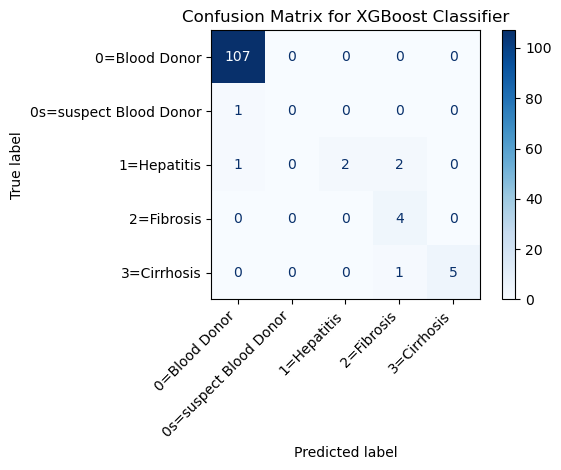

In [ ]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, fbeta_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder on the target variable and transform it
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)
# Train XGBoost model using preprocessed data
model = XGBClassifier(
    objective='multi:softmax',
    num_class=5,  # Number of classes in your target variable
    random_state=42
)

# Fit the model on preprocessed training data with encoded labels
model.fit(X_train_prep, y_train_encoded)

# Make predictions on the test set
y_pred_encoded = model.predict(X_test_prep)

# Convert predictions back to original labels
y_pred = le.inverse_transform(y_pred_encoded)
# Evaluate the model using classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate F2 scores
f2_score_macro = fbeta_score(y_test, y_pred, beta=2, average='macro')
f2_score_weighted = fbeta_score(y_test, y_pred, beta=2, average='weighted')
f2_score_micro = fbeta_score(y_test, y_pred, beta=2, average='micro')

print(f"F2 Score (Macro Average): {f2_score_macro}")
print(f"F2 Score (Weighted Average): {f2_score_weighted}")
print(f"F2 Score (Micro Average): {f2_score_micro}")

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


#### Code that works!

In [ ]:
# import pandas as pd
# import xgboost as xgb
# from sklearn.preprocessing import LabelEncoder
# from xgboost import XGBClassifier
# from sklearn.metrics import classification_report, fbeta_score, confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt
# import numpy as np

# # Read the data
# df = pd.read_csv('hcvdat0.csv')

# # Create label encoder
# le = LabelEncoder()

# # Create features (X) and target (y)
# X = df.drop(['Unnamed: 0', 'Category'], axis=1)
# y = le.fit_transform(df['Category'])  # Transform string labels to numbers

# # Convert Sex to category
# X['Sex'] = X['Sex'].astype('category')

# # Create model with categorical support
# model = XGBClassifier(enable_categorical=True)
# model.fit(X, y)

# # import xgboost as xgb
# # from sklearn.preprocessing import LabelEncoder
# # from sklearn.metrics import classification_report, fbeta_score, confusion_matrix, ConfusionMatrixDisplay
# # import matplotlib.pyplot as plt
# # import numpy as np

# # First, encode the categorical variables
# # le = LabelEncoder()
# # y = le.fit_transform(df['Category'])

# # Create features (X) by dropping unnecessary columns
# # X = df.drop(['Unnamed: 0', 'Category'], axis=1)

# # Convert Sex to numeric
# X['Sex'] = (X['Sex'] == 'm').astype(int)

# # Convert to numpy arrays
# X = X.to_numpy()
# y = y.astype(np.int32)

# # Split the data
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train XGBoost model
# xgb_model = xgb.XGBClassifier(random_state=42)
# xgb_model.fit(X_train, y_train)

# # Make predictions
# y_pred = xgb_model.predict(X_test)

# # Evaluate the model
# print("Classification Report:")
# print(classification_report(y_test, y_pred, target_names=le.classes_))

# # Calculate F2 scores
# f2_score_macro = fbeta_score(y_test, y_pred, beta=2, average='macro')
# f2_score_weighted = fbeta_score(y_test, y_pred, beta=2, average='weighted')
# f2_score_micro = fbeta_score(y_test, y_pred, beta=2, average='micro')

# print(f"\nF2 Score (Macro Average): {f2_score_macro:.3f}")
# print(f"F2 Score (Weighted Average): {f2_score_weighted:.3f}")
# print(f"F2 Score (Micro Average): {f2_score_micro:.3f}")

# # Plot confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
# disp.plot(cmap=plt.cm.Blues)
# plt.title('Confusion Matrix for XGBoost Classifier')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

In [ ]:
# import pandas as pd
# import numpy as np
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import classification_report, fbeta_score, confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# # Read the data
# df = pd.read_csv('hcvdat0.csv', index_col=0)

# # Prepare features and target
# X = df.drop('Category', axis=1)
# y = df['Category']

# # Encode categorical variables
# le = LabelEncoder()
# y = le.fit_transform(y)  # Transform target labels to numbers
# X['Sex'] = (X['Sex'] == 'm').astype(int)  # Convert Sex to binary

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Create and train XGBoost model
# model = XGBClassifier(
#     objective='multi:softmax',
#     num_class=len(le.classes_),
#     random_state=42
# )
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Print classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred, target_names=le.classes_))

# # Calculate F2 scores
# f2_score_macro = fbeta_score(y_test, y_pred, beta=2, average='macro')
# f2_score_weighted = fbeta_score(y_test, y_pred, beta=2, average='weighted')
# f2_score_micro = fbeta_score(y_test, y_pred, beta=2, average='micro')

# print(f"\nF2 Score (Macro Average): {f2_score_macro:.3f}")
# print(f"F2 Score (Weighted Average): {f2_score_weighted:.3f}")
# print(f"F2 Score (Micro Average): {f2_score_micro:.3f}")

# # Generate and plot confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
# disp.plot(cmap=plt.cm.Blues)
# plt.title('Confusion Matrix for XGBoost Classifier')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()


In [ ]:
# import pandas as pd
# import xgboost as xgb
# from sklearn.preprocessing import LabelEncoder

# # Read and preprocess the data
# df = pd.read_csv('hcvdat0.csv')

# # Create label encoders for categorical columns
# le_category = LabelEncoder()
# le_sex = LabelEncoder()

# # Encode categorical columns
# df['Category'] = le_category.fit_transform(df['Category'])
# df['Sex'] = le_sex.fit_transform(df['Sex'])

# # Separate features and target
# X = df.drop(['Unnamed: 0'], axis=1)  # Remove index column
# y = X.pop('Category')  # Extract target variable

# # Create DMatrix with categorical features enabled
# dtrain = xgb.DMatrix(X, label=y, enable_categorical=True)


In [ ]:
# import xgboost as xgb
# import pandas as pd

# # Convert categorical columns to category dtype
# X['Category'] = X['Category'].astype('category')
# X['Sex'] = X['Sex'].astype('category')

# # Create DMatrix with categorical features enabled
# dtrain = xgb.DMatrix(X, label=y, enable_categorical=True)


In [ ]:
# from xgboost import XGBClassifier

# # Convert categorical columns
# X['Category'] = X['Category'].astype('category')
# X['Sex'] = X['Sex'].astype('category')

# # Create model with categorical support
# model = XGBClassifier(enable_categorical=True)
# model.fit(X, y)


In [ ]:
# import xgboost as xgb
# dtrain = xgb.DMatrix(X, label=y)



In [ ]:
# import xgboost as xgb
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import classification_report, fbeta_score, confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt
# import numpy as np

# # First, encode the categorical variables
# le = LabelEncoder()
# y = le.fit_transform(df['Category'])

# # Create features (X) by dropping unnecessary columns
# X = df.drop(['Unnamed: 0', 'Category'], axis=1)

# # Convert Sex to numeric
# X['Sex'] = (X['Sex'] == 'm').astype(int)

# # Convert to numpy arrays
# X = X.to_numpy()
# y = y.astype(np.int32)

# # Split the data
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train XGBoost model
# xgb_model = xgb.XGBClassifier(random_state=42)
# xgb_model.fit(X_train, y_train)

# # Make predictions
# y_pred = xgb_model.predict(X_test)

# # Evaluate the model
# print("Classification Report:")
# print(classification_report(y_test, y_pred, target_names=le.classes_))

# # Calculate F2 scores
# f2_score_macro = fbeta_score(y_test, y_pred, beta=2, average='macro')
# f2_score_weighted = fbeta_score(y_test, y_pred, beta=2, average='weighted')
# f2_score_micro = fbeta_score(y_test, y_pred, beta=2, average='micro')

# print(f"\nF2 Score (Macro Average): {f2_score_macro:.3f}")
# print(f"F2 Score (Weighted Average): {f2_score_weighted:.3f}")
# print(f"F2 Score (Micro Average): {f2_score_micro:.3f}")

# # Plot confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
# disp.plot(cmap=plt.cm.Blues)
# plt.title('Confusion Matrix for XGBoost Classifier')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()


In [ ]:
# import xgboost as xgb
# from sklearn.metrics import classification_report, fbeta_score, confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt

# # Assuming X_train_prep, X_test_prep, y_train, y_test are already prepared

# # Train an XGBoost Classifier using preprocessed data
# xgb_model = xgb.XGBClassifier(random_state=42)

# # Fit the model on preprocessed training data
# xgb_model.fit(X_train_prep, y_train)

# # Make predictions on the test set
# y_pred = xgb_model.predict(X_test_prep)

# # Evaluate the model using classification report
# print("Classification Report:")
# print(classification_report(y_test, y_pred))

# # Calculate F2 score (for each class and overall)
# f2_score_macro = fbeta_score(y_test, y_pred, beta=2, average='macro')  # Macro-average across all classes
# f2_score_weighted = fbeta_score(y_test, y_pred, beta=2, average='weighted')  # Weighted-average based on class support
# f2_score_micro = fbeta_score(y_test, y_pred, beta=2, average='micro')  # Micro-average

# print(f"F2 Score (Macro Average): {f2_score_macro}")
# print(f"F2 Score (Weighted Average): {f2_score_weighted}")
# print(f"F2 Score (Micro Average): {f2_score_micro}")

# # Generate and plot confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
# disp.plot(cmap=plt.cm.Blues)
# plt.title('Confusion Matrix for XGBoost Classifier')
# plt.show()


### Reduced Features Model Logistic Regression

In [ ]:
# Example subsets of features without missing values
subset_1 = ['ALB', 'ALP', 'ALT']  # Example subset 1
subset_2 = ['AST', 'BIL', 'CHE']  # Example subset 2

# Filter rows with no missing values for each subset
df_subset_1 = df[subset_1 + ['Category']].dropna()
df_subset_2 = df[subset_2 + ['Category']].dropna()

# Prepare features (X) and target (y) for each subset
X1 = df_subset_1.drop(columns=['Category'])
y1 = df_subset_1['Category']

X2 = df_subset_2.drop(columns=['Category'])
y2 = df_subset_2['Category']


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode target variable
label_encoder_1 = LabelEncoder()
y1_encoded = label_encoder_1.fit_transform(y1)

label_encoder_2 = LabelEncoder()
y2_encoded = label_encoder_2.fit_transform(y2)

# Scale features
scaler_1 = StandardScaler()
X1_scaled = scaler_1.fit_transform(X1)

scaler_2 = StandardScaler()
X2_scaled = scaler_2.fit_transform(X2)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Train models on each subset
model_1 = LogisticRegression(random_state=42, max_iter=1000)
model_1.fit(X1_scaled, y1_encoded)

model_2 = LogisticRegression(random_state=42, max_iter=1000)
model_2.fit(X2_scaled, y2_encoded)


LogisticRegression(max_iter=1000, random_state=42)

Subset 1 Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       533
           1       1.00      0.86      0.92         7
           2       0.50      0.05      0.09        20
           3       0.00      0.00      0.00        12
           4       0.93      0.58      0.72        24

    accuracy                           0.93       596
   macro avg       0.67      0.50      0.54       596
weighted avg       0.90      0.93      0.91       596

Subset 1 F2 Score (Macro): 0.5119072209280244
Subset 1 F2 Score (Weighted): 0.919200701205524


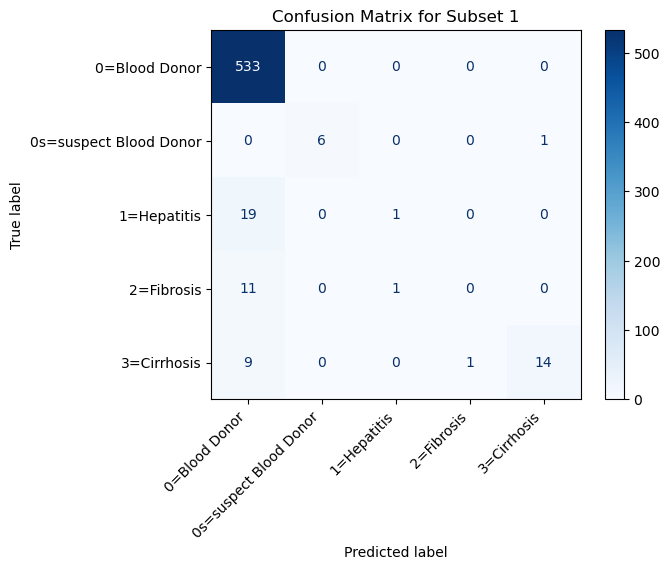

Subset 2 Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       533
           1       0.00      0.00      0.00         7
           2       0.27      0.17      0.21        24
           3       0.40      0.10      0.15        21
           4       0.82      0.77      0.79        30

    accuracy                           0.91       615
   macro avg       0.48      0.40      0.42       615
weighted avg       0.88      0.91      0.89       615

Subset 2 F2 Score (Macro): 0.4106528847142307
Subset 2 F2 Score (Weighted): 0.9013098236902087


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

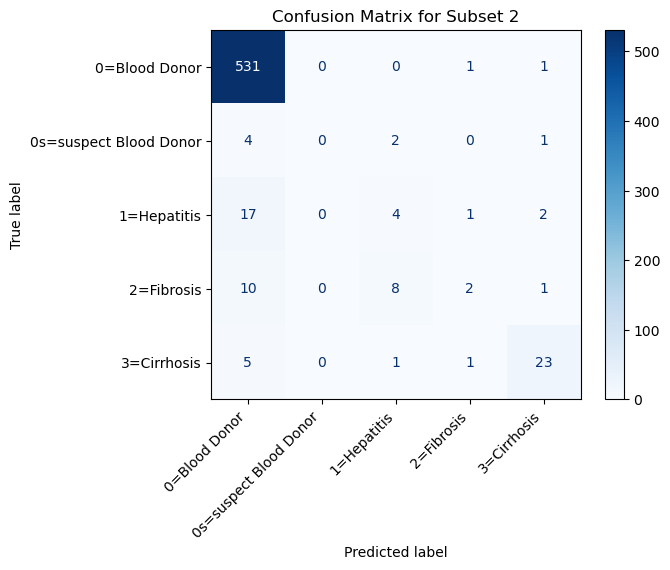

In [ ]:
from sklearn.metrics import classification_report, fbeta_score, confusion_matrix, ConfusionMatrixDisplay

# Evaluate Model 1
y_pred_1 = model_1.predict(X1_scaled)
print("Subset 1 Classification Report:")
print(classification_report(y1_encoded, y_pred_1))

f2_macro_1 = fbeta_score(y1_encoded, y_pred_1, beta=2, average='macro')
f2_weighted_1 = fbeta_score(y1_encoded, y_pred_1, beta=2, average='weighted')
print(f"Subset 1 F2 Score (Macro): {f2_macro_1}")
print(f"Subset 1 F2 Score (Weighted): {f2_weighted_1}")

cm_1 = confusion_matrix(y1_encoded, y_pred_1)
disp_cm_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=label_encoder_1.classes_)
disp_cm_1.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 1')
plt.xticks(rotation=45, ha='right')
plt.show()

# Evaluate Model 2
y_pred_2 = model_2.predict(X2_scaled)
print("Subset 2 Classification Report:")
print(classification_report(y2_encoded, y_pred_2))

f2_macro_2 = fbeta_score(y2_encoded, y_pred_2, beta=2, average='macro')
f2_weighted_2 = fbeta_score(y2_encoded, y_pred_2, beta=2, average='weighted')
print(f"Subset 2 F2 Score (Macro): {f2_macro_2}")
print(f"Subset 2 F2 Score (Weighted): {f2_weighted_2}")

cm_2 = confusion_matrix(y2_encoded, y_pred_2)
disp_cm_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=label_encoder_2.classes_)
disp_cm_2.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 2')
plt.xticks(rotation=45, ha='right')
plt.show()


Subset 1 Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       533
           1       1.00      0.29      0.44         7
           2       0.50      0.25      0.33        24
           3       0.50      0.29      0.36        21
           4       0.86      0.80      0.83        30

    accuracy                           0.93       615
   macro avg       0.76      0.52      0.59       615
weighted avg       0.91      0.93      0.91       615

Subset 1 F2 Score (Macro): 0.544062252932472
Subset 1 F2 Score (Weighted): 0.9192940552926471


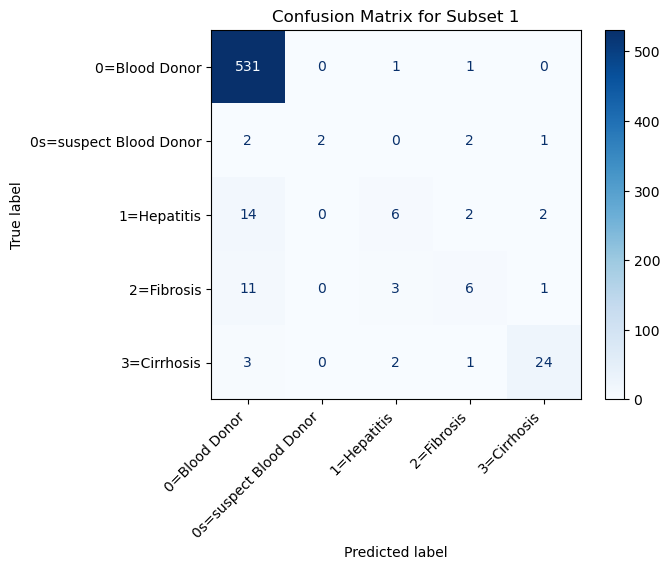

Subset 2 Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       533
           1       0.75      0.86      0.80         7
           2       0.00      0.00      0.00        23
           3       0.50      0.10      0.16        21
           4       0.78      0.25      0.38        28

    accuracy                           0.89       612
   macro avg       0.58      0.44      0.46       612
weighted avg       0.84      0.89      0.85       612

Subset 2 F2 Score (Macro): 0.4418834456810619
Subset 2 F2 Score (Weighted): 0.8742317827771067


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

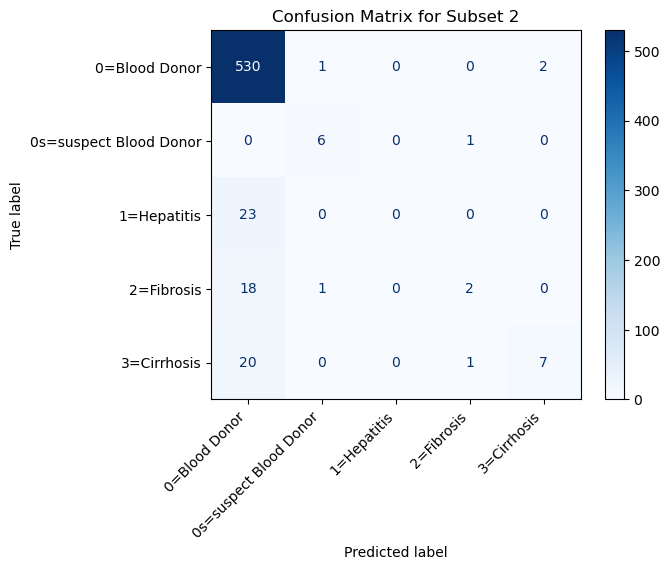

Subset 3 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       526
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        21
           3       0.01      0.50      0.03        12
           4       0.12      0.83      0.21        24

    accuracy                           0.04       590
   macro avg       0.03      0.27      0.05       590
weighted avg       0.01      0.04      0.01       590

Subset 2 F2 Score (Macro): 0.08878448087961056
Subset 2 F2 Score (Weighted): 0.01676238389044438


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precisio

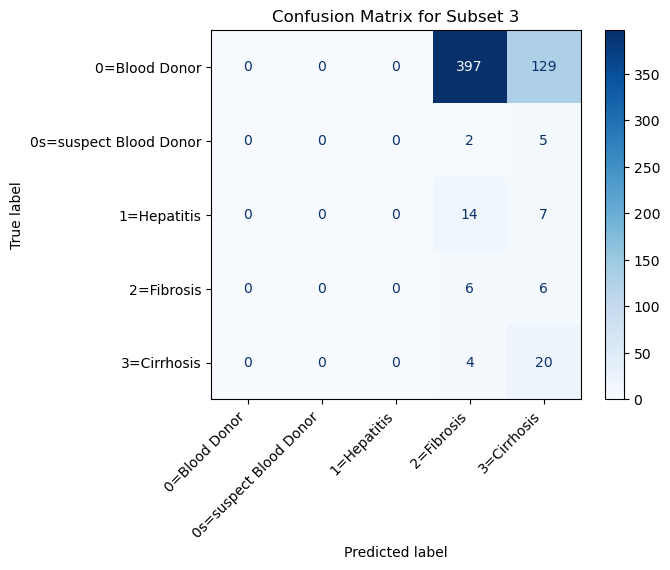

In [ ]:
# Example subsets of features without missing values
subset_1 = ['Age','AST', 'BIL', 'CHE', 'CREA', 'GGT']  # Example subset 1
subset_2 = ['ALB', 'ALT', 'PROT']  # Example subset 2
subset_3 = ['ALP', 'CHOL'] # Example subset 3

# Filter rows with no missing values for each subset
df_subset_1 = df[subset_1 + ['Category']].dropna()
df_subset_2 = df[subset_2 + ['Category']].dropna()
df_subset_3 = df[subset_3 + ['Category']].dropna()

# Prepare features (X) and target (y) for each subset
X1 = df_subset_1.drop(columns=['Category'])
y1 = df_subset_1['Category']

X2 = df_subset_2.drop(columns=['Category'])
y2 = df_subset_2['Category']

X3 = df_subset_3.drop(columns=['Category'])
y3 = df_subset_3['Category']

from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode target variable
label_encoder_1 = LabelEncoder()
y1_encoded = label_encoder_1.fit_transform(y1)

label_encoder_2 = LabelEncoder()
y2_encoded = label_encoder_2.fit_transform(y2)

label_encoder_3 = LabelEncoder()
y3_encoded = label_encoder_3.fit_transform(y3)


# Scale features
scaler_1 = StandardScaler()
X1_scaled = scaler_1.fit_transform(X1)

scaler_2 = StandardScaler()
X2_scaled = scaler_2.fit_transform(X2)

scaler_3 = StandardScaler()
X3_scaled = scaler_3.fit_transform(X3)

from sklearn.linear_model import LogisticRegression

# Train models on each subset
model_1 = LogisticRegression(random_state=42, max_iter=1000)
model_1.fit(X1_scaled, y1_encoded)

model_2 = LogisticRegression(random_state=42, max_iter=1000)
model_2.fit(X2_scaled, y2_encoded)

model_3 = LogisticRegression(random_state=42, max_iter=1000)
model_3.fit(X3, y3_encoded)

from sklearn.metrics import classification_report, fbeta_score, confusion_matrix, ConfusionMatrixDisplay

# Evaluate Model 1
y_pred_1 = model_1.predict(X1_scaled)
print("Subset 1 Classification Report:")
print(classification_report(y1_encoded, y_pred_1))

f2_macro_1 = fbeta_score(y1_encoded, y_pred_1, beta=2, average='macro')
f2_weighted_1 = fbeta_score(y1_encoded, y_pred_1, beta=2, average='weighted')
print(f"Subset 1 F2 Score (Macro): {f2_macro_1}")
print(f"Subset 1 F2 Score (Weighted): {f2_weighted_1}")

cm_1 = confusion_matrix(y1_encoded, y_pred_1)
disp_cm_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=label_encoder_1.classes_)
disp_cm_1.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 1')
plt.xticks(rotation=45, ha='right')
plt.show()

# Evaluate Model 2
y_pred_2 = model_2.predict(X2_scaled)
print("Subset 2 Classification Report:")
print(classification_report(y2_encoded, y_pred_2))

f2_macro_2 = fbeta_score(y2_encoded, y_pred_2, beta=2, average='macro')
f2_weighted_2 = fbeta_score(y2_encoded, y_pred_2, beta=2, average='weighted')
print(f"Subset 2 F2 Score (Macro): {f2_macro_2}")
print(f"Subset 2 F2 Score (Weighted): {f2_weighted_2}")

cm_2 = confusion_matrix(y2_encoded, y_pred_2)
disp_cm_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=label_encoder_2.classes_)
disp_cm_2.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 2')
plt.xticks(rotation=45, ha='right')
plt.show()

# Evaluate Model 3
y_pred_3 = model_3.predict(X3_scaled)
print("Subset 3 Classification Report:")
print(classification_report(y3_encoded, y_pred_3))

f2_macro_3 = fbeta_score(y3_encoded, y_pred_3, beta=2, average='macro')
f2_weighted_3 = fbeta_score(y3_encoded, y_pred_3, beta=2, average='weighted')
print(f"Subset 2 F2 Score (Macro): {f2_macro_3}")
print(f"Subset 2 F2 Score (Weighted): {f2_weighted_3}")

cm_3 = confusion_matrix(y3_encoded, y_pred_3)
disp_cm_3 = ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=label_encoder_3.classes_)
disp_cm_3.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 3')
plt.xticks(rotation=45, ha='right')
plt.show()

### Reduced Features Model with Support Vector Classifier

Subset 1 Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       533
           1       1.00      0.57      0.73         7
           2       0.88      0.29      0.44        24
           3       0.75      0.43      0.55        21
           4       0.96      0.87      0.91        30

    accuracy                           0.94       615
   macro avg       0.91      0.63      0.72       615
weighted avg       0.94      0.94      0.93       615

Subset 1 F2 Score (Macro): 0.6606287373429172
Subset 1 F2 Score (Weighted): 0.9360936197122081


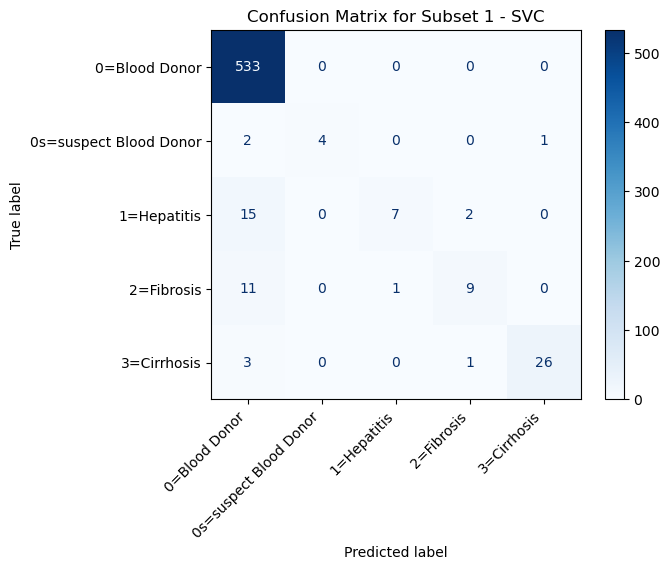

Subset 2 Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       533
           1       1.00      1.00      1.00         7
           2       0.00      0.00      0.00        23
           3       0.86      0.29      0.43        21
           4       1.00      0.43      0.60        28

    accuracy                           0.91       612
   macro avg       0.75      0.54      0.60       612
weighted avg       0.88      0.91      0.88       612

Subset 2 F2 Score (Macro): 0.5588083330659703
Subset 2 F2 Score (Weighted): 0.8988205230717723


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

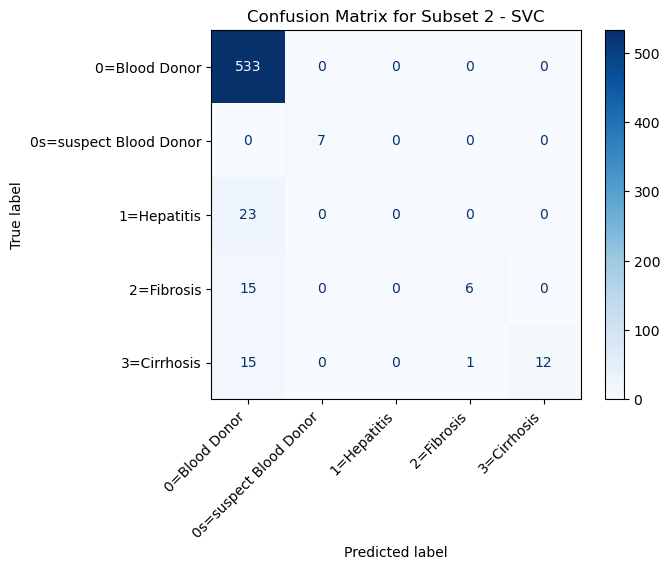

Subset 3 Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       526
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        12
           4       0.67      0.25      0.36        24

    accuracy                           0.90       590
   macro avg       0.31      0.25      0.26       590
weighted avg       0.84      0.90      0.86       590

Subset 3 F2 Score (Macro): 0.25311901213540555
Subset 3 F2 Score (Weighted): 0.8852108991314327


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

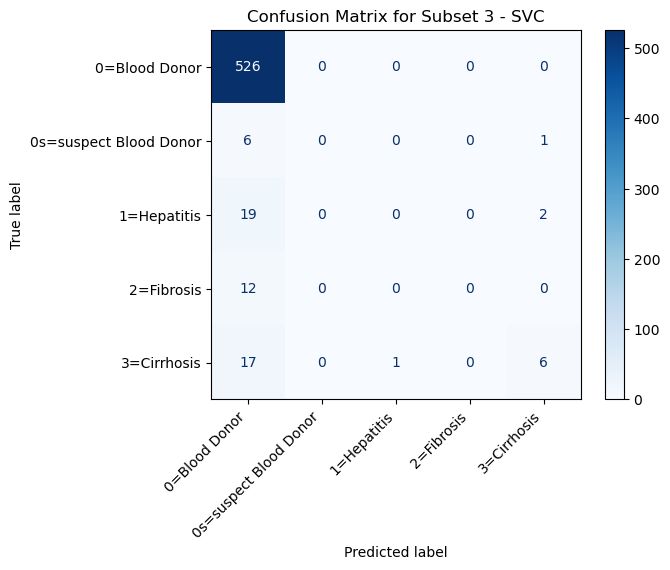

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, fbeta_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Example subsets of features without missing values
subset_1 = ['Age', 'AST', 'BIL', 'CHE', 'CREA', 'GGT']  # Example subset 1
subset_2 = ['ALB', 'ALT', 'PROT']  # Example subset 2
subset_3 = ['ALP', 'CHOL']  # Example subset 3

# Filter rows with no missing values for each subset
df_subset_1 = df[subset_1 + ['Category']].dropna()
df_subset_2 = df[subset_2 + ['Category']].dropna()
df_subset_3 = df[subset_3 + ['Category']].dropna()

# Prepare features (X) and target (y) for each subset
X1 = df_subset_1.drop(columns=['Category'])
y1 = df_subset_1['Category']

X2 = df_subset_2.drop(columns=['Category'])
y2 = df_subset_2['Category']

X3 = df_subset_3.drop(columns=['Category'])
y3 = df_subset_3['Category']

# Encode target variable for each subset
label_encoder_1 = LabelEncoder()
y1_encoded = label_encoder_1.fit_transform(y1)

label_encoder_2 = LabelEncoder()
y2_encoded = label_encoder_2.fit_transform(y2)

label_encoder_3 = LabelEncoder()
y3_encoded = label_encoder_3.fit_transform(y3)

# Scale features for each subset
scaler_1 = StandardScaler()
X1_scaled = scaler_1.fit_transform(X1)

scaler_2 = StandardScaler()
X2_scaled = scaler_2.fit_transform(X2)

scaler_3 = StandardScaler()
X3_scaled = scaler_3.fit_transform(X3)

# Train SVC models on each subset
model_1 = SVC(random_state=42)
model_1.fit(X1_scaled, y1_encoded)

model_2 = SVC(random_state=42)
model_2.fit(X2_scaled, y2_encoded)

model_3 = SVC(random_state=42)
model_3.fit(X3_scaled, y3_encoded)

# Evaluate Model 1
y_pred_1 = model_1.predict(X1_scaled)
print("Subset 1 Classification Report:")
print(classification_report(y1_encoded, y_pred_1))

f2_macro_1 = fbeta_score(y1_encoded, y_pred_1, beta=2, average='macro')
f2_weighted_1 = fbeta_score(y1_encoded, y_pred_1, beta=2, average='weighted')
print(f"Subset 1 F2 Score (Macro): {f2_macro_1}")
print(f"Subset 1 F2 Score (Weighted): {f2_weighted_1}")

cm_1 = confusion_matrix(y1_encoded, y_pred_1)
disp_cm_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=label_encoder_1.classes_)
disp_cm_1.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 1 - SVC')
plt.xticks(rotation=45, ha='right')
plt.show()

# Evaluate Model 2
y_pred_2 = model_2.predict(X2_scaled)
print("Subset 2 Classification Report:")
print(classification_report(y2_encoded, y_pred_2))

f2_macro_2 = fbeta_score(y2_encoded, y_pred_2, beta=2, average='macro')
f2_weighted_2 = fbeta_score(y2_encoded, y_pred_2, beta=2, average='weighted')
print(f"Subset 2 F2 Score (Macro): {f2_macro_2}")
print(f"Subset 2 F2 Score (Weighted): {f2_weighted_2}")

cm_2 = confusion_matrix(y2_encoded, y_pred_2)
disp_cm_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=label_encoder_2.classes_)
disp_cm_2.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 2 - SVC')
plt.xticks(rotation=45, ha='right')
plt.show()

# Evaluate Model 3
y_pred_3 = model_3.predict(X3_scaled)
print("Subset 3 Classification Report:")
print(classification_report(y3_encoded, y_pred_3))

f2_macro_3 = fbeta_score(y3_encoded, y_pred_3, beta=2, average='macro')
f2_weighted_3 = fbeta_score(y3_encoded, y_pred_3, beta=2, average='weighted')
print(f"Subset 3 F2 Score (Macro): {f2_macro_3}")
print(f"Subset 3 F2 Score (Weighted): {f2_weighted_3}")

cm_3 = confusion_matrix(y3_encoded, y_pred_3)
disp_cm_3 = ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=label_encoder_3.classes_)
disp_cm_3.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 3 - SVC')
plt.xticks(rotation=45, ha='right')
plt.show()



### Reduced Features Model with K-Nearest Neighbors

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import classification_report, fbeta_score, confusion_matrix, ConfusionMatrixDisplay
# from sklearn.preprocessing import LabelEncoder, StandardScaler

# # Example subsets of features without missing values
# subset_1 = ['Age', 'AST', 'BIL', 'CHE', 'CREA', 'GGT']  # Example subset 1
# subset_2 = ['ALB', 'ALT', 'PROT']  # Example subset 2
# subset_3 = ['ALP', 'CHOL']  # Example subset 3

# # Filter rows with no missing values for each subset
# df_subset_1 = df[subset_1 + ['Category']].dropna()
# df_subset_2 = df[subset_2 + ['Category']].dropna()
# df_subset_3 = df[subset_3 + ['Category']].dropna()

# # Prepare features (X) and target (y) for each subset
# X1 = df_subset_1.drop(columns=['Category'])
# y1 = df_subset_1['Category']

# X2 = df_subset_2.drop(columns=['Category'])
# y2 = df_subset_2['Category']

# X3 = df_subset_3.drop(columns=['Category'])
# y3 = df_subset_3['Category']

# # Encode target variable for each subset
# label_encoder_1 = LabelEncoder()
# y1_encoded = label_encoder_1.fit_transform(y1)

# label_encoder_2 = LabelEncoder()
# y2_encoded = label_encoder_2.fit_transform(y2)

# label_encoder_3 = LabelEncoder()
# y3_encoded = label_encoder_3.fit_transform(y3)

# # Scale features for each subset
# scaler_1 = StandardScaler()
# X1_scaled = scaler_1.fit_transform(X1)

# scaler_2 = StandardScaler()
# X2_scaled = scaler_2.fit_transform(X2)

# scaler_3 = StandardScaler()
# X3_scaled = scaler_3.fit_transform(X3)

# # Train KNN models on each subset
# model_1 = KNeighborsClassifier(n_neighbors=5)
# model_1.fit(X1_scaled, y1_encoded)

# model_2 = KNeighborsClassifier(n_neighbors=5)
# model_2.fit(X2_scaled, y2_encoded)

# model_3 = KNeighborsClassifier(n_neighbors=5)
# model_3.fit(X3_scaled, y3_encoded)

# # Evaluate Model 1
# y_pred_1 = model_1.predict(X1_scaled)
# print("Subset 1 Classification Report:")
# print(classification_report(y1_encoded, y_pred_1))

# f2_macro_1 = fbeta_score(y1_encoded, y_pred_1, beta=2, average='macro')
# f2_weighted_1 = fbeta_score(y1_encoded, y_pred_1, beta=2, average='weighted')
# print(f"Subset 1 F2 Score (Macro): {f2_macro_1}")
# print(f"Subset 1 F2 Score (Weighted): {f2_weighted_1}")

# cm_1 = confusion_matrix(y1_encoded, y_pred_1)
# disp_cm_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=label_encoder_1.classes_)
# disp_cm_1.plot(cmap='Blues')
# plt.title('Confusion Matrix for Subset 1 - KNN')
# plt.xticks(rotation=45, ha='right')
# plt.show()

# # Evaluate Model 2
# y_pred_2 = model_2.predict(X2_scaled)
# print("Subset 2 Classification Report:")
# print(classification_report(y2_encoded, y_pred_2))

# f2_macro_2 = fbeta_score(y2_encoded, y_pred_2, beta=2, average='macro')
# f2_weighted_2 = fbeta_score(y2_encoded, y_pred_2, beta=2, average='weighted')
# print(f"Subset 2 F2 Score (Macro): {f2_macro_2}")
# print(f"Subset 2 F2 Score (Weighted): {f2_weighted_2}")

# cm_2 = confusion_matrix(y2_encoded, y_pred_2)
# disp_cm_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=label_encoder_2.classes_)
# disp_cm_2.plot(cmap='Blues')
# plt.title('Confusion Matrix for Subset 2 - KNN')
# plt.xticks(rotation=45, ha='right')
# plt.show()

# # Evaluate Model 3
# y_pred_3 = model_3.predict(X3_scaled)
# print("Subset 3 Classification Report:")
# print(classification_report(y3_encoded, y_pred_3))

# f2_macro_3 = fbeta_score(y3_encoded, y_pred_3, beta=2, average='macro')
# f2_weighted_3 = fbeta_score(y3_encoded, y_pred_3, beta=2, average='weighted')
# print(f"Subset 3 F2 Score (Macro): {f2_macro_3}")
# print(f"Subset 3 F2 Score (Weighted): {f2_weighted_3}")

# cm_3 = confusion_matrix(y3_encoded, y_pred_3)
# disp_cm_3 = ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=label_encoder_3.classes_)
# disp_cm_3.plot(cmap='Blues')
# plt.title('Confusion Matrix for Subset 3 - KNN')
# plt.xticks(rotation=45, ha='right')
# plt.show()



## Step 6: Hyperparameter Tuning

### Reduced Features Model with Support Vector Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import make_scorer, fbeta_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Define custom F2 score function
def f2_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, average='macro')

# Create a scorer using make_scorer
f2_scorer = make_scorer(f2_score)

# Example subsets of features without missing values
subset_1 = ['Age', 'AST', 'BIL', 'CHE', 'CREA', 'GGT']  # Example subset 1
subset_2 = ['ALB', 'ALT', 'PROT']  # Example subset 2
subset_3 = ['ALP', 'CHOL']  # Example subset 3

# Filter rows with no missing values for each subset
df_subset_1 = df[subset_1 + ['Category']].dropna()
df_subset_2 = df[subset_2 + ['Category']].dropna()
df_subset_3 = df[subset_3 + ['Category']].dropna()

# Prepare features (X) and target (y) for each subset
X1 = df_subset_1.drop(columns=['Category'])
y1 = df_subset_1['Category']

X2 = df_subset_2.drop(columns=['Category'])
y2 = df_subset_2['Category']

X3 = df_subset_3.drop(columns=['Category'])
y3 = df_subset_3['Category']

# Encode target variable for each subset
label_encoder_1 = LabelEncoder()
y1_encoded = label_encoder_1.fit_transform(y1)

label_encoder_2 = LabelEncoder()
y2_encoded = label_encoder_2.fit_transform(y2)

label_encoder_3 = LabelEncoder()
y3_encoded = label_encoder_3.fit_transform(y3)

# Scale features for each subset
scaler_1 = StandardScaler()
X1_scaled = scaler_1.fit_transform(X1)

scaler_2 = StandardScaler()
X2_scaled = scaler_2.fit_transform(X2)

scaler_3 = StandardScaler()
X3_scaled = scaler_3.fit_transform(X3)

# Define parameter grid for SVC
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Set up GridSearchCV for each subset with custom F2 scorer
grid_search_1 = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring=f2_scorer, verbose=2)
grid_search_2 = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring=f2_scorer, verbose=2)
grid_search_3 = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring=f2_scorer, verbose=2)

# Fit GridSearchCV on each subset
grid_search_1.fit(X1_scaled, y1_encoded)
grid_search_2.fit(X2_scaled, y2_encoded)
grid_search_3.fit(X3_scaled, y3_encoded)

# Best parameters and evaluation for Subset 1
print("Best Parameters for Subset 1:", grid_search_1.best_params_)
best_model_1 = grid_search_1.best_estimator_
y_pred_best_1 = best_model_1.predict(X1_scaled)
print("Subset 1 Classification Report:")
print(classification_report(y1_encoded, y_pred_best_1))

# Best parameters and evaluation for Subset 2
print("Best Parameters for Subset 2:", grid_search_2.best_params_)
best_model_2 = grid_search_2.best_estimator_
y_pred_best_2 = best_model_2.predict(X2_scaled)
print("Subset 2 Classification Report:")
print(classification_report(y2_encoded, y_pred_best_2))

# Best parameters and evaluation for Subset 3
print("Best Parameters for Subset 3:", grid_search_3.best_params_)
best_model_3 = grid_search_3.best_estimator_
y_pred_best_3 = best_model_3.predict(X3_scaled)
print("Subset 3 Classification Report:")
print(classification_report(y3_encoded, y_pred_best_3))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=auto, k

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

Subset 1 Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       533
           1       1.00      0.57      0.73         7
           2       0.88      0.29      0.44        24
           3       0.75      0.43      0.55        21
           4       0.96      0.87      0.91        30

    accuracy                           0.94       615
   macro avg       0.91      0.63      0.72       615
weighted avg       0.94      0.94      0.93       615

Subset 1 F2 Score (Macro): 0.6606287373429172
Subset 1 F2 Score (Weighted): 0.9360936197122081


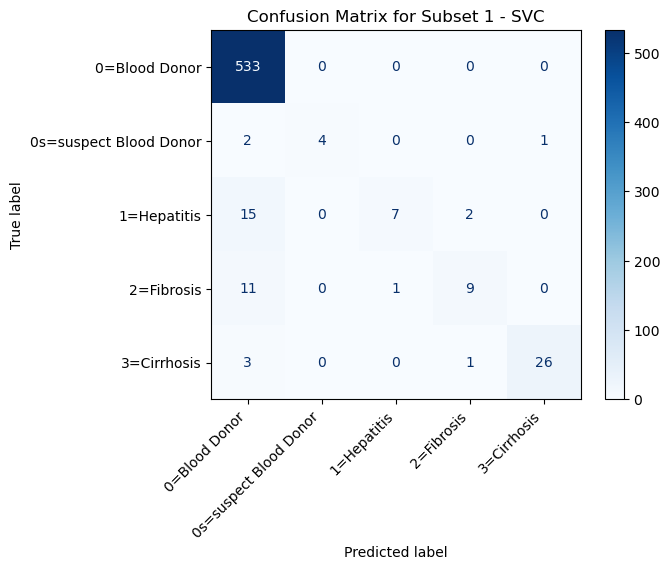

Subset 2 Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       533
           1       1.00      1.00      1.00         7
           2       0.00      0.00      0.00        23
           3       0.86      0.29      0.43        21
           4       1.00      0.43      0.60        28

    accuracy                           0.91       612
   macro avg       0.75      0.54      0.60       612
weighted avg       0.88      0.91      0.88       612

Subset 2 F2 Score (Macro): 0.5588083330659703
Subset 2 F2 Score (Weighted): 0.8988205230717723


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

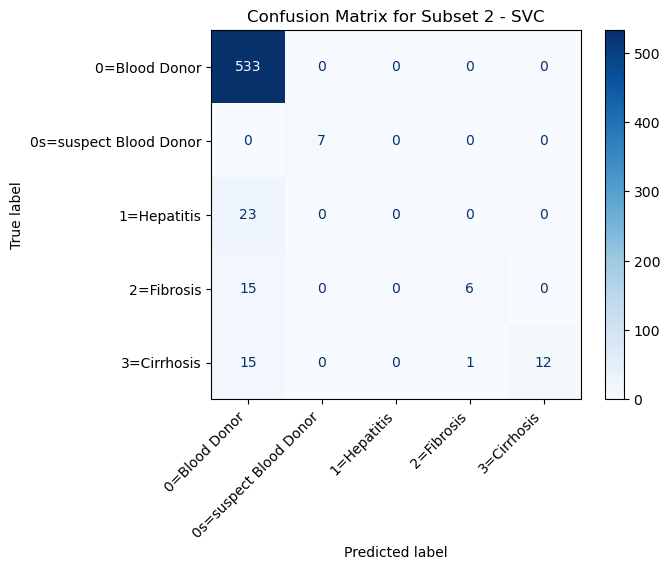

Subset 3 Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       526
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        12
           4       0.67      0.25      0.36        24

    accuracy                           0.90       590
   macro avg       0.31      0.25      0.26       590
weighted avg       0.84      0.90      0.86       590

Subset 3 F2 Score (Macro): 0.25311901213540555
Subset 3 F2 Score (Weighted): 0.8852108991314327


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

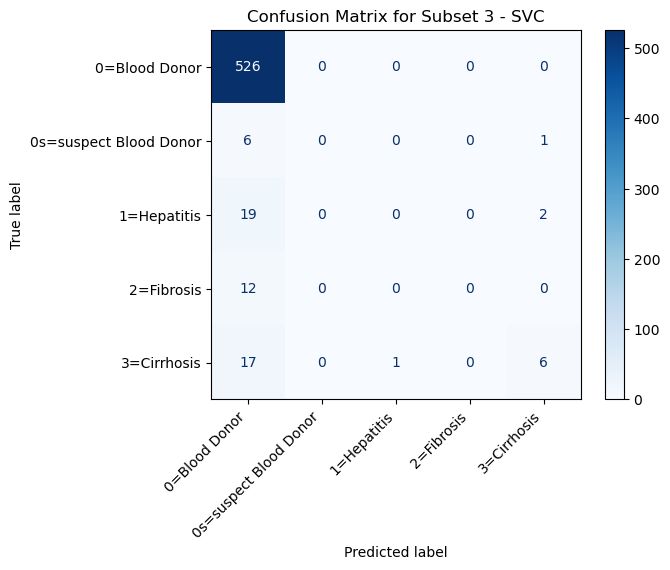

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, fbeta_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Example subsets of features without missing values
subset_1 = ['Age', 'AST', 'BIL', 'CHE', 'CREA', 'GGT']  # Example subset 1
subset_2 = ['ALB', 'ALT', 'PROT']  # Example subset 2
subset_3 = ['ALP', 'CHOL']  # Example subset 3

# Filter rows with no missing values for each subset
df_subset_1 = df[subset_1 + ['Category']].dropna()
df_subset_2 = df[subset_2 + ['Category']].dropna()
df_subset_3 = df[subset_3 + ['Category']].dropna()

# Prepare features (X) and target (y) for each subset
X1 = df_subset_1.drop(columns=['Category'])
y1 = df_subset_1['Category']

X2 = df_subset_2.drop(columns=['Category'])
y2 = df_subset_2['Category']

X3 = df_subset_3.drop(columns=['Category'])
y3 = df_subset_3['Category']

# Encode target variable for each subset
label_encoder_1 = LabelEncoder()
y1_encoded = label_encoder_1.fit_transform(y1)

label_encoder_2 = LabelEncoder()
y2_encoded = label_encoder_2.fit_transform(y2)

label_encoder_3 = LabelEncoder()
y3_encoded = label_encoder_3.fit_transform(y3)

# Scale features for each subset
scaler_1 = StandardScaler()
X1_scaled = scaler_1.fit_transform(X1)

scaler_2 = StandardScaler()
X2_scaled = scaler_2.fit_transform(X2)

scaler_3 = StandardScaler()
X3_scaled = scaler_3.fit_transform(X3)

# Train SVC models on each subset
model_1 = SVC(random_state=42, kernel='rbf')  # You can experiment with different kernels like 'linear'
model_1.fit(X1_scaled, y1_encoded)

model_2 = SVC(random_state=42, kernel='rbf')
model_2.fit(X2_scaled, y2_encoded)

model_3 = SVC(random_state=42, kernel='rbf')
model_3.fit(X3_scaled, y3_encoded)

# Evaluate Model 1
y_pred_1 = model_1.predict(X1_scaled)
print("Subset 1 Classification Report:")
print(classification_report(y1_encoded, y_pred_1))

f2_macro_1 = fbeta_score(y1_encoded, y_pred_1, beta=2, average='macro')
f2_weighted_1 = fbeta_score(y1_encoded, y_pred_1, beta=2, average='weighted')
print(f"Subset 1 F2 Score (Macro): {f2_macro_1}")
print(f"Subset 1 F2 Score (Weighted): {f2_weighted_1}")

cm_1 = confusion_matrix(y1_encoded, y_pred_1)
disp_cm_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=label_encoder_1.classes_)
disp_cm_1.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 1 - SVC')
plt.xticks(rotation=45, ha='right')
plt.show()

# Evaluate Model 2
y_pred_2 = model_2.predict(X2_scaled)
print("Subset 2 Classification Report:")
print(classification_report(y2_encoded, y_pred_2))

f2_macro_2 = fbeta_score(y2_encoded, y_pred_2, beta=2, average='macro')
f2_weighted_2 = fbeta_score(y2_encoded, y_pred_2, beta=2, average='weighted')
print(f"Subset 2 F2 Score (Macro): {f2_macro_2}")
print(f"Subset 2 F2 Score (Weighted): {f2_weighted_2}")

cm_2 = confusion_matrix(y2_encoded, y_pred_2)
disp_cm_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=label_encoder_2.classes_)
disp_cm_2.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 2 - SVC')
plt.xticks(rotation=45, ha='right')
plt.show()


# Evaluate Model 3
y_pred_3 = model_3.predict(X3_scaled)
print("Subset 3 Classification Report:")
print(classification_report(y3_encoded, y_pred_3))

f2_macro_3 = fbeta_score(y3_encoded, y_pred_3, beta=2, average='macro')
f2_weighted_3 = fbeta_score(y3_encoded, y_pred_3, beta=2, average='weighted')
print(f"Subset 3 F2 Score (Macro): {f2_macro_3}")
print(f"Subset 3 F2 Score (Weighted): {f2_weighted_3}")

cm_3 = confusion_matrix(y3_encoded, y_pred_3)
disp_cm_3 = ConfusionMatrixDisplay(confusion_matrix=cm_3, display_labels=label_encoder_3.classes_)
disp_cm_3.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 3 - SVC')
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Reduced Features with SVC model evaluation
knn_model = (n_neighbors=5)  # Use best parameters found
f2_scorer = make_scorer(fbeta_score, beta=2, average='macro')

# Cross-validate to get mean and std of F2 scores
f2_scores = cross_val_score(knn_model, X_test_prep, y_test_encoded, cv=5, scoring=f2_scorer)
print(f"KNN F2 Score Mean: {np.mean(f2_scores)}, Std: {np.std(f2_scores)}")


SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (2564387169.py, line 4)

### Reduced Features Model with Logistic Regression

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, fbeta_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Define custom F2 score function
def f2_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, average='macro')

# Create a scorer using make_scorer
f2_scorer = make_scorer(f2_score)

# Example subsets of features without missing values
subset_1 = ['Age', 'AST', 'BIL', 'CHE', 'CREA', 'GGT']  # Example subset 1
subset_2 = ['ALB', 'ALT', 'PROT']  # Example subset 2
subset_3 = ['ALP', 'CHOL']  # Example subset 3

# Filter rows with no missing values for each subset
df_subset_1 = df[subset_1 + ['Category']].dropna()
df_subset_2 = df[subset_2 + ['Category']].dropna()
df_subset_3 = df[subset_3 + ['Category']].dropna()

# Prepare features (X) and target (y) for each subset
X1 = df_subset_1.drop(columns=['Category'])
y1 = df_subset_1['Category']

X2 = df_subset_2.drop(columns=['Category'])
y2 = df_subset_2['Category']

X3 = df_subset_3.drop(columns=['Category'])
y3 = df_subset_3['Category']

# Encode target variable for each subset
label_encoder_1 = LabelEncoder()
y1_encoded = label_encoder_1.fit_transform(y1)

label_encoder_2 = LabelEncoder()
y2_encoded = label_encoder_2.fit_transform(y2)

label_encoder_3 = LabelEncoder()
y3_encoded = label_encoder_3.fit_transform(y3)

# Scale features for each subset
scaler_1 = StandardScaler()
X1_scaled = scaler_1.fit_transform(X1)

scaler_2 = StandardScaler()
X2_scaled = scaler_2.fit_transform(X2)

scaler_3 = StandardScaler()
X3_scaled = scaler_3.fit_transform(X3)

# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.00001, 0.001, 0.01, 0.1, 1],  # Try smaller values of C for stronger regularization
    'solver': ['liblinear', 'saga'],  # Use solvers that handle L1/L2 regularization well
    'max_iter': [1000, 5000,100000]  # Further increase max_iter if needed
}

# Set up GridSearchCV for each subset with custom F2 scorer
grid_search_lr_1 = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring=f2_scorer, verbose=2)
grid_search_lr_2 = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring=f2_scorer, verbose=2)
grid_search_lr_3 = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring=f2_scorer, verbose=2)

# Fit GridSearchCV on each subset
grid_search_lr_1.fit(X1_scaled, y1_encoded)
grid_search_lr_2.fit(X2_scaled, y2_encoded)
grid_search_lr_3.fit(X3_scaled, y3_encoded)

# Best parameters and evaluation for Subset 1
print("Best Parameters for Subset 1:", grid_search_lr_1.best_params_)
best_model_lr_1 = grid_search_lr_1.best_estimator_
y_pred_best_lr_1 = best_model_lr_1.predict(X1_scaled)
print("Subset 1 Classification Report:")
print(classification_report(y1_encoded, y_pred_best_lr_1))

# Best parameters and evaluation for Subset 2
print("Best Parameters for Subset 2:", grid_search_lr_2.best_params_)
best_model_lr_2 = grid_search_lr_2.best_estimator_
y_pred_best_lr_2 = best_model_lr_2.predict(X2_scaled)
print("Subset 2 Classification Report:")
print(classification_report(y2_encoded, y_pred_best_lr_2))

# Best parameters and evaluation for Subset 3
print("Best Parameters for Subset 3:", grid_search_lr_3.best_params_)
best_model_lr_3 = grid_search_lr_3.best_estimator_
y_pred_best_lr_3 = best_model_lr_3.predict(X3_scaled)
print("Subset 3 Classification Report:")
print(classification_report(y3_encoded, y_pred_best_lr_3))


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ...........C=1e-05, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ...........C=1e-05, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ...........C=1e-05, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ...........C=1e-05, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ...........C=1e-05, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ................C=1e-05, max_iter=1000, solver=saga; total time=   0.0s
[CV] END ................C=1e-05, max_iter=1000, solver=saga; total time=   0.0s
[CV] END ................C=1e-05, max_iter=1000, solver=saga; total time=   0.0s
[CV] END ................C=1e-05, max_iter=1000, solver=saga; total time=   0.0s
[CV] END ................C=1e-05, max_iter=1000, solver=saga; total time=   0.0s
[CV] END ...........C=1e-05, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ...........C=1e-05, max_iter=5000, sol

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1, max_iter=1000, solver=saga; total time=   0.1s
[CV] END ....................C=1, max_iter=1000, solver=saga; total time=   0.0s
[CV] END ...............C=1, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ...............C=1, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ...............C=1, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ...............C=1, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ...............C=1, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ....................C=1, max_iter=5000, solver=saga; total time=   0.0s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1, max_iter=5000, solver=saga; total time=   0.3s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1, max_iter=5000, solver=saga; total time=   0.3s
[CV] END ....................C=1, max_iter=5000, solver=saga; total time=   0.0s
[CV] END ....................C=1, max_iter=5000, solver=saga; total time=   0.0s
[CV] END .............C=1, max_iter=100000, solver=liblinear; total time=   0.0s
[CV] END .............C=1, max_iter=100000, solver=liblinear; total time=   0.0s
[CV] END .............C=1, max_iter=100000, solver=liblinear; total time=   0.0s
[CV] END .............C=1, max_iter=100000, solver=liblinear; total time=   0.0s
[CV] END .............C=1, max_iter=100000, solver=liblinear; total time=   0.0s
[CV] END ..................C=1, max_iter=100000, solver=saga; total time=   0.0s
[CV] END ..................C=1, max_iter=100000, solver=saga; total time=   3.2s
[CV] END ..................C=1, max_iter=100000, solver=saga; total time=   0.5s
[CV] END ..................C=1, max_iter=100000, solver=saga; total time=   0.0s
[CV] END ..................C

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is i

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, fbeta_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Define custom F2 score function
def f2_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, average='macro')

# Create a scorer using make_scorer
f2_scorer = make_scorer(f2_score)

# Example subsets of features without missing values
subset_1 = ['Age', 'AST', 'BIL', 'CHE', 'CREA', 'GGT']  # Example subset 1
subset_2 = ['ALB', 'ALT', 'PROT']  # Example subset 2
subset_3 = ['ALP', 'CHOL']  # Example subset 3

# Filter rows with no missing values for each subset
df_subset_1 = df[subset_1 + ['Category']].dropna()
df_subset_2 = df[subset_2 + ['Category']].dropna()
df_subset_3 = df[subset_3 + ['Category']].dropna()

# Prepare features (X) and target (y) for each subset
X1 = df_subset_1.drop(columns=['Category'])
y1 = df_subset_1['Category']

X2 = df_subset_2.drop(columns=['Category'])
y2 = df_subset_2['Category']

X3 = df_subset_3.drop(columns=['Category'])
y3 = df_subset_3['Category']

# Encode target variable for each subset
label_encoder_1 = LabelEncoder()
y1_encoded = label_encoder_1.fit_transform(y1)

label_encoder_2 = LabelEncoder()
y2_encoded = label_encoder_2.fit_transform(y2)

label_encoder_3 = LabelEncoder()
y3_encoded = label_encoder_3.fit_transform(y3)

# Scale features for each subset
scaler_1 = StandardScaler()
X1_scaled = scaler_1.fit_transform(X1)

scaler_2 = StandardScaler()
X2_scaled = scaler_2.fit_transform(X2)

scaler_3 = StandardScaler()
X3_scaled = scaler_3.fit_transform(X3)

# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000, 2000, 5000]  # Further increase max_iter if needed
}

# Set up GridSearchCV for each subset with custom F2 scorer
grid_search_lr_1 = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring=f2_scorer, verbose=2)
grid_search_lr_2 = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring=f2_scorer, verbose=2)
grid_search_lr_3 = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring=f2_scorer, verbose=2)

# Fit GridSearchCV on each subset
grid_search_lr_1.fit(X1_scaled, y1_encoded)
grid_search_lr_2.fit(X2_scaled, y2_encoded)
grid_search_lr_3.fit(X3_scaled, y3_encoded)

# Best parameters and evaluation for Subset 1
print("Best Parameters for Subset 1:", grid_search_lr_1.best_params_)
best_model_lr_1 = grid_search_lr_1.best_estimator_
y_pred_best_lr_1 = best_model_lr_1.predict(X1_scaled)
print("Subset 1 Classification Report:")
print(classification_report(y1_encoded, y_pred_best_lr_1))

# Best parameters and evaluation for Subset 2
print("Best Parameters for Subset 2:", grid_search_lr_2.best_params_)
best_model_lr_2 = grid_search_lr_2.best_estimator_
y_pred_best_lr_2 = best_model_lr_2.predict(X2_scaled)
print("Subset 2 Classification Report:")
print(classification_report(y2_encoded, y_pred_best_lr_2))

# Best parameters and evaluation for Subset 3
print("Best Parameters for Subset 3:", grid_search_lr_3.best_params_)
best_model_lr_3 = grid_search_lr_3.best_estimator_
y_pred_best_lr_3 = best_model_lr_3.predict(X3_scaled)
print("Subset 3 Classification Report:")
print(classification_report(y3_encoded, y_pred_best_lr_3))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ............C=0.01, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END .................C=0.01, max_iter=1000, solver=saga; total time=   0.0s
[CV] END .................C=0.01, max_iter=1000, solver=saga; total time=   0.0s
[CV] END .................C=0.01, max_iter=1000, solver=saga; total time=   0.0s
[CV] END .................C=0.01, max_iter=1000, solver=saga; total time=   0.0s
[CV] END .................C=0.01, max_iter=1000, solver=saga; total time=   0.0s
[CV] END ............C=0.01, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01, max_iter=2000, sol

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.1s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.1s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.2s
[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.1s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.2s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.2s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.2s
[CV] END ..............C=10, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ...................C=10, max_iter=5000, solver=saga; total time=   0.2s
[CV] END ...................C=10, max_iter=5000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=5000, solver=saga; total time=   0.2s
[CV] END ...................C=10, max_iter=5000, solver=saga; total time=   0.2s
[CV] END ...................C=10, max_iter=5000, solver=saga; total time=   0.2s
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ............C=0.01, max_iter=1000, sol

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................C=0.01, max_iter=2000, solver=saga; total time=   0.0s
[CV] END .................C=0.01, max_iter=2000, solver=saga; total time=   0.0s
[CV] END .................C=0.01, max_iter=2000, solver=saga; total time=   0.0s
[CV] END ............C=0.01, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END .................C=0.01, max_iter=5000, solver=saga; total time=   0.0s
[CV] END .................C=0.01, max_iter=5000, solver=saga; total time=   0.0s
[CV] END .................C=0.01, max_iter=5000, solver=saga; total time=   0.0s
[CV] END .................C=0.01, max_iter=5000, solver=saga; total time=   0.0s
[CV] END .................C=

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.1s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.1s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.1s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.2s
[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.1s
[CV] END ..............C=10, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ...................C=10, max_iter=5000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=5000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=5000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=5000, solver=saga; total time=   0.2s
[CV] END ...................C=10, max_iter=5000, solver=saga; total time=   0.1s
Fitting 5 folds for each of 

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1, max_iter=1000, solver=saga; total time=   0.1s
[CV] END ....................C=1, max_iter=1000, solver=saga; total time=   0.0s
[CV] END ....................C=1, max_iter=1000, solver=saga; total time=   0.0s
[CV] END ...............C=1, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ...............C=1, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ...............C=1, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ...............C=1, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ...............C=1, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ....................C=1, max_iter=2000, solver=saga; total time=   0.0s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1, max_iter=2000, solver=saga; total time=   0.1s
[CV] END ....................C=1, max_iter=2000, solver=saga; total time=   0.1s
[CV] END ....................C=1, max_iter=2000, solver=saga; total time=   0.0s
[CV] END ....................C=1, max_iter=2000, solver=saga; total time=   0.0s
[CV] END ...............C=1, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ...............C=1, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ...............C=1, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ...............C=1, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ...............C=1, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ....................C=1, max_iter=5000, solver=saga; total time=   0.0s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1, max_iter=5000, solver=saga; total time=   0.3s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1, max_iter=5000, solver=saga; total time=   0.3s
[CV] END ....................C=1, max_iter=5000, solver=saga; total time=   0.0s
[CV] END ....................C=1, max_iter=5000, solver=saga; total time=   0.0s
[CV] END ..............C=10, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.0s
[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.1s
[CV] END ...................

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.0s
[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.0s
[CV] END ..............C=10, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=5000, solver=liblinear; total time=   0.0s
[CV] END ...................C=10, max_iter=5000, solver=saga; total time=   0.1s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=10, max_iter=5000, solver=saga; total time=   0.3s
[CV] END ...................C=10, max_iter=5000, solver=saga; total time=   0.0s
[CV] END ...................C=10, max_iter=5000, solver=saga; total time=   0.3s
[CV] END ...................C=10, max_iter=5000, solver=saga; total time=   0.0s
Best Parameters for Subset 1: {'C': 10, 'max_iter': 1000, 'solver': 'saga'}
Subset 1 Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       533
           1       1.00      0.29      0.44         7
           2       0.58      0.29      0.39        24
           3       0.50      0.38      0.43        21
           4       0.86      0.80      0.83        30

    accuracy                           0.93       615
   macro avg       0.78      0.55      0.61       615
weighted avg       0.92      0.93      0.92       615

Best Parameters for Subset 2: {'C': 1, 'max_iter': 1000, 'solver': 'saga'}
Subs

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, fbeta_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Define custom F2 score function
def f2_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, average='macro')

# Create a scorer using make_scorer
f2_scorer = make_scorer(f2_score)

# Example subsets of features without missing values
subset_1 = ['Age', 'AST', 'BIL', 'CHE', 'CREA', 'GGT']  # Example subset 1
subset_2 = ['ALB', 'ALT', 'PROT']  # Example subset 2
subset_3 = ['ALP', 'CHOL']  # Example subset 3

# Filter rows with no missing values for each subset
df_subset_1 = df[subset_1 + ['Category']].dropna()
df_subset_2 = df[subset_2 + ['Category']].dropna()
df_subset_3 = df[subset_3 + ['Category']].dropna()

# Prepare features (X) and target (y) for each subset
X1 = df_subset_1.drop(columns=['Category'])
y1 = df_subset_1['Category']

X2 = df_subset_2.drop(columns=['Category'])
y2 = df_subset_2['Category']

X3 = df_subset_3.drop(columns=['Category'])
y3 = df_subset_3['Category']

# Encode target variable for each subset
label_encoder_1 = LabelEncoder()
y1_encoded = label_encoder_1.fit_transform(y1)

label_encoder_2 = LabelEncoder()
y2_encoded = label_encoder_2.fit_transform(y2)

label_encoder_3 = LabelEncoder()
y3_encoded = label_encoder_3.fit_transform(y3)

# Scale features for each subset
scaler_1 = StandardScaler()
X1_scaled = scaler_1.fit_transform(X1)

scaler_2 = StandardScaler()
X2_scaled = scaler_2.fit_transform(X2)

scaler_3 = StandardScaler()
X3_scaled = scaler_3.fit_transform(X3)

# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [1000, 2000,10000]  # Increase max_iter to allow convergence
}

# Set up GridSearchCV for each subset with custom F2 scorer
grid_search_lr_1 = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring=f2_scorer, verbose=2)
grid_search_lr_2 = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring=f2_scorer, verbose=2)
grid_search_lr_3 = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring=f2_scorer, verbose=2)

# Fit GridSearchCV on each subset
grid_search_lr_1.fit(X1_scaled, y1_encoded)
grid_search_lr_2.fit(X2_scaled, y2_encoded)
grid_search_lr_3.fit(X3_scaled, y3_encoded)

# Best parameters and evaluation for Subset 1
print("Best Parameters for Subset 1:", grid_search_lr_1.best_params_)
best_model_lr_1 = grid_search_lr_1.best_estimator_
y_pred_best_lr_1 = best_model_lr_1.predict(X1_scaled)
print("Subset 1 Classification Report:")
print(classification_report(y1_encoded, y_pred_best_lr_1))

# Best parameters and evaluation for Subset 2
print("Best Parameters for Subset 2:", grid_search_lr_2.best_params_)
best_model_lr_2 = grid_search_lr_2.best_estimator_
y_pred_best_lr_2 = best_model_lr_2.predict(X2_scaled)
print("Subset 2 Classification Report:")
print(classification_report(y2_encoded, y_pred_best_lr_2))

# Best parameters and evaluation for Subset 3
print("Best Parameters for Subset 3:", grid_search_lr_3.best_params_)
best_model_lr_3 = grid_search_lr_3.best_estimator_
y_pred_best_lr_3 = best_model_lr_3.predict(X3_scaled)
print("Subset 3 Classification Report:")
print(classification_report(y3_encoded, y_pred_best_lr_3))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ............C=0.01, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END .................C=0.01, max_iter=1000, solver=saga; total time=   0.0s
[CV] END .................C=0.01, max_iter=1000, solver=saga; total time=   0.0s
[CV] END .................C=0.01, max_iter=1000, solver=saga; total time=   0.0s
[CV] END .................C=0.01, max_iter=1000, solver=saga; total time=   0.0s
[CV] END .................C=0.01, max_iter=1000, solver=saga; total time=   0.0s
[CV] END ............C=0.01, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ............C=0.01, max_iter=2000, sol

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.1s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.1s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.2s
[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.1s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.2s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.2s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.2s
[CV] END .............C=10, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END .............C=10, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END .............C=10, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END .............C=10, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END .............C=10, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END ..................C=10, max_iter=10000, solver=saga; total time=   0.2s
[CV] END ..................C=10, max_iter=10000, solver=saga; total time=   0.1s
[CV] END ..................C=10, max_iter=10000, solver=saga; total time=   0.2s
[CV] END ..................C=10, max_iter=10000, solver=saga; total time=   0.2s
[CV] END ..................C=10, max_iter=10000, solver=saga; total time=   0.2s
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ............C=0.01, max_iter=1000, sol

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................C=0.01, max_iter=2000, solver=saga; total time=   0.0s
[CV] END .................C=0.01, max_iter=2000, solver=saga; total time=   0.0s
[CV] END .................C=0.01, max_iter=2000, solver=saga; total time=   0.0s
[CV] END ...........C=0.01, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.01, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.01, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.01, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.01, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END ................C=0.01, max_iter=10000, solver=saga; total time=   0.0s
[CV] END ................C=0.01, max_iter=10000, solver=saga; total time=   0.0s
[CV] END ................C=0.01, max_iter=10000, solver=saga; total time=   0.0s
[CV] END ................C=0.01, max_iter=10000, solver=saga; total time=   0.0s
[CV] END ................C=0

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.1s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.1s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.1s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.2s
[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.1s
[CV] END .............C=10, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END .............C=10, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END .............C=10, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END .............C=10, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END .............C=10, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END ..................C=10, max_iter=10000, solver=saga; total time=   0.1s
[CV] END ..................C=10, max_iter=10000, solver=saga; total time=   0.1s
[CV] END ..................C=10, max_iter=10000, solver=saga; total time=   0.1s
[CV] END ..................C=10, max_iter=10000, solver=saga; total time=   0.2s
[CV] END ..................C=10, max_iter=10000, solver=saga; total time=   0.1s
Fitting 5 folds for each of 

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1, max_iter=1000, solver=saga; total time=   0.1s
[CV] END ....................C=1, max_iter=1000, solver=saga; total time=   0.0s
[CV] END ....................C=1, max_iter=1000, solver=saga; total time=   0.0s
[CV] END ...............C=1, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ...............C=1, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ...............C=1, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ...............C=1, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ...............C=1, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ....................C=1, max_iter=2000, solver=saga; total time=   0.0s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ....................C=1, max_iter=2000, solver=saga; total time=   0.1s
[CV] END ....................C=1, max_iter=2000, solver=saga; total time=   0.1s
[CV] END ....................C=1, max_iter=2000, solver=saga; total time=   0.0s
[CV] END ....................C=1, max_iter=2000, solver=saga; total time=   0.0s
[CV] END ..............C=1, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END ..............C=1, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END ..............C=1, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END ..............C=1, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END ..............C=1, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END ...................C=1, max_iter=10000, solver=saga; total time=   0.0s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=1, max_iter=10000, solver=saga; total time=   0.7s
[CV] END ...................C=1, max_iter=10000, solver=saga; total time=   0.4s
[CV] END ...................C=1, max_iter=10000, solver=saga; total time=   0.0s
[CV] END ...................C=1, max_iter=10000, solver=saga; total time=   0.0s
[CV] END ..............C=10, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=1000, solver=liblinear; total time=   0.0s
[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.1s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.0s
[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=1000, solver=saga; total time=   0.0s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ..............C=10, max_iter=2000, solver=liblinear; total time=   0.0s
[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.1s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.0s
[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.1s
[CV] END ...................C=10, max_iter=2000, solver=saga; total time=   0.0s
[CV] END .............C=10, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END .............C=10, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END .............C=10, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END .............C=10, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END .............C=10, max_iter=10000, solver=liblinear; total time=   0.0s
[CV] END ..................C=10, max_iter=10000, solver=saga; total time=   0.1s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..................C=10, max_iter=10000, solver=saga; total time=   0.7s
[CV] END ..................C=10, max_iter=10000, solver=saga; total time=   0.0s
[CV] END ..................C=10, max_iter=10000, solver=saga; total time=   0.6s
[CV] END ..................C=10, max_iter=10000, solver=saga; total time=   0.0s
Best Parameters for Subset 1: {'C': 10, 'max_iter': 1000, 'solver': 'saga'}
Subset 1 Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       533
           1       1.00      0.29      0.44         7
           2       0.58      0.29      0.39        24
           3       0.50      0.38      0.43        21
           4       0.86      0.80      0.83        30

    accuracy                           0.93       615
   macro avg       0.78      0.55      0.61       615
weighted avg       0.92      0.93      0.92       615

Best Parameters for Subset 2: {'C': 1, 'max_iter': 1000, 'solver': 'saga'}
Subs

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is i

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, fbeta_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Define custom F2 score function
def f2_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, average='macro')

# Create a scorer using make_scorer
f2_scorer = make_scorer(f2_score)

# Example subsets of features without missing values
subset_1 = ['Age', 'AST', 'BIL', 'CHE', 'CREA', 'GGT']  # Example subset 1
subset_2 = ['ALB', 'ALT', 'PROT']  # Example subset 2
subset_3 = ['ALP', 'CHOL']  # Example subset 3

# Filter rows with no missing values for each subset
df_subset_1 = df[subset_1 + ['Category']].dropna()
df_subset_2 = df[subset_2 + ['Category']].dropna()
df_subset_3 = df[subset_3 + ['Category']].dropna()

# Prepare features (X) and target (y) for each subset
X1 = df_subset_1.drop(columns=['Category'])
y1 = df_subset_1['Category']

X2 = df_subset_2.drop(columns=['Category'])
y2 = df_subset_2['Category']

X3 = df_subset_3.drop(columns=['Category'])
y3 = df_subset_3['Category']

# Encode target variable for each subset
label_encoder_1 = LabelEncoder()
y1_encoded = label_encoder_1.fit_transform(y1)

label_encoder_2 = LabelEncoder()
y2_encoded = label_encoder_2.fit_transform(y2)

label_encoder_3 = LabelEncoder()
y3_encoded = label_encoder_3.fit_transform(y3)

# Scale features for each subset
scaler_1 = StandardScaler()
X1_scaled = scaler_1.fit_transform(X1)

scaler_2 = StandardScaler()
X2_scaled = scaler_2.fit_transform(X2)

scaler_3 = StandardScaler()
X3_scaled = scaler_3.fit_transform(X3)

# Define parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}

# Set up GridSearchCV for each subset with custom F2 scorer
grid_search_lr_1 = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring=f2_scorer, verbose=2)
grid_search_lr_2 = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring=f2_scorer, verbose=2)
grid_search_lr_3 = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5, scoring=f2_scorer, verbose=2)

# Fit GridSearchCV on each subset
grid_search_lr_1.fit(X1_scaled, y1_encoded)
grid_search_lr_2.fit(X2_scaled, y2_encoded)
grid_search_lr_3.fit(X3_scaled, y3_encoded)

# Best parameters and evaluation for Subset 1
print("Best Parameters for Subset 1:", grid_search_lr_1.best_params_)
best_model_lr_1 = grid_search_lr_1.best_estimator_
y_pred_best_lr_1 = best_model_lr_1.predict(X1_scaled)
print("Subset 1 Classification Report:")
print(classification_report(y1_encoded, y_pred_best_lr_1))

# Best parameters and evaluation for Subset 2
print("Best Parameters for Subset 2:", grid_search_lr_2.best_params_)
best_model_lr_2 = grid_search_lr_2.best_estimator_
y_pred_best_lr_2 = best_model_lr_2.predict(X2_scaled)
print("Subset 2 Classification Report:")
print(classification_report(y2_encoded, y_pred_best_lr_2))

# Best parameters and evaluation for Subset 3
print("Best Parameters for Subset 3:", grid_search_lr_3.best_params_)
best_model_lr_3 = grid_search_lr_3.best_estimator_
y_pred_best_lr_3 = best_model_lr_3.predict(X3_scaled)
print("Subset 3 Classification Report:")
print(classification_report(y3_encoded, y_pred_best_lr_3))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solve

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/py

[CV] END .................................C=0.1, solver=saga; total time=   0.0s
[CV] END .................................C=0.1, solver=saga; total time=   0.0s
[CV] END .................................C=0.1, solver=saga; total time=   0.0s
[CV] END .................................C=0.1, solver=saga; total time=   0.0s
[CV] END .................................C=0.1, solver=saga; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ...................................C=1, solver=saga; total time=   0.0s
[CV] END ...................................C=1, solver=saga; total time=   0.0s
[CV] END ...................

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ...................................C=1, solver=saga; total time=   0.0s
[CV] END ...................................C=1, solver=saga; total time=   0.0s
[CV] END .............................C=10, solver=liblinear; total time=   0.0s
[CV] END .............................C=10, solver=liblinear; total time=   0.0s
[CV] END .............................C=10, solver=liblinear; total time=   0.0s
[CV] END .............................C=10, solver=liblinear; total time=   0.0s
[CV] END .............................C=10, solver=liblinear; total time=   0.0s
[CV] END ..................................C=10, solver=saga; total time=   0.0s
[CV] END ..................................C=10, solver=saga; total time=   0.0s
[CV] END ..................................C=10, solver=saga; total time=   0.0s
[CV] END ..................................C=10, solver=saga; total time=   0.0s
[CV] END ..................................C=10, solver=saga; total time=   0.0s


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/py

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ............................C=0.1, solver=liblinear; total time=   0.0s
[CV] END ............................C=0.1, solve

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................................C=0.1, solver=saga; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ...................................C=1, solver=saga; total time=   0.0s
[CV] END ...................................C=1, solver=saga; total time=   0.0s
[CV] END ...................................C=1, solver=saga; total time=   0.0s
[CV] END ...................................C=1, solver=saga; total time=   0.0s
[CV] END ...................................C=1, solver=saga; total time=   0.0s
[CV] END .............................C=10, solver=liblinear; total time=   0.0s
[CV] END ...................

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/py

[CV] END ..................................C=10, solver=saga; total time=   0.0s
[CV] END ..................................C=10, solver=saga; total time=   0.0s
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ...........................C=0.01, solver=liblinear; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ................................C=0.01, solver=saga; total time=   0.0s
[CV] END ................................C=0.01, 

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .................................C=0.1, solver=saga; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ..............................C=1, solver=liblinear; total time=   0.0s
[CV] END ...................................C=1, solver=saga; total time=   0.0s
[CV] END ...................................C=1, solver=saga; total time=   0.0s
[CV] END ...................................C=1, solver=saga; total time=   0.0s
[CV] END ...................................C=1, solver=saga; total time=   0.0s
[CV] END ...................................C=1, solver=saga; total time=   0.0s
[CV] END .............................C=10, solver=liblinear; total time=   0.0s
[CV] END ...................

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/envs/data1030/lib/py

### XGBoost

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.5s
[CV] END c

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

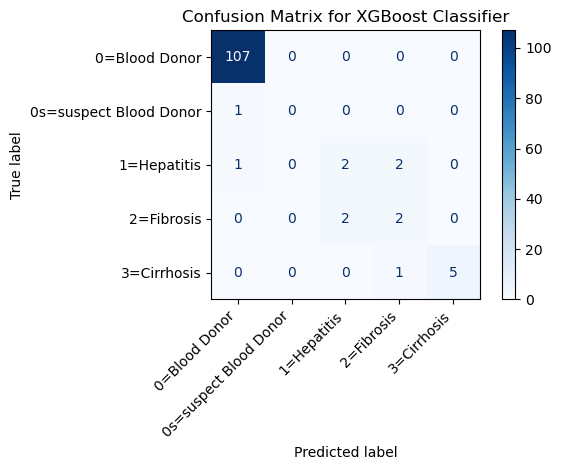

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, fbeta_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Define custom F2 score function
def f2_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, average='macro')

# Create a scorer using make_scorer
f2_scorer = make_scorer(f2_score)

# Encode target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Define parameter grid for XGBoost
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up GridSearchCV for XGBoost with custom F2 scorer and reduced n_splits
grid_search_xgb = GridSearchCV(
    XGBClassifier(objective='multi:softmax', num_class=5, random_state=42), 
    param_grid_xgb, 
    cv=3,  # Reduce n_splits to 3 to handle small class size
    scoring=f2_scorer,
    verbose=2
)

# Fit GridSearchCV on training data
grid_search_xgb.fit(X_train_prep, y_train_encoded)

# Best parameters and evaluation
print("Best Parameters:", grid_search_xgb.best_params_)
best_model_xgb = grid_search_xgb.best_estimator_
y_pred_best_encoded = best_model_xgb.predict(X_test_prep)
y_pred_best = le.inverse_transform(y_pred_best_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

# Calculate F2 scores
f2_score_macro = fbeta_score(y_test, y_pred_best, beta=2, average='macro')
f2_score_weighted = fbeta_score(y_test, y_pred_best, beta=2, average='weighted')
f2_score_micro = fbeta_score(y_test,y_pred_best,beta=2,average='micro')

print(f"F2 Score (Macro Average): {f2_score_macro}")
print(f"F2 Score (Weighted Average): {f2_score_weighted}")
print(f"F2 Score (Micro Average): {f2_score_micro}")

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 48 candidates, totalling 240 fits


/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estima

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

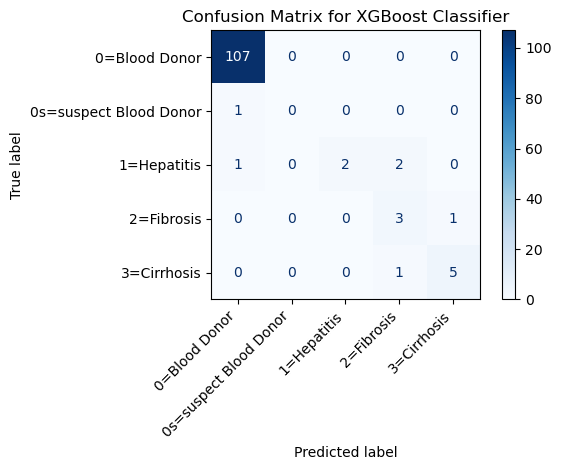

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, fbeta_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

# Define custom F2 score function
def f2_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, average='macro')

# Create a scorer using make_scorer
f2_scorer = make_scorer(f2_score)

# Encode target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

# Define parameter grid for XGBoost
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up GridSearchCV for XGBoost with custom F2 scorer
grid_search_xgb = GridSearchCV(XGBClassifier(objective='multi:softmax', num_class=5, random_state=42), 
                               param_grid_xgb, cv=5, scoring=f2_scorer, verbose=2)

# Fit GridSearchCV on training data
grid_search_xgb.fit(X_train_prep, y_train_encoded)

# Best parameters and evaluation
print("Best Parameters:", grid_search_xgb.best_params_)
best_model_xgb = grid_search_xgb.best_estimator_
y_pred_best_encoded = best_model_xgb.predict(X_test_prep)
y_pred_best = le.inverse_transform(y_pred_best_encoded)
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

# Calculate F2 scores
f2_score_macro = fbeta_score(y_test, y_pred_best, beta=2, average='macro')
f2_score_weighted = fbeta_score(y_test, y_pred_best, beta=2, average='weighted')
f2_score_micro = fbeta_score(y_test,y_pred_best,beta=2,average='micro')

print(f"F2 Score (Macro Average): {f2_score_macro}")
print(f"F2 Score (Weighted Average): {f2_score_weighted}")
print(f"F2 Score (Micro Average): {f2_score_micro}")

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for XGBoost Classifier')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Random Forest Classifier

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, 

/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/data1030/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(resu

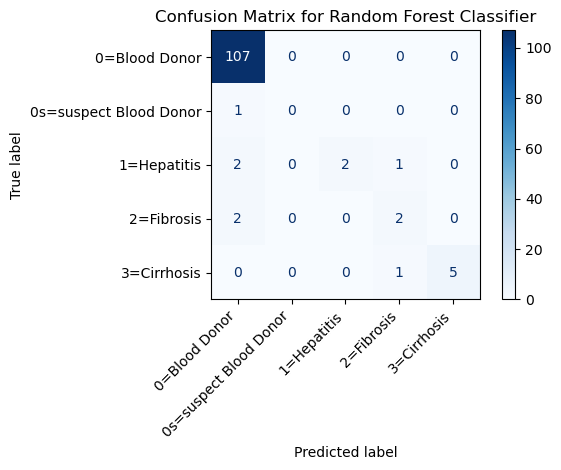

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, fbeta_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define custom F2 score function
def f2_score(y_true, y_pred):
    return fbeta_score(y_true, y_pred, beta=2, average='macro')

# Create a scorer using make_scorer
f2_scorer = make_scorer(f2_score)

# Define a refined parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 10],     # Maximum depth of the tree
    'min_samples_split': [2, 5], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Set up GridSearchCV for Random Forest with custom F2 scorer
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring=f2_scorer, verbose=2)

# Fit GridSearchCV on training data
grid_search_rf.fit(X_train_prep, y_train)

# Best parameters and evaluation
print("Best Parameters:", grid_search_rf.best_params_)
best_model_rf = grid_search_rf.best_estimator_
y_pred_best = best_model_rf.predict(X_test_prep)
print("Classification Report:")
print(classification_report(y_test, y_pred_best))

# Calculate F2 scores
f2_score_macro = fbeta_score(y_test, y_pred_best, beta=2, average='macro')
f2_score_weighted = fbeta_score(y_test, y_pred_best, beta=2, average='weighted')
f2_score_micro = fbeta_score(y_test,y_pred_best,beta=2,average='micro')

print(f"F2 Score (Macro Average): {f2_score_macro}")
print(f"F2 Score (Weighted Average): {f2_score_weighted}")
print(f"F2 Score (Micro Average): {f2_score_micro}")

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Random Forest Classifier model evaluation
rf_model = ('max_depth' = None, 'max_features' = 'sqrt', 'min_samples_leaf' = 1, 'min_samples_split' = 5, 'n_estimators' = 200)  # Use best parameters found
f2_scorer = make_scorer(fbeta_score, beta=2, average='macro')

# Cross-validate to get mean and std of F2 scores
f2_scores = cross_val_score(rf_model, X_test_prep, y_test_encoded, cv=5, scoring=f2_scorer)
print(f"Random Forest Classifier F2 Score Mean: {np.mean(f2_scores)}, Std: {np.std(f2_scores)}")

SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (431462516.py, line 4)

### Reduced Features Model with K-Nearest Neighbors

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import make_scorer, fbeta_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# import matplotlib.pyplot as plt

# # Define custom F2 score function
# def f2_score(y_true, y_pred):
#     return fbeta_score(y_true, y_pred, beta=2, average='macro')

# # Create a scorer using make_scorer
# f2_scorer = make_scorer(f2_score)

# # Example subsets of features without missing values
# subset_1 = ['Age', 'AST', 'BIL', 'CHE', 'CREA', 'GGT']  # Example subset 1
# subset_2 = ['ALB', 'ALT', 'PROT']  # Example subset 2
# subset_3 = ['ALP', 'CHOL']  # Example subset 3

# # Filter rows with no missing values for each subset and align y accordingly
# df_subset_1 = df[subset_1 + ['Category']].dropna()
# X1 = df_subset_1.drop(columns=['Category'])
# y1 = df_subset_1['Category']

# df_subset_2 = df[subset_2 + ['Category']].dropna()
# X2 = df_subset_2.drop(columns=['Category'])
# y2 = df_subset_2['Category']

# df_subset_3 = df[subset_3 + ['Category']].dropna()
# X3 = df_subset_3.drop(columns=['Category'])
# y3 = df_subset_3['Category']

# # Encode target variable for each subset
# label_encoder_1 = LabelEncoder()
# y1_encoded = label_encoder_1.fit_transform(y1)

# label_encoder_2 = LabelEncoder()
# y2_encoded = label_encoder_2.fit_transform(y2)

# label_encoder_3 = LabelEncoder()
# y3_encoded = label_encoder_3.fit_transform(y3)

# # Scale features for each subset
# scaler_1 = StandardScaler()
# X1_scaled = scaler_1.fit_transform(X1)

# scaler_2 = StandardScaler()
# X2_scaled = scaler_2.fit_transform(X2)

# scaler_3 = StandardScaler()
# X3_scaled = scaler_3.fit_transform(X3)

# # Define parameter grid for KNN
# param_grid_knn = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
# }

# # Set up GridSearchCV for KNN with custom F2 scorer
# grid_search_knn_1 = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring=f2_scorer, verbose=2)
# grid_search_knn_2 = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring=f2_scorer, verbose=2)
# grid_search_knn_3 = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring=f2_scorer, verbose=2)

# # Fit GridSearchCV on each subset
# grid_search_knn_1.fit(X1_scaled, y1_encoded)
# grid_search_knn_2.fit(X2_scaled, y2_encoded)
# grid_search_knn_3.fit(X3_scaled, y3_encoded)

# # Evaluate on a separate test set (ensure no overlap with training data)
# X_test_subset_1 = X_test[subset_1].dropna()
# y_test_subset_1_encoded = label_encoder_1.transform(y_test[X_test[subset_1].notnull().all(axis=1)])

# X_test_subset_2 = X_test[subset_2].dropna()
# y_test_subset_2_encoded = label_encoder_2.transform(y_test[X_test[subset_2].notnull().all(axis=1)])

# X_test_subset_3 = X_test[subset_3].dropna()
# y_test_subset_3_encoded = label_encoder_3.transform(y_test[X_test[subset_3].notnull().all(axis=1)])

# # Best parameters and evaluation for Subset 1
# print("Best Parameters for Subset 1:", grid_search_knn_1.best_params_)
# best_model_knn_1 = grid_search_knn_1.best_estimator_
# y_pred_best_knn_1 = best_model_knn_1.predict(X1_scaled)
# print("Subset 1 Classification Report:")
# print(classification_report(y1_encoded, y_pred_best_knn_1))

# # Calculate F2 scores for Subset 1
# f2_macro_best_knn_1 = fbeta_score(y1_encoded, y_pred_best_knn_1, beta=2, average='macro')
# f2_weighted_best_knn_1 = fbeta_score(y1_encoded, y_pred_best_knn_1, beta=2, average='weighted')
# print(f"Subset 1 F2 Score (Macro): {f2_macro_best_knn_1}")
# print(f"Subset 1 F2 Score (Weighted): {f2_weighted_best_knn_1}")

# cm_best_knn_1 = confusion_matrix(y1_encoded, y_pred_best_knn_1)
# disp_cm_best_knn_1 = ConfusionMatrixDisplay(confusion_matrix=cm_best_knn_1, display_labels=label_encoder_1.classes_)
# disp_cm_best_knn_1.plot(cmap='Blues')
# plt.title('Confusion Matrix for Subset 1 - KNN')
# plt.xticks(rotation=45, ha='right')
# plt.show()

# # Best parameters and evaluation for Subset 2
# print("Best Parameters for Subset 2:", grid_search_knn_2.best_params_)
# best_model_knn_2 = grid_search_knn_2.best_estimator_
# y_pred_best_knn_2 = best_model_knn_2.predict(X2_scaled)
# print("Subset 2 Classification Report:")
# print(classification_report(y2_encoded, y_pred_best_knn_2))

# # Calculate F2 scores for Subset 2
# f2_macro_best_knn_2 = fbeta_score(y2_encoded, y_pred_best_knn_2, beta=2, average='macro')
# f2_weighted_best_knn_2 = fbeta_score(y2_encoded, y_pred_best_knn_2, beta=2, average='weighted')
# print(f"Subset 2 F2 Score (Macro): {f2_macro_best_knn_2}")
# print(f"Subset 2 F2 Score (Weighted): {f2_weighted_best_knn_2}")

# cm_best_knn_2 = confusion_matrix(y2_encoded, y_pred_best_knn_2)
# disp_cm_best_knn_2 = ConfusionMatrixDisplay(confusion_matrix=cm_best_knn_2, display_labels=label_encoder_2.classes_)
# disp_cm_best_knn_2.plot(cmap='Blues')
# plt.title('Confusion Matrix for Subset 2 - KNN')
# plt.xticks(rotation=45, ha='right')
# plt.show()

# # Best parameters and evaluation for Subset 3
# print("Best Parameters for Subset 3:", grid_search_knn_3.best_params_)
# best_model_knn_3 = grid_search_knn_3.best_estimator_
# y_pred_best_knn_3 = best_model_knn_3.predict(X3_scaled)
# print("Subset 3 Classification Report:")
# print(classification_report(y3_encoded, y_pred_best_knn_3))

# # Calculate F2 scores for Subset 3
# f2_macro_best_knn_3 = fbeta_score(y3_encoded, y_pred_best_knn_3, beta=2, average='macro')
# f2_weighted_best_knn_3 = fbeta_score(y3_encoded, y_pred_best_knn_3, beta=2, average='weighted')
# print(f"Subset 3 F2 Score (Macro): {f2_macro_best_knn_3}")
# print(f"Subset 3 F2 Score (Weighted): {f2_weighted_best_knn_3}")

cm_best_knn_3 = confusion_matrix(y3_encoded, y_pred_best_knn_3)
disp_cm_best_knn_3 = ConfusionMatrixDisplay(confusion_matrix=cm_best_knn_3, display_labels=label_encoder_3.classes_)
disp_cm_best_knn_3.plot(cmap='Blues')
plt.title('Confusion Matrix for Subset 3 - KNN')
plt.xticks(rotation=45, ha='right')
plt.show()
